In [185]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import seaborn as sns
from matplotlib.gridspec import GridSpec
import scanpy as sc
import muon as mu
import graphtools
import magic
from matplotlib.pyplot import rc_context
from matplotlib import gridspec
import os


from datashader.mpl_ext import dsshow
import datashader as ds

import matplotlib.colors
cmap = plt.cm.hsv
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist = cmaplist[0:round(len(cmaplist)*0.7)]
cmaplist.reverse()
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', cmaplist, cmap.N)

# Process counts matrix

In [7]:
adata = sc.read_10x_mtx('/data/srlab1/mcurtis/GSK/tcell_proliferation/TCellAnnotator/data/Sparks2023/T_fromSeurat_RNA_ADT_HTO/')


In [10]:
adata

AnnData object with n_obs × n_vars = 336739 × 28543
    var: 'gene_ids', 'feature_types'

In [13]:
meta = pd.read_csv('/data/srlab1/mcurtis/GSK/tcell_proliferation/TCellAnnotator/data/Sparks2023/T_fromSeurat_metadata.txt',
                   index_col = 0, sep = '\t')


/PHShome/mc1070/anaconda3/envs/cnmf_env2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
adata.obs = meta

In [22]:
htos = ['HTO1', 'HTO2', 'HTO3']

In [90]:
# adata.obs[htos] = 0

In [93]:
adata.obs[htos] = pd.DataFrame(adata[:, htos].X.todense(), index = adata.obs.index, columns = htos)

In [97]:
adata.obs.head()

,alt.subject.id,visit,covid.diagnosis.start.date.to.sample.drawn,group,sex,age,race,ethnicity,flu.vax.count.10yr,vaccine,...,nFeature_HTO,nFeature_CITE,nFeature_SCT,percent.mt,percent.largest.gene,coarse.cell.type,cell.type,HTO1,HTO2,HTO3
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,106,1255,4.175894,2.214489,CD4,CD4_Naive,635.0,23.0,0.0
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,131,1644,2.062801,2.887921,CD4,CD4_Naive,1612.0,73.0,3.0
Batch1_COVFLU_CITE_multi5P02_GATGCTACAGCTTAAC-1,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,131,2429,2.143354,2.477383,CD4,CD4_Naive,2549.0,153.0,4.0
Batch1_COVFLU_CITE_multi5P03_AGGGTGACATTAGGCT-1,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,121,1807,5.324459,2.590920,CD8,CD8_TEMRA,1519.0,41.0,0.0
Batch1_COVFLU_CITE_multi5P10_GAACCTACAACGCACC-1,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,114,930,11.634905,9.327984,CD4,CD4_Naive,1314.0,49.0,4.0


In [98]:
adata_filt = adata[:, [v for v in adata.var.index if v not in htos]]

In [99]:
adata_filt.var.index = [v.replace('PROT-', 'AB_') for v in adata_filt.var.index]

In [100]:
adata_filt.var['gene_ids'] = adata_filt.var.index

/PHShome/mc1070/anaconda3/envs/cnmf_env2/lib/python3.7/site-packages/ipykernel_launcher.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  """Entry point for launching an IPython kernel.


In [101]:
adata_filt.var.loc[[v for v in adata_filt.var.index if 'AB_' in v], 
               'feature_types'] = 'Antibody Capture'

In [102]:
adata_filt.var_names_make_unique()

In [103]:
adata_filt

AnnData object with n_obs × n_vars = 336739 × 28540
    obs: 'alt.subject.id', 'visit', 'covid.diagnosis.start.date.to.sample.drawn', 'group', 'sex', 'age', 'race', 'ethnicity', 'flu.vax.count.10yr', 'vaccine', 'vaccine.side.effects', 'long.covid.symptoms', 'Batch', 'nCount_RNA', 'nCount_HTO', 'nCount_CITE', 'nCount_RNA_largest.gene', 'nCount_SCT', 'nFeature_RNA', 'nFeature_HTO', 'nFeature_CITE', 'nFeature_SCT', 'percent.mt', 'percent.largest.gene', 'coarse.cell.type', 'cell.type', 'HTO1', 'HTO2', 'HTO3'
    var: 'gene_ids', 'feature_types'

In [122]:
sc.write(filename = '/data/srlab1/mcurtis/GSK/tcell_proliferation/TCellAnnotator/data/Sparks2023/T_fromSeurat.h5ad',
        adata = adata_filt)

In [124]:
adata_orig = adata

In [ ]:
# figdir = '../../Figures/Components'

In [ ]:
!pwd

In [153]:
# usage_fn = '/data/srlab1/mcurtis/GSK/tcell_proliferation/Covid_COMBAT/cnmf_output/T_Script_learnHarmonyRNA_RefitBoth/T_Script_learnHarmonyRNA_RefitBoth.usages.k_44.dt_0_2.consensus.labeled.txt'
# usage = pd.read_csv(usage_fn, sep='\t', index_col=0)
# usage = usage.div(usage.sum(axis=1), axis=0)
# usage.head()

tcat_dir = '/data/srlab1/mcurtis/GSK/tcell_proliferation/TCellAnnotator/cache/'
tcat_fn = ''.join([tcat_dir, 'rfusagesUnNorm_QueryCovidSparks.Ref_metaprgs_filtsingle.20230515.txt'])
tcat_fn

tcat_usage = pd.read_csv(tcat_fn, sep='\t', index_col=0)
tcat_usage = tcat_usage.div(tcat_usage.sum(axis=1), axis=0)
tcat_usage.head()

,Metallothionein,KLRC2/GNLY_NK-like_gdT_gdT/Tk,HeatShock_HeatShock_NME1/FABP5_NME1/FABP5,Pan-Tissue:?METRNL/CREM/LDLRAD4_Single,Doublet_DC_HLA,Cytoskeleton,Healthy (Hao):?KLRC2/GNLY_Single,HeatShock,CD4_CM-2_PTPN13/TNFRSF4_Th17,EBI3,...,Cytotoxic_TE,?Doublet_Myeloid_?GutMyeloid2_MMP8_Doublet_Myeloid,Healthy (Hao):?NK-Like_Single,CD8_CD160high_CD8_class2_HLA,CRTH2/GATA3_KRT1/CCR4_Th2,YPEL5/CREM,TBRU:ICOS/CCR4_Single,AB_CD86/TIMD4_dnT1/CD38,Doublet_Platelet,Mito
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1,0.000000,0.000000,0.0,0.000000,0.000510,0.135716,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.004817,0.010046,0.0,0.083679,0.020967,0.000000,0.000443,0.077506
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1,0.003602,0.000000,0.0,0.000000,0.017794,0.000000,0.000000,0.016624,0.150139,0.0,...,0.000000,0.020400,0.000000,0.000000,0.0,0.033323,0.152673,0.011206,0.000000,0.000000
Batch1_COVFLU_CITE_multi5P02_GATGCTACAGCTTAAC-1,0.000000,0.000000,0.0,0.000409,0.000000,0.060651,0.000000,0.000000,0.042630,0.0,...,0.000000,0.003551,0.000000,0.016123,0.0,0.139014,0.000000,0.000000,0.000955,0.012281
Batch1_COVFLU_CITE_multi5P03_AGGGTGACATTAGGCT-1,0.022641,0.069716,0.0,0.000000,0.000000,0.035203,0.053163,0.007829,0.000000,0.0,...,0.065356,0.000000,0.050786,0.553508,0.0,0.000000,0.000000,0.000000,0.000000,0.010539
Batch1_COVFLU_CITE_multi5P10_GAACCTACAACGCACC-1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.006540,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.079772


Get which meta-programs based on cluster_df

In [154]:
clus_df = pd.read_csv(tcat_dir + 'cluster_groups.pairwiseCorr.Z_HVGunion.FilteredSingletons.20230515.txt', 
                      sep = '\t', index_col = 0)
dataset = 'Healthy (Hao)'

### Get meta-programs where there is a corresponding dataset-specific program
dataset_prgs = pd.DataFrame([(metaprg, ''.join([subprg for subprg in clus_df.loc[(metaprg), ].dropna() 
                                                if dataset in subprg]).replace(dataset + ':', '')) 
              for metaprg in clus_df.index], columns = ['meta_prg', 'dataset_prg'])

dataset_prgs = dataset_prgs[dataset_prgs['dataset_prg']!='']
dataset_prgs.index = dataset_prgs['dataset_prg']

In [155]:
# Subset to just Hao programs for comparison, rename columns to match Hao
tcat_filt = tcat_usage.copy()
tcat_filt = tcat_filt[dataset_prgs['meta_prg']]
tcat_filt.columns = dataset_prgs['dataset_prg']


In [184]:

dataset_prgs

,meta_prg,dataset_prg
dataset_prg,,
HLA,Doublet_DC_HLA,HLA
Cytoskeleton,Cytoskeleton,Cytoskeleton
?KLRC2/GNLY,Healthy (Hao):?KLRC2/GNLY_Single,?KLRC2/GNLY
Th17,CD4_CM-2_PTPN13/TNFRSF4_Th17,Th17
?BCL2/CDK6,?BCL2/CDK6_BCL2/CDK6,?BCL2/CDK6
?SOX4/MME,?SOX4/MME_SOX4/MME,?SOX4/MME
Doublet_Plasmablast,Healthy (Hao):Doublet_Plasmablast_Single,Doublet_Plasmablast
dnT/IL10+CD38+,AMP-RA_CD38_dnT_dnT/IL10+CD38+,dnT/IL10+CD38+
CD4_Naive,CD4_Naive_Ribo/T_Naive_T_Naive_Translation_Tra...,CD4_Naive


# Log and CLR

## Prepare markers

In [233]:
harmony_vars = ['alt.subject.id']

In [220]:
adata.obs.columns

Index(['alt.subject.id', 'visit', 'covid.diagnosis.start.date.to.sample.drawn',
       'group', 'sex', 'age', 'race', 'ethnicity', 'flu.vax.count.10yr',
       'vaccine', 'vaccine.side.effects', 'long.covid.symptoms', 'Batch',
       'nCount_RNA', 'nCount_HTO', 'nCount_CITE', 'nCount_RNA_largest.gene',
       'nCount_SCT', 'nFeature_RNA', 'nFeature_HTO', 'nFeature_CITE',
       'nFeature_SCT', 'percent.mt', 'percent.largest.gene',
       'coarse.cell.type', 'cell.type', 'HTO1', 'HTO2', 'HTO3'],
      dtype='object')

In [223]:
adata.obs['visit'].value_counts()

Day 28    110767
Day 0     108549
Day 1     103945
Name: visit, dtype: int64

In [231]:
adata.shape[0], sum(adata.obs['visit'].value_counts())

(336739, 323261)

In [228]:
adata.obs['group'].value_counts()

COVR    194472
HC      128789
Name: group, dtype: int64

In [232]:
adata.shape[0], sum(adata.obs['group'].value_counts())

(336739, 323261)

In [229]:
adata.obs['vaccine'].value_counts()

Flucelvax    323261
Name: vaccine, dtype: int64

In [ ]:
# adata = adata_filt

In [126]:
adata = sc.read('/data/srlab1/mcurtis/GSK/tcell_proliferation/TCellAnnotator/data/Sparks2023/T_fromSeurat.h5ad')
# adata.obs['frac_ADT'] = adata.obs['nCount_ADT'] / (adata.obs['nCount_ADT'] + adata.obs['nCount_RNA'])
ind = adata.var['feature_types']=='Antibody Capture'

In [242]:
n_top_rna_genes=2000

In [128]:
adata.obs.columns

Index(['alt.subject.id', 'visit', 'covid.diagnosis.start.date.to.sample.drawn',
       'group', 'sex', 'age', 'race', 'ethnicity', 'flu.vax.count.10yr',
       'vaccine', 'vaccine.side.effects', 'long.covid.symptoms', 'Batch',
       'nCount_RNA', 'nCount_HTO', 'nCount_CITE', 'nCount_RNA_largest.gene',
       'nCount_SCT', 'nFeature_RNA', 'nFeature_HTO', 'nFeature_CITE',
       'nFeature_SCT', 'percent.mt', 'percent.largest.gene',
       'coarse.cell.type', 'cell.type', 'HTO1', 'HTO2', 'HTO3'],
      dtype='object')

In [244]:
adata_RNA = adata[:,~ind].copy()
sc.pp.highly_variable_genes(adata_RNA, flavor='seurat_v3', n_top_genes=n_top_rna_genes) # If hvg not already found
sc.pp.normalize_per_cell(adata_RNA, counts_per_cell_after=1e4)
sc.pp.log1p(adata_RNA)
sc.pp.scale(adata_RNA, zero_center=False)
sc.tl.pca(adata_RNA, use_highly_variable=True, zero_center=True)
sc.pl.pca_variance_ratio(adata_RNA, log=True, n_pcs=50)


sc.external.pp.harmony_integrate(adata_RNA,  harmony_vars, max_iter_harmony = 30)
adata_RNA.write('/data/srlab1/mcurtis/GSK/tcell_proliferation/TCellAnnotator/data/Sparks2023/tmp_RNA_log.h5ad')

In [ ]:
# Processed this in scanpy_env due to some issue in this current environment
adata_RNA = sc.read('/data/srlab1/mcurtis/GSK/tcell_proliferation/TCellAnnotator/data/Sparks2023/tmp_RNA_log.h5ad')
sc.pp.neighbors(adata_RNA, n_neighbors=5, n_pcs=39, use_rep='X_pca_harmony')
adata_RNA.write('/data/srlab1/mcurtis/GSK/tcell_proliferation/TCellAnnotator/data/Sparks2023/tmp_RNA_log2.h5ad')

Neighbors function kills kernel. Return to whatever this environment issue is later if necessary.

In [246]:
adata_ADT = adata[:,ind].copy()
sc.pp.normalize_per_cell(adata_ADT, counts_per_cell_after=1e4)

# sc.pp.normalize_per_cell(adata_ADT, counts_per_cell_after=1e4)
Z = adata_ADT.X.todense()
Z[Z==0] = np.nan
gmean = np.exp(np.nansum(np.log(Z+1), axis=1) / Z.shape[1])
Z = np.log((Z / gmean) + 1)
Z[np.isnan(Z)]=0
adata_ADT.X = np.array(Z)

sc.pp.scale(adata_ADT, zero_center=False, max_value=15)

sc.tl.pca(adata_ADT, zero_center=True)
sc.pl.pca_variance_ratio(adata_ADT, log=True, n_pcs=45)
sc.external.pp.harmony_integrate(adata_ADT,  harmony_vars, max_iter_harmony = 30)
adata_ADT.write('/data/srlab1/mcurtis/GSK/tcell_proliferation/TCellAnnotator/data/Sparks2023/tmp_ADT_clr.h5ad')



In [248]:
adata_ADT

AnnData object with n_obs × n_vars = 336739 × 138
    obs: 'alt.subject.id', 'visit', 'covid.diagnosis.start.date.to.sample.drawn', 'group', 'sex', 'age', 'race', 'ethnicity', 'flu.vax.count.10yr', 'vaccine', 'vaccine.side.effects', 'long.covid.symptoms', 'Batch', 'nCount_RNA', 'nCount_HTO', 'nCount_CITE', 'nCount_RNA_largest.gene', 'nCount_SCT', 'nFeature_RNA', 'nFeature_HTO', 'nFeature_CITE', 'nFeature_SCT', 'percent.mt', 'percent.largest.gene', 'coarse.cell.type', 'cell.type', 'HTO1', 'HTO2', 'HTO3', 'n_counts'
    var: 'gene_ids', 'feature_types', 'mean', 'std'
    uns: 'pca'
    obsm: 'X_pca', 'X_pca_harmony'
    varm: 'PCs'

In [ ]:
# Processed this in scanpy_env due to some issue in this current environment
adata_ADT = sc.read('/data/srlab1/mcurtis/GSK/tcell_proliferation/TCellAnnotator/data/Sparks2023/tmp_ADT_clr.h5ad')
sc.pp.neighbors(adata_ADT, n_neighbors=5, n_pcs=44, use_rep='X_pca_harmony')
adata_ADT.write('/data/srlab1/mcurtis/GSK/tcell_proliferation/TCellAnnotator/data/Sparks2023/tmp_ADT_clr2.h5ad')

In [2]:
adata_RNA = sc.read('/data/srlab1/mcurtis/GSK/tcell_proliferation/TCellAnnotator/data/Sparks2023/tmp_RNA_log2.h5ad')
adata_ADT = sc.read('/data/srlab1/mcurtis/GSK/tcell_proliferation/TCellAnnotator/data/Sparks2023/tmp_ADT_clr2.h5ad')

In [162]:
sc.tl.leiden(adata_RNA, resolution=2.0)

In [165]:
adata_RNA.obs['leiden'].value_counts()

0     21709
1     20205
2     16077
3     15675
4     15163
      ...  
67        6
68        5
69        5
70        4
71        4
Name: leiden, Length: 72, dtype: int64

In [166]:
sc.tl.leiden(adata_RNA, resolution=0.6)

In [167]:
adata_RNA.obs['leiden'].value_counts()

0     84248
1     46857
2     35587
3     33218
4     30089
5     26995
6     20484
7     19872
8     12543
9      9651
10     3807
11     3515
12     2519
13     1894
14     1022
15      926
16      849
17      782
18      623
19      607
20      445
21       50
22       36
23       22
24       20
25       20
26        9
27        8
28        8
29        7
30        6
31        6
32        5
33        5
34        4
Name: leiden, dtype: int64

In [168]:
sc.tl.leiden(adata_RNA, resolution=0.3, key_added = 'leiden_0_3')

In [169]:
adata_RNA.obs['leiden_0_3'].value_counts()

0     96899
1     80893
2     52204
3     30565
4     20821
5     19584
6     17646
7     11349
8      2017
9      1797
10     1190
11      591
12      438
13      284
14      184
15       83
16       69
17       36
18       22
19       17
20        9
21        8
22        7
23        6
24        6
25        5
26        5
27        4
Name: leiden_0_3, dtype: int64

In [172]:
sc.tl.leiden(adata_RNA, resolution=0.1, key_added = 'leiden_0_1')

In [173]:
adata_RNA.obs['leiden_0_1'].value_counts()

0     137108
1      70232
2      49962
3      30516
4      20880
5      18555
6       5953
7       2952
8        438
9         54
10        22
11        17
12         9
13         8
14         7
15         6
16         6
17         5
18         5
19         4
Name: leiden_0_1, dtype: int64

In [171]:
len(adata_RNA.obs['cell.type'].value_counts())

14

In [183]:
adata_RNA.obs['cell.type'].value_counts()

CD4_Naive            110879
CD4_CM                57898
CD8_EM                33099
CD8_Naive             31710
CD4_EM                23936
MAIT                  18509
CD8_TEMRA             16101
gdT-Vd2               14904
CD8_CM                10732
CD4_Treg               8162
CD4_platelet_bind      5952
CD8_TRM                2743
CD4_Tfh                1302
CD8_proliferating       812
Name: cell.type, dtype: int64

In [182]:
(adata_RNA.obs.loc[:, ['cell.type', 'leiden']].value_counts()).head(40)

cell.type          leiden
CD4_Naive          0         78660
CD4_CM             1         32105
CD8_Naive          4         28715
MAIT               6         16996
CD4_CM             2         16493
CD8_TEMRA          3         14557
CD8_EM             5         14260
CD4_Naive          2         11469
                   7         10990
CD4_EM             1         10114
CD8_EM             3          8357
gdT-Vd2            3          7337
CD4_Treg           8          6950
CD8_EM             7          5640
CD4_EM             2          5449
gdT-Vd2            5          5121
CD8_CM             5          3453
                   9          3240
CD4_Naive          10         3151
                   8          2577
CD8_EM             9          2557
CD4_platelet_bind  0          2338
CD4_EM             3          2254
CD8_TRM            9          2124
CD4_CM             11         2057
CD8_CM             1          1878
CD4_CM             0          1659
                   8         

In [3]:
rna_markers = ['TRAC', 'TRGC1', 'TRDC', 'TRBC1', 'IL2RA', 'FOXP3', 'SELL', 'CCR7', 'KLRB1', 'RTKN2', 'IL7R', 'PASK', 'GATA3',
               'CCR4', 'STAT1', 'IRF4', 'TBX21', 'IFNG', 'CCR5', 'CXCR3', 'CCR6', 'RORA', 'CCL20', 'IL4R', 'STAT4',  'STAT6',  'RORC', 'CCR1', 'IL10']

In [4]:
set(rna_markers) - set(adata_RNA.var.index)

{'TRAC', 'TRBC1', 'TRDC', 'TRGC1'}

In [5]:
rna_markers = list(set(rna_markers).intersection(adata_RNA.var.index))

In [6]:
adt_markers = adata_ADT.var.index


# ['AB_CD3', 'AB_CD4', #'AB_CD3-1', 'AB_CD4-1', 
#                'AB_CD8', 'AB_CD45RA', 'AB_CD45RO',  'AB_CD18', 'AB_CD161', 'AB_CD195', #'AB_CD195', 
#                'AB_CD25', 'AB_CD127', #'AB_CD196', 
#                'AB_CD27',
#                # 'AB_TCR-V-2',  'AB_TCR-V-7.2', 'AB_TCR-2', 'AB_TCR-V-9',
#                'AB_TCR_Vd2', 'AB_TCR_Va7_2', 'AB_TCR_Vg9', 'AB_abTCR', 'AB_gdTCR',
#               #'AB_CD11b-1', 
#                'AB_CD31', 'AB_CD62L', #'AB_CD197',
#                #'AB_CD93', 
#                'AB_CD314', #'AB_CD314',
#                'AB_CD38', 'AB_CD39',
#               'AB_CD94', 'AB_CD49b', 'AB_CD28'] #'AB_CD38-1', 'AB_CD38-2'

In [146]:
sorted(list(adata_ADT.var.index))

['AB_ArmenianHamsterIgGiso',
 'AB_CD101',
 'AB_CD103',
 'AB_CD105',
 'AB_CD107a',
 'AB_CD112',
 'AB_CD119',
 'AB_CD11a',
 'AB_CD11b',
 'AB_CD11c',
 'AB_CD122',
 'AB_CD123',
 'AB_CD124',
 'AB_CD127',
 'AB_CD13',
 'AB_CD134',
 'AB_CD137',
 'AB_CD14',
 'AB_CD141',
 'AB_CD146',
 'AB_CD152',
 'AB_CD154',
 'AB_CD155',
 'AB_CD158',
 'AB_CD158b',
 'AB_CD158e1',
 'AB_CD16',
 'AB_CD161',
 'AB_CD163',
 'AB_CD169',
 'AB_CD18',
 'AB_CD183',
 'AB_CD185',
 'AB_CD19',
 'AB_CD194',
 'AB_CD195',
 'AB_CD196',
 'AB_CD1c',
 'AB_CD1d',
 'AB_CD2',
 'AB_CD20',
 'AB_CD21',
 'AB_CD22',
 'AB_CD223',
 'AB_CD224',
 'AB_CD226',
 'AB_CD23',
 'AB_CD24',
 'AB_CD244',
 'AB_CD25',
 'AB_CD26',
 'AB_CD267',
 'AB_CD268',
 'AB_CD27',
 'AB_CD270',
 'AB_CD272',
 'AB_CD274',
 'AB_CD278',
 'AB_CD279',
 'AB_CD28',
 'AB_CD29',
 'AB_CD3',
 'AB_CD303',
 'AB_CD31',
 'AB_CD314',
 'AB_CD319',
 'AB_CD32',
 'AB_CD328',
 'AB_CD33',
 'AB_CD335',
 'AB_CD35',
 'AB_CD352',
 'AB_CD36',
 'AB_CD38',
 'AB_CD39',
 'AB_CD4',
 'AB_CD40',
 'AB_CD41'

In [145]:
set(adt_markers) - set(adata_ADT.var.index)

{'AB_CD197',
 'AB_TCR_Va7_2',
 'AB_TCR_Vd2',
 'AB_TCR_Vg9',
 'AB_abTCR',
 'AB_gdTCR'}

In [7]:
adt_markers = list(set(adt_markers).intersection(adata_ADT.var.index))

In [8]:
G = graphtools.Graph(data=adata_RNA.obsp['connectivities'], precomputed='affinity')
magic_operator = magic.MAGIC(t=3)
magic_operator.fit(adata_RNA.X, graph=G)
markers_magic = magic_operator.transform(X=adata_RNA[:, rna_markers].X)
markers_magic = pd.DataFrame(markers_magic, index=adata_RNA.obs.index, columns=rna_markers)

Running MAGIC on 336739 cells and 28402 genes.


/PHShome/mc1070/anaconda3/envs/cnmf_env2/lib/python3.7/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)


Using precomputed graph and diffusion operator...


/PHShome/mc1070/.local/lib/python3.7/site-packages/magic/magic.py:426: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  "Input matrix contains unexpressed genes. "


Calculating imputation...


/PHShome/mc1070/.local/lib/python3.7/site-packages/magic/magic.py:546: UserWarning: Running MAGIC.transform on different data to that which was used for MAGIC.fit may not produce sensible output, unless it comes from the same manifold.
  UserWarning,


Calculated imputation in 0.48 seconds.


In [9]:
G = graphtools.Graph(data=adata_ADT.obsp['connectivities'], precomputed='affinity')
magic_operator = magic.MAGIC(t=3)
magic_operator.fit(adata_ADT.X, graph=G)
markers_magic_adt = magic_operator.transform(X=adata_ADT[:, adt_markers].X)
markers_magic_adt = pd.DataFrame(markers_magic_adt, index=adata_ADT.obs.index, columns=adt_markers)

Running MAGIC on 336739 cells and 138 genes.
Using precomputed graph and diffusion operator...


/PHShome/mc1070/anaconda3/envs/cnmf_env2/lib/python3.7/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)


Calculating imputation...


/PHShome/mc1070/.local/lib/python3.7/site-packages/magic/magic.py:546: UserWarning: Running MAGIC.transform on different data to that which was used for MAGIC.fit may not produce sensible output, unless it comes from the same manifold.
  UserWarning,


Calculated imputation in 2.13 seconds.


In [10]:
for g in adt_markers:
    markers_magic[g] = markers_magic_adt[g]
    
# markers_magic['frac_ADT'] = adata.obs['frac_ADT']

/PHShome/mc1070/anaconda3/envs/cnmf_env2/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [ ]:
# outfn = '/data/srlab1/mcurtis/GSK/tcell_proliferation/Covid_COMBAT/ManualGating_MagicMarker_LogCLRStdScale.tsv'

In [ ]:
# markers_magic.to_csv(outfn, sep='\t')

In [ ]:
# markers_magic = pd.read_csv(outfn, sep='\t', index_col=0)
# markers_magic.head()

In [11]:
markers = pd.DataFrame(adata_RNA[:, rna_markers].X.todense(), index=adata_RNA.obs.index, columns=rna_markers)

markers_adt = pd.DataFrame(adata_ADT[:, adt_markers].X, index=adata_ADT.obs.index, columns=adt_markers)

for g in adt_markers:
    markers[g] = markers_adt[g]
 

/PHShome/mc1070/anaconda3/envs/cnmf_env2/lib/python3.7/site-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


## Protein-RNA correlations

In [13]:
from scipy.stats import pearsonr

In [12]:
prot_pairs = [#('CCR7', 'AB_CD197_CCR7'),
             ('SELL', 'AB_CD62L'),
             ('IL2RA', 'AB_CD25'),
             ('FOXP3', 'AB_CD25'),
             # ('TRDC', 'AB_gdTCR'),
             # ('TRDC', 'AB_abTCR')
]

In [ ]:
'AB_CD25' in markers_magic.columns

In [ ]:
'IL2RA' in markers_magic.columns

In [ ]:
'FOXP3' in markers_magic.columns

In [ ]:
markers_magic.columns

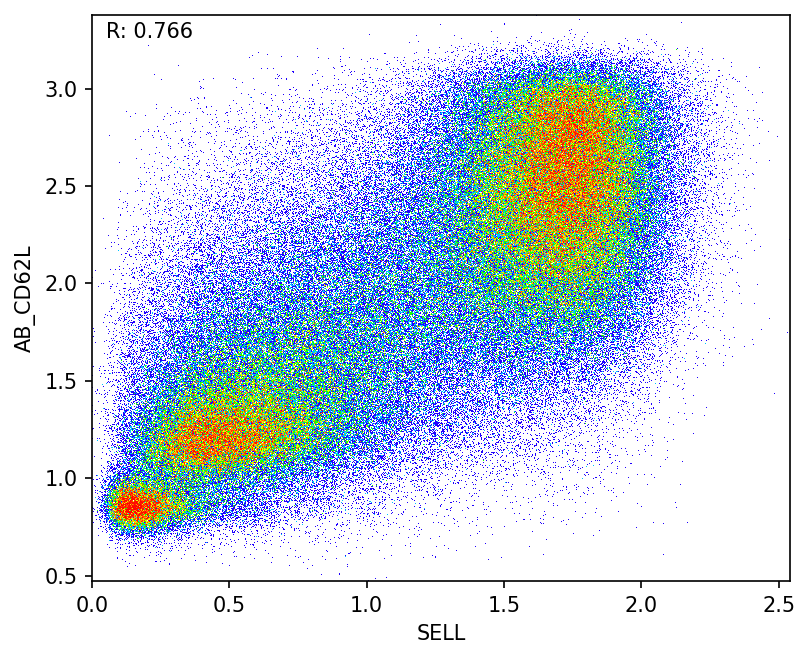

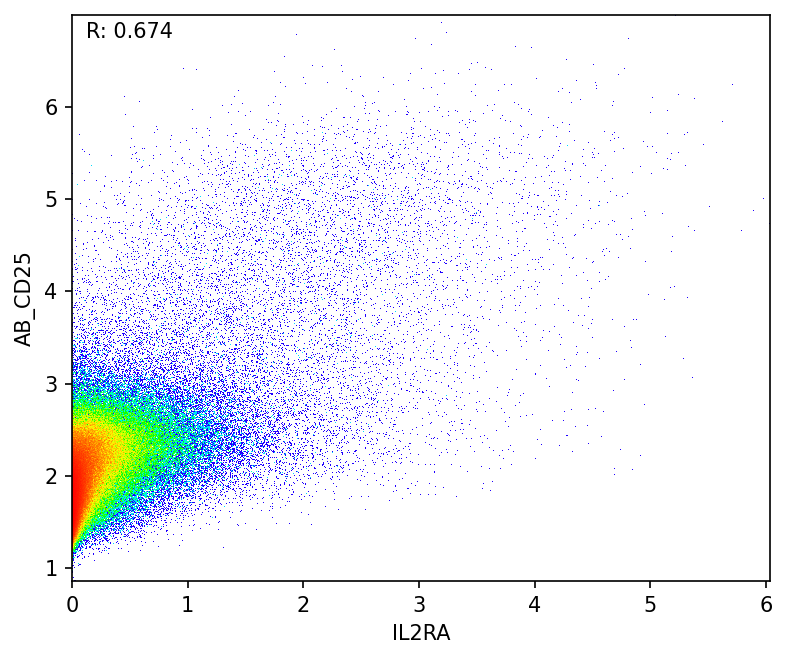

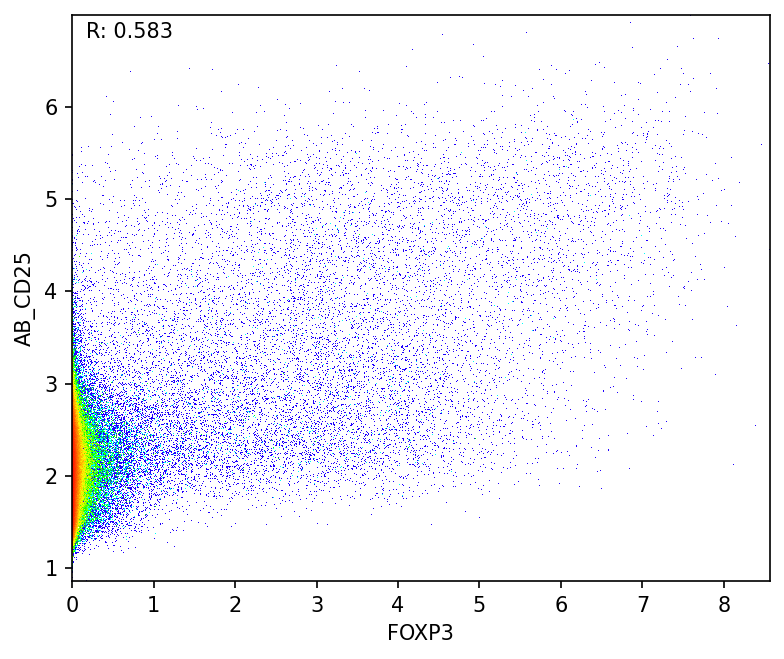

In [14]:
for (gene, prot) in prot_pairs:
    # print(gene, prot)
    r, _ = pearsonr(markers_magic[gene], markers_magic[prot])
    # print(r)
    
    fig, ax = plt.subplots(dpi = 150, figsize=(6,5))
    dsshow(pd.DataFrame({'x':markers_magic[gene], 'y':markers_magic[prot]}), 
           ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
    # ax.scatter(x = markers_magic[gene], y = markers_magic[prot], s = .2, alpha = .3)
    ax.text(.02, .96, ''.join(['R: ', str(round(r, 3))]), transform=ax.transAxes)
    ax.set_xlabel(gene)
    ax.set_ylabel(prot)

Compare non MAGIC-smoothed markers


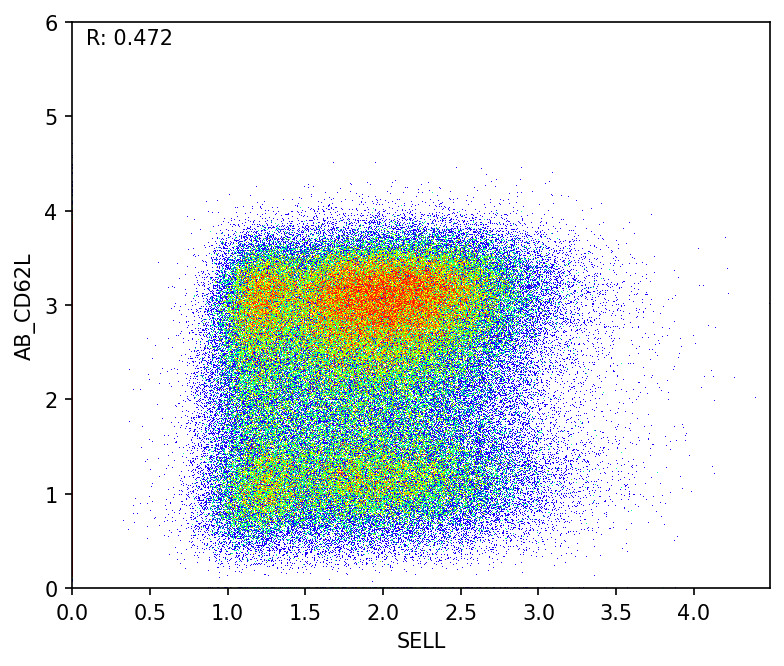

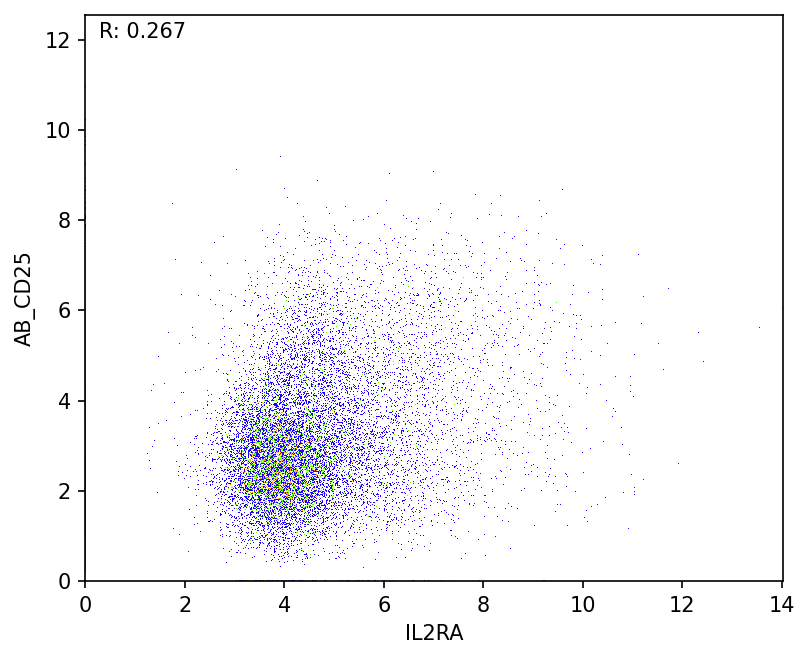

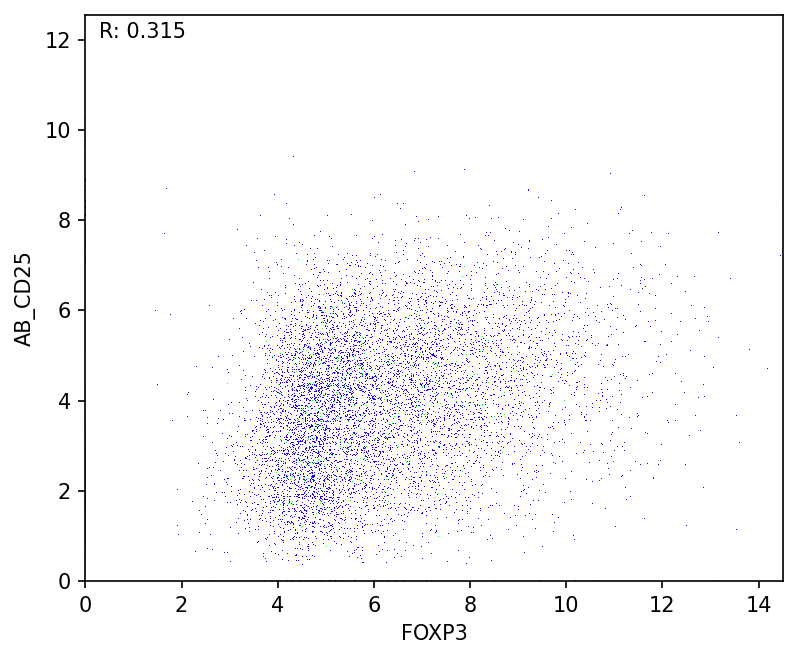

In [15]:
for (gene, prot) in prot_pairs:
    # print(gene, prot)
    r, _ = pearsonr(markers[gene], markers[prot])
    # print(r)
    
    fig, ax = plt.subplots(dpi = 150, figsize=(6,5))
    dsshow(pd.DataFrame({'x':markers[gene], 'y':markers[prot]}), 
           ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
    # ax.scatter(x = markers_magic[gene], y = markers_magic[prot], s = .2, alpha = .3)
    ax.text(.02, .96, ''.join(['R: ', str(round(r, 3))]), transform=ax.transAxes)
    ax.set_xlabel(gene)
    ax.set_ylabel(prot)

Compare proteins - MAGIC to non-smoothed

In [ ]:
prot_pairs

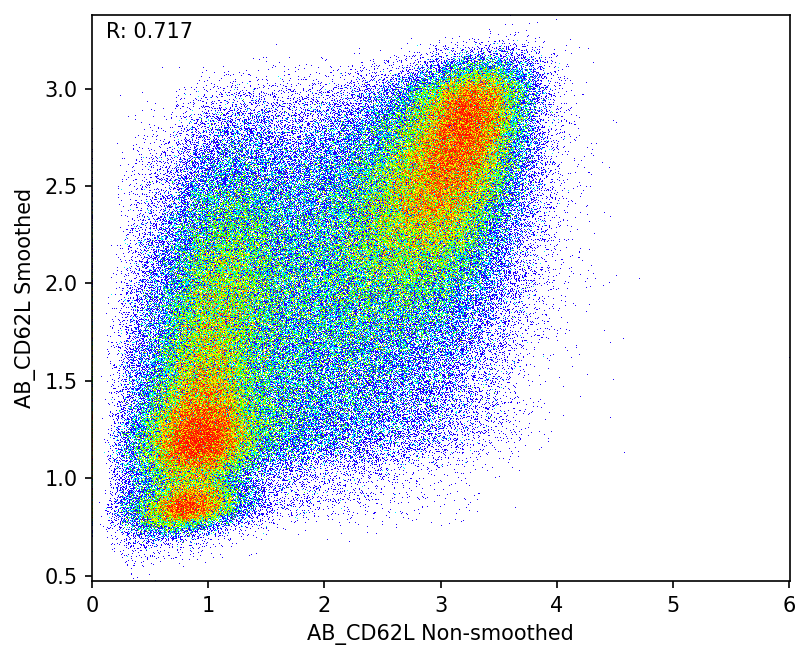

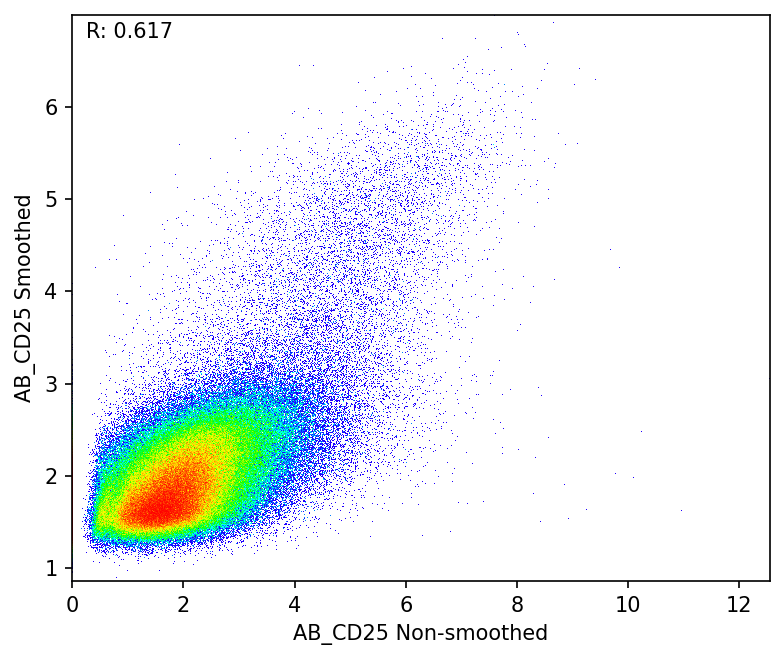

In [16]:
for prot in [#'AB_CD197_CCR7', 
             'AB_CD62L', 'AB_CD25']:
    r, _ = pearsonr(markers[prot], markers_magic[prot])
    # print(r)
    
    fig, ax = plt.subplots(dpi = 150, figsize=(6,5))
    dsshow(pd.DataFrame({'x':markers[prot], 'y':markers_magic[prot]}), 
           ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
    # ax.scatter(x = markers_magic[gene], y = markers_magic[prot], s = .2, alpha = .3)
    ax.text(.02, .96, ''.join(['R: ', str(round(r, 3))]), transform=ax.transAxes)
    ax.set_xlabel(prot + ' Non-smoothed')
    ax.set_ylabel(prot + ' Smoothed')

What proteins are correlated with CD25 and providing additional information to it?

In [ ]:
ADT_corr = pd.DataFrame(adata_ADT.X).corr()
ADT_corr.index = adata_ADT.var.index
ADT_corr.columns = adata_ADT.var.index

In [ ]:
ADT_corr['AB_CD25'].sort_values(ascending = False).head(20)

In [ ]:
ADT_corr['AB_CD25'].sort_values(ascending = False).tail(20)

In [ ]:
'AB_CD244_2B4' in markers.columns

In [ ]:
'AB_CD194_CCR4', 'AB_CD28', 'AB_CD39', 'AB_KLRG1_MAFA', 'AB_CD244_2B4'

## Lineage marker gating

In [18]:
labels = pd.Series(['Unclassified']*markers_magic.shape[0], index=markers_magic.index)
labels.value_counts()

Unclassified    336739
dtype: int64

In [19]:
labels_orig = labels.copy()

In [ ]:
# g1 = 'TRDC'
# g2 = 'TRGC1'
# g3 = 'TRAC'
# x = adata_RNA[:, g1].X.todense().flatten().tolist()[0]
# y = adata_RNA[:, g2].X.todense().flatten().tolist()[0]
# z = adata_RNA[:, g3].X.todense().flatten().tolist()[0]


# fig, ax = plt.subplots()
# ax.scatter(x, y, edgecolor='None', s=s, c=z)
# plt.show()

# adt_markers

# adata_ADT[:, g1].X

# g1 = 'AB_CD4'
# g2 = 'AB_CD8'
# g3 = 'AB_CD3'
# x = adata_ADT[:, g1].X.flatten().tolist()
# y = adata_ADT[:, g2].X.flatten().tolist()
# z = adata_ADT[:, g3].X.flatten().tolist()


# fig, ax = plt.subplots()
# ax.scatter(x, y, edgecolor='None', s=s, c=z
#           )
# plt.show()

# g1 = 'AB_CD4'
# g2 = 'AB_CD8'
# g3 = 'AB_CD3'
# x = markers_magic[g1]
# y = markers_magic[g2]
# z = markers_magic[g3]


# fig, ax = plt.subplots()
# ax.scatter(x, y, edgecolor='None', s=s, c=z
#           )
# plt.show()

# fig, ax = plt.subplots()
# ax.scatter(x,y, edgecolor='None', s=s, c=z, #vmin=0, vmax=vmax
#                  )

In [ ]:
g1 = 'TRDC'
g2 = 'TRGC1'
g3 = 'AB_CD94'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='Unclassified', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)

b=4
m = -2
ind = (y > (x*m)+b)
# labels.loc[ind.index[ind]] = 'gdT'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])


scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1 + ' RNA', fontsize=labfontsize)
ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)
cbar_ax = ax.inset_axes([0.05, .85, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)
xspan = np.linspace(0, 4, 2)
yspan = xspan*m + b
ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.plot(xspan, yspan, linestyle='--', color='k')
ax.set_xlim([0, xlim[1]])
ax.set_ylim([0, ylim[1]])
ax.text(7, .5, 'gdT', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_GDT.png'))

In [ ]:
g1 = 'TRDC'
g2 = 'TRGC1'
g3 = 'TRAC'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='Unclassified', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)

b=4
m = -2
ind = (y > (x*m)+b)
# labels.loc[ind.index[ind]] = 'gdT'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])


scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1 + ' RNA', fontsize=labfontsize)
ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)
cbar_ax = ax.inset_axes([0.05, .85, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)
xspan = np.linspace(0, 4, 2)
yspan = xspan*m + b
ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.plot(xspan, yspan, linestyle='--', color='k')
ax.set_xlim([0, xlim[1]])
ax.set_ylim([0, ylim[1]])
ax.text(7, .5, 'gdT', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_GDT.png'))

In [ ]:
g1 = 'TRDC'
g2 = 'TRGC1'
g3 = 'AB_abTCR'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='Unclassified', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)

b=4
m = -2
ind = (y > (x*m)+b)
# labels.loc[ind.index[ind]] = 'gdT'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1 + ' RNA', fontsize=labfontsize)
ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)
# cbar_ax = ax.inset_axes([0.05, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)
xspan = np.linspace(0, 4, 2)
yspan = xspan*m + b
ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.plot(xspan, yspan, linestyle='--', color='k')
ax.set_xlim([0, xlim[1]])
ax.set_ylim([0, ylim[1]])
ax.text(7, .5, 'gdT', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_GDT.png'))

In [ ]:
g1 = 'TRDC'
g2 = 'TRGC1'
g3 = 'AB_abTCR'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='Unclassified', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)

b=4
m = -2
ind = (y > (x*m)+b)
labels.loc[ind.index[ind]] = 'gdT'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])


scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1 + ' RNA', fontsize=labfontsize)
ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)
cbar_ax = ax.inset_axes([0.05, .85, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)
xspan = np.linspace(0, 4, 2)
yspan = xspan*m + b
ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.plot(xspan, yspan, linestyle='--', color='k')
ax.set_xlim([0, xlim[1]])
ax.set_ylim([0, ylim[1]])
ax.text(7, .5, 'gdT', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_GDT.png'))

In [ ]:
labels_orig = labels.copy()
labels.value_counts()

In [ ]:
labels = labels_orig.copy()

In [ ]:
markers_magic.columns

In [ ]:
g1 = 'AB_CD161'
g2 = 'AB_TCR_Va7_2'
g2_2 = 'AB_TCR_Vd2'
g3 = 'AB_CD195_CCR5'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='Unclassified', :].copy()

xthresh = .95
ythresh = 1.2
x = dat[g1]
y = dat[g2] + dat[g2_2]
z = dat[g3]
vmax = z.quantile(.995)
# ind = (x>xthresh) & (y>ythresh)
# labels.loc[ind.index[ind]] = 'MAIT'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', '') + ' + ' + g2_2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.3, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

ylim = ax.get_ylim()
xlim = ax.get_xlim()


xspan = np.linspace(xthresh, xlim[1], 2)
yspan = np.linspace(ythresh, 13, 2)
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')

ax.set_xlim([-.1, xlim[1]])
ax.set_ylim([-.1, ylim[1]])



ax.text(6, 8, 'MAIT', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)

# plt.savefig(os.path.join(figdir, 'Gating_MAIT.png'))



In [ ]:
# xthresh2 = 2.5
# ythresh2 = 4
# ind_subset = (x>xthresh) & (x<xthresh2) & (y>ythresh2)


In [ ]:
g1 = 'AB_CD161'
g2 = 'AB_TCR_Va7_2'
g2_2 = 'AB_TCR_Vd2'
g3 = 'AB_CD195_CCR5'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='Unclassified', :].copy()

xthresh = .95
ythresh = 1.2
xthresh2 = 2.5
ythresh2 = 4
x = dat[g1]
y = dat[g2] + dat[g2_2]
z = dat[g3]
vmax = z.quantile(.995)
# ind = (x>xthresh) & (y>ythresh)
# labels.loc[ind.index[ind]] = 'MAIT'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', '') + ' + ' + g2_2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.3, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

ylim = ax.get_ylim()
xlim = ax.get_xlim()


xspan = np.linspace(xthresh, xlim[1], 2)
yspan = np.linspace(ythresh2, 13, 2)
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
ax.plot([xthresh2, xthresh2], yspan, linestyle='--', color='k')
ax.plot(xspan, [ythresh2, ythresh2], linestyle='--', color='k')

ax.set_xlim([-.1, xlim[1]])
ax.set_ylim([-.1, ylim[1]])



ax.text(6, 8, 'MAIT', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)

# plt.savefig(os.path.join(figdir, 'Gating_MAIT.png'))



In [ ]:
g1 = 'AB_CD161'
g2 = 'AB_TCR_Va7_2'
g2_2 = 'AB_TCR_Vd2'
g3 = 'AB_CD94'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='Unclassified', :].copy()

xthresh = .95
ythresh = 1.2
x = dat[g1]
y = dat[g2] + dat[g2_2]
z = dat[g3]
vmax = z.quantile(.995)
# ind = (x>xthresh) & (y>ythresh)
# labels.loc[ind.index[ind]] = 'MAIT'


# xthresh2 = 2.5
# ythresh2 = 4
# ind_subset = (x>xthresh) & (x<xthresh2) & (y>ythresh2)
# labels.loc[ind_subset.index[ind_subset]] = 'Subset'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', '') + ' + ' + g2_2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.68, .25, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

ylim = ax.get_ylim()
xlim = ax.get_xlim()


xspan = np.linspace(xthresh, xlim[1], 2)
yspan = np.linspace(ythresh, 13, 2)
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')

ax.set_xlim([-.1, xlim[1]])
ax.set_ylim([-.1, ylim[1]])



ax.text(6, 8, 'MAIT', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)

# plt.savefig(os.path.join(figdir, 'Gating_MAIT.png'))



In [ ]:
g1 = 'AB_CD161'
g2 = 'AB_TCR_Va7_2'
g2_2 = 'AB_TCR_Vd2'
g3 = 'AB_CD8'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='Unclassified', :].copy()

xthresh = .95
ythresh = 1.2
x = dat[g1]
y = dat[g2] + dat[g2_2]
z = dat[g3]
vmax = z.quantile(.9)
# ind = (x>xthresh) & (y>ythresh)
# labels.loc[ind.index[ind]] = 'MAIT'


# xthresh2 = 2.5
# ythresh2 = 4
# ind_subset = (x>xthresh) & (x<xthresh2) & (y>ythresh2)
# labels.loc[ind_subset.index[ind_subset]] = 'Subset'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', '') + ' + ' + g2_2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.68, .25, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

ylim = ax.get_ylim()
xlim = ax.get_xlim()


xspan = np.linspace(xthresh, xlim[1], 2)
yspan = np.linspace(ythresh, 13, 2)
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')

ax.set_xlim([-.1, xlim[1]])
ax.set_ylim([-.1, ylim[1]])



ax.text(6, 8, 'MAIT', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)

# plt.savefig(os.path.join(figdir, 'Gating_MAIT.png'))



In [ ]:
g1 = 'AB_CD161'
g2 = 'AB_TCR_Va7_2'
g2_2 = 'AB_TCR_Vd2'
g3 = 'NK-like'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='Unclassified', :].copy()

xthresh = .95
ythresh = 1.2
x = dat[g1]
y = dat[g2] + dat[g2_2]
z = usage.loc[dat.index, 'NK-like']
vmax = z.quantile(.9)
# ind = (x>xthresh) & (y>ythresh)
# labels.loc[ind.index[ind]] = 'MAIT'


# xthresh2 = 2.5
# ythresh2 = 4
# ind_subset = (x>xthresh) & (x<xthresh2) & (y>ythresh2)
# labels.loc[ind_subset.index[ind_subset]] = 'Subset'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', '') + ' + ' + g2_2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.68, .25, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

ylim = ax.get_ylim()
xlim = ax.get_xlim()


xspan = np.linspace(xthresh, xlim[1], 2)
yspan = np.linspace(ythresh, 13, 2)
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')

ax.set_xlim([-.1, xlim[1]])
ax.set_ylim([-.1, ylim[1]])



ax.text(6, 8, 'MAIT', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)

# plt.savefig(os.path.join(figdir, 'Gating_MAIT.png'))



In [ ]:
g1 = 'AB_CD161'
g2 = 'AB_TCR_Va7_2'
g2_2 = 'AB_TCR_Vd2'
g3 = 'NK-like'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='Unclassified', :].copy()

xthresh = .95
ythresh = 1.2
x = dat[g1]
y = dat[g2] + dat[g2_2]
z = usage.loc[dat.index, 'Cytotoxic']
vmax = z.quantile(.9)
# ind = (x>xthresh) & (y>ythresh)
# labels.loc[ind.index[ind]] = 'MAIT'


# xthresh2 = 2.5
# ythresh2 = 4
# ind_subset = (x>xthresh) & (x<xthresh2) & (y>ythresh2)
# labels.loc[ind_subset.index[ind_subset]] = 'Subset'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', '') + ' + ' + g2_2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.68, .25, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

ylim = ax.get_ylim()
xlim = ax.get_xlim()


xspan = np.linspace(xthresh, xlim[1], 2)
yspan = np.linspace(ythresh, 13, 2)
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')

ax.set_xlim([-.1, xlim[1]])
ax.set_ylim([-.1, ylim[1]])



ax.text(6, 8, 'MAIT', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)

# plt.savefig(os.path.join(figdir, 'Gating_MAIT.png'))



In [ ]:
g1 = 'AB_CD161'
g2 = 'AB_TCR_Va7_2'
g2_2 = 'AB_TCR_Vd2'
g3 = 'AB_CD25'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='Unclassified', :].copy()

xthresh = .95
ythresh = 1.2
x = dat[g1]
y = dat[g2] + dat[g2_2]
z = dat[g3]
vmax = z.quantile(.995)
# ind = (x>xthresh) & (y>ythresh)
# labels.loc[ind.index[ind]] = 'MAIT'


# xthresh2 = 2.5
# ythresh2 = 4
# ind_subset = (x>xthresh) & (x<xthresh2) & (y>ythresh2)
# labels.loc[ind_subset.index[ind_subset]] = 'Subset'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', '') + ' + ' + g2_2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.68, .25, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

ylim = ax.get_ylim()
xlim = ax.get_xlim()


xspan = np.linspace(xthresh, xlim[1], 2)
yspan = np.linspace(ythresh, 13, 2)
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')

ax.set_xlim([-.1, xlim[1]])
ax.set_ylim([-.1, ylim[1]])



ax.text(6, 8, 'MAIT', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)

# plt.savefig(os.path.join(figdir, 'Gating_MAIT.png'))



In [ ]:
g1 = 'AB_CD161'
g2 = 'AB_TCR_Va7_2'
g2_2 = 'AB_TCR_Vd2'
g3 = 'AB_CD49b'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='Unclassified', :].copy()

xthresh = .95
ythresh = 1.2
x = dat[g1]
y = dat[g2] + dat[g2_2]
z = dat[g3]
vmax = z.quantile(.995)
# ind = (x>xthresh) & (y>ythresh)
# labels.loc[ind.index[ind]] = 'MAIT'


# xthresh2 = 2.5
# ythresh2 = 4
# ind_subset = (x>xthresh) & (x<xthresh2) & (y>ythresh2)
# labels.loc[ind_subset.index[ind_subset]] = 'Subset'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', '') + ' + ' + g2_2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.68, .25, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

ylim = ax.get_ylim()
xlim = ax.get_xlim()


xspan = np.linspace(xthresh, xlim[1], 2)
yspan = np.linspace(ythresh, 13, 2)
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')

ax.set_xlim([-.1, xlim[1]])
ax.set_ylim([-.1, ylim[1]])



ax.text(6, 8, 'MAIT', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)

# plt.savefig(os.path.join(figdir, 'Gating_MAIT.png'))



In [ ]:
g1 = 'AB_CD161'
g2 = 'AB_TCR_Va7_2'
g2_2 = 'AB_TCR_Vd2'
g3 = 'CCR6'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='Unclassified', :].copy()

xthresh = .95
ythresh = 1.2
x = dat[g1]
y = dat[g2] + dat[g2_2]
z = dat[g3]
vmax = z.quantile(.995)
# ind = (x>xthresh) & (y>ythresh)
# labels.loc[ind.index[ind]] = 'MAIT'


# xthresh2 = 2.5
# ythresh2 = 4
# ind_subset = (x>xthresh) & (x<xthresh2) & (y>ythresh2)
# labels.loc[ind_subset.index[ind_subset]] = 'Subset'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', '') + ' + ' + g2_2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.68, .25, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

ylim = ax.get_ylim()
xlim = ax.get_xlim()


xspan = np.linspace(xthresh, xlim[1], 2)
yspan = np.linspace(ythresh, 13, 2)
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')

ax.set_xlim([-.1, xlim[1]])
ax.set_ylim([-.1, ylim[1]])



ax.text(6, 8, 'MAIT', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)

# plt.savefig(os.path.join(figdir, 'Gating_MAIT.png'))



In [ ]:
g1 = 'AB_CD161'
g2 = 'AB_TCR_Va7_2'
g2_2 = 'AB_TCR_Vd2'
g3 = 'AB_CD195_CCR5'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='Unclassified', :].copy()

xthresh = .95
ythresh = 1.2
x = dat[g1]
y = dat[g2] + dat[g2_2]
z = dat[g3]
vmax = z.quantile(.995)
ind = (x>xthresh) & (y>ythresh)
labels.loc[ind.index[ind]] = 'MAIT'


xthresh2 = 2.5
ythresh2 = 4
ind_subset = (x>xthresh) & (x<xthresh2) & (y>ythresh2)
labels.loc[ind_subset.index[ind_subset]] = 'NKT'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', '') + ' + ' + g2_2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.68, .25, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

ylim = ax.get_ylim()
xlim = ax.get_xlim()


xspan = np.linspace(xthresh, xlim[1], 2)
yspan = np.linspace(ythresh, 13, 2)
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')

ax.set_xlim([-.1, xlim[1]])
ax.set_ylim([-.1, ylim[1]])



ax.text(6, 8, 'MAIT', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)

# plt.savefig(os.path.join(figdir, 'Gating_MAIT.png'))



In [ ]:
labels_orig = labels.copy()
labels.value_counts()

In [ ]:
labels_orig = labels.copy()

In [ ]:
markers_magic.columns

In [ ]:
g1 = 'AB_CD4'
g2 = 'AB_CD8'
g3 = 'AB_CD3'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='Unclassified', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)

xthresh = 1.5
ythresh = 1.25
# ind = (x>xthresh)
# labels.loc[ind.index[ind]] = 'CD4'
# ind = (x<xthresh) & (y>ythresh)
# labels.loc[ind.index[ind]] = 'CD8'
# ind = (x<xthresh) & (y<ythresh)
# labels.loc[ind.index[ind]] = 'dnT'
           
fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.7, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)



ylim = ax.get_ylim()
xlim = ax.get_xlim()

xspan = np.linspace(xthresh, xlim[1], 2)
yspan= np.linspace(0, ythresh, 2)
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')

xspan = np.linspace(xlim[0], 2.5, 2)
yspan= np.linspace(ythresh, ylim[1], 2)
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')

ax.text(2.6, .95, 'CD4', fontsize=labfontsize, va='center', ha='center')
ax.text(1, 2.5, 'CD8', fontsize=labfontsize, va='center', ha='center')
ax.text(.8, .2, 'dnT', fontsize=labfontsize, va='center', ha='center')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4andCD8.png'))

In [ ]:
g1 = 'AB_CD4'
g2 = 'AB_CD8'
g3 = 'AB_CD3'

s=.5
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='Unclassified', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)

xthresh = 1.5
ythresh = 1.25
ind = (x>xthresh)
labels.loc[ind.index[ind]] = 'CD4'
ind = (x<xthresh) & (y>ythresh)
labels.loc[ind.index[ind]] = 'CD8'
ind = (x<xthresh) & (y<ythresh)
labels.loc[ind.index[ind]] = 'dnT'
           
fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.7, .85, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)



ylim = ax.get_ylim()
xlim = ax.get_xlim()

xspan = np.linspace(xthresh, xlim[1], 2)
yspan= np.linspace(0, ythresh, 2)
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')

xspan = np.linspace(xlim[0], 2.5, 2)
yspan= np.linspace(ythresh, ylim[1], 2)
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')

ax.text(2.6, .95, 'CD4', fontsize=labfontsize, va='center', ha='center')
ax.text(1, 2.5, 'CD8', fontsize=labfontsize, va='center', ha='center')
ax.text(.8, .2, 'dnT', fontsize=labfontsize, va='center', ha='center')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4andCD8.png'))

In [ ]:
labels_orig = labels.copy()
labels.value_counts()

In [ ]:
g1 = 'FOXP3'
g2 = 'IL2RA'
g3 = 'AB_CD25'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)
b=3
m = -2
xspan = np.linspace(-.2, 3, 2)
yspan = xspan*m + b

# ind = y > (x*m)+b 
# labels.loc[ind.index[ind]] = 'Treg'

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1 + ' RNA', fontsize=labfontsize)
ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)
# cbar_ax = ax.inset_axes([0.1, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)


ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.plot(xspan, yspan, linestyle='--', color='k')
ax.set_xlim([-.2, xlim[1]])
ax.set_ylim([-.2, ylim[1]])
ax.text(7, .5, 'Treg', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_Treg.png'))

In [ ]:
g1 = 'FOXP3'
g2 = 'IL2RA'
g3 = 'AB_CD25'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)
b=3
m = -2
xspan = np.linspace(-.2, 3, 2)
yspan = xspan*m + b

ind = y > (x*m)+b 
labels.loc[ind.index[ind]] = 'Treg'

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1 + ' RNA', fontsize=labfontsize)
ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)
cbar_ax = ax.inset_axes([0.1, .85, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)


ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.plot(xspan, yspan, linestyle='--', color='k')
ax.set_xlim([-.2, xlim[1]])
ax.set_ylim([-.2, ylim[1]])
ax.text(7, .5, 'Treg', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_Treg.png'))

In [ ]:
labels_orig = labels.copy()
labels.value_counts()

In [ ]:
labels_orig = labels.copy()

In [ ]:
labels = labels_orig.copy()

In [ ]:
labels_orig.value_counts()

### CD4 gating

In [ ]:
# Gate based on protein/RNA markers
labels_ccr7 = labels_orig.copy()
labels_cd62l = labels_orig.copy()
labels_sell = labels_orig.copy()
labels_ccr7_prot = labels_orig.copy()

In [ ]:
# labels_ccr7_prot[labels_ccr7_prot.str.contains('CD4')] = 'CD4'

In [ ]:
g1 = 'AB_CD45RA'
g2 = 'SELL'
g3 =  'AB_CD45RO'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)


xthresh = 2.2
ythresh = 1
ind = (x>xthresh) & (y>ythresh)
labels_sell.loc[ind.index[ind]] = 'CD4 Naive'
ind = (x>xthresh) & (y<ythresh)
labels_sell.loc[ind.index[ind]] = 'CD4 TEMRA'
ind = (x<xthresh) & (y>ythresh)
labels_sell.loc[ind.index[ind]] = 'CD4 TCM'
ind = (x<xthresh) & (y<ythresh)
labels_sell.loc[ind.index[ind]] = 'CD4 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]#2.2
xmax = xlim[1]



ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')

# yspan= np.linspace(ythresh, ymax, 2)
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
ax.text(3, 2.9, 'CD4 Naive', fontsize=labfontsize, va='center', ha='center')
ax.text(3, 0.2, 'CD4 TEMRA', fontsize=labfontsize, va='center', ha='center')
ax.text(1.4, 2.9, 'CD4 TCM', fontsize=labfontsize, va='center', ha='center')
ax.text(1.4, 0.2, 'CD4 TEM', fontsize=labfontsize, va='center', ha='center')

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4naiveMem.png'))


In [ ]:
g1 = 'AB_CD45RA'
g2 = 'AB_CD62L'
g3 =  'AB_CD45RO'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)


xthresh = 2.2
ythresh = 1.5
ind = (x>xthresh) & (y>ythresh)
labels_cd62l.loc[ind.index[ind]] = 'CD4 Naive'
ind = (x>xthresh) & (y<ythresh)
labels_cd62l.loc[ind.index[ind]] = 'CD4 TEMRA'
ind = (x<xthresh) & (y>ythresh)
labels_cd62l.loc[ind.index[ind]] = 'CD4 TCM'
ind = (x<xthresh) & (y<ythresh)
labels_cd62l.loc[ind.index[ind]] = 'CD4 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]#2.2
xmax = xlim[1]



ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')

# yspan= np.linspace(ythresh, ymax, 2)
# ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
ax.text(3, 3.2, 'CD4 Naive', fontsize=labfontsize, va='center', ha='center')
ax.text(3, 0.6, 'CD4 TEMRA', fontsize=labfontsize, va='center', ha='center')
ax.text(1.4, 3.2, 'CD4 TCM', fontsize=labfontsize, va='center', ha='center')
ax.text(1.4, 0.6, 'CD4 TEM', fontsize=labfontsize, va='center', ha='center')



ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4naiveMem.png'))


In [ ]:
labels_ccr7_prot

In [ ]:
g1 = 'AB_CD45RA'
g2 = 'AB_CD197_CCR7'
g3 =  'AB_CD45RO'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)


xthresh = 2.2
ythresh = 3.2
ind = (x>xthresh) & (y>ythresh)
labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 Naive'
ind = (x>xthresh) & (y<ythresh)
labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TEMRA'
# ind = (x<xthresh) & (y>ythresh)
# labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TCM'
# ind = (x<xthresh) & (y<ythresh)
# labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]#2.2
xmax = xlim[1]



ax.plot([xthresh, xmax], [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')

# yspan= np.linspace(ythresh, ymax, 2)
# ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
ax.text(3, 5.5, 'CD4 Naive', fontsize=labfontsize, va='center', ha='center')
ax.text(3, 2, 'CD4 TEMRA', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 5.5, 'CD4 TCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 2, 'CD4 TEM', fontsize=labfontsize, va='center', ha='center')



ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4naiveMem.png'))


In [ ]:
g1 = 'AB_CD45RA'
g2 = 'CCR7'
g3 =  'AB_CD45RO'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)


xthresh = 2
ythresh = .3
# ind = (x>xthresh) & (y>ythresh)
# labels.loc[ind.index[ind]] = 'CD4 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels.loc[ind.index[ind]] = 'CD4 TEMRA'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = -.4
ymax = 3
xmin = -.05
xmax = xlim[1]



ax.plot([xthresh, xmax], [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')

yspan= np.linspace(ythresh, ymax, 2)
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.text(2.6, 2.5, 'CD4\nNaive', fontsize=labfontsize, va='center', ha='center')
ax.text(3, -0.2, 'CD4 TEMRA', fontsize=labfontsize, va='center', ha='center')



ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4naiveMem.png'))


In [ ]:
g1 = 'AB_CD45RA'
g2 = 'CCR7'
g3 =  'AB_CD45RO'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)


xthresh = 2
ythresh = .3
ind = (x>xthresh) & (y>ythresh)
labels.loc[ind.index[ind]] = 'CD4 Naive'
ind = (x>xthresh) & (y<ythresh)
labels.loc[ind.index[ind]] = 'CD4 TEMRA'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)
cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = -.4
ymax = 3
xmin = -.05
xmax = xlim[1]



ax.plot([xthresh, xmax], [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')

yspan= np.linspace(ythresh, ymax, 2)
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.text(2.6, 2.5, 'CD4\nNaive', fontsize=labfontsize, va='center', ha='center')
ax.text(3, -0.2, 'CD4 TEMRA', fontsize=labfontsize, va='center', ha='center')



ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4naiveMem.png'))


In [ ]:
labels_orig = labels.copy()
labels.value_counts()

In [ ]:
labels_orig = labels.copy()

In [ ]:
labels = labels_orig.copy()
labels.value_counts()

In [ ]:
markers_magic.columns

In [ ]:
labels_ccr7_prot.value_counts()

In [ ]:
labels_cd62l.value_counts()

In [ ]:
ind.value_counts()

In [ ]:
g1 = 'AB_CD62L'
g2 = 'AB_CD197_CCR7'
g3 = 'AB_CD27'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_ccr7_prot=='CD4', :].copy()
x = dat[g1]
y = dat[g2]
z = dat[g3]
y_trans = (y+1e-3).apply(np.log10)

vmax = z.quantile(.995)

ythresh = 0.38
ind = (y_trans>ythresh)

# labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TCM'
# labels_ccr7_prot.loc[ind.index[~ind]] = 'CD4 TEM'

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)



# xmin = -.4
ylim = ax.get_ylim()
xlim = ax.get_xlim()

# xspan = np.linspace(xmin, xlim[1], 2)
# yspan = xspan*m + b
ax.plot([xlim[0], xlim[1]], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ylim[0], ylim[1]], linestyle='--', color='k')
# ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xlim[1]])
# ax.set_ylim([ylim[0], ylim[1]])
ax.tick_params(labelsize=ticklabfontsize)

ax.text(2.4, 0.65, 'CD4\nTCM', fontsize=labfontsize, va='center', ha='center')
ax.text(2.4, 0.25, 'CD4\nTEM', fontsize=labfontsize, va='center', ha='center')

# plt.savefig(os.path.join(figdir, 'Gating_CD4EM.png'))

In [ ]:
g1 = 'SELL'
g2 = 'AB_CD197_CCR7'
g3 = 'AB_CD27'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_ccr7_prot=='CD4', :].copy()
x = dat[g1]
y = dat[g2]
z = dat[g3]
y_trans = (y+1e-3).apply(np.log10)

vmax = z.quantile(.995)

ythresh = 0.38
ind = (y_trans>ythresh)

labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TCM'
labels_ccr7_prot.loc[ind.index[~ind]] = 'CD4 TEM'

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
ax.set_xlabel(g1 + ' RNA', fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)



# xmin = -.4
ylim = ax.get_ylim()
xlim = ax.get_xlim()

# xspan = np.linspace(xmin, xlim[1], 2)
# yspan = xspan*m + b
ax.plot([xlim[0], xlim[1]], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ylim[0], ylim[1]], linestyle='--', color='k')
# ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xlim[1]])
# ax.set_ylim([ylim[0], ylim[1]])
ax.tick_params(labelsize=ticklabfontsize)

ax.text(2.4, 0.65, 'CD4\nTCM', fontsize=labfontsize, va='center', ha='center')
ax.text(2.4, 0.25, 'CD4\nTEM', fontsize=labfontsize, va='center', ha='center')

# plt.savefig(os.path.join(figdir, 'Gating_CD4EM.png'))

In [ ]:
g1 = 'SELL'
g2 = 'AB_CD197_CCR7'
g3 = 'AB_CD27'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD4', :].copy()
x = dat[g1]
y = dat[g2]
z = dat[g3]
y_trans = (y+1e-3).apply(np.log10)

vmax = z.quantile(.995)

b=-1.2
m = 0

# '''
# ind = y_trans > (m*x) + b
# labels.loc[ind.index[ind]] = 'CD4 TCM'
# labels.loc[ind.index[~ind]] = 'CD4 TEM'
# '''

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
ax.set_xlabel(g1 + ' RNA', fontsize=labfontsize)
ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)



# cbar_ax = ax.inset_axes([0.8, .15, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)


xmin = -.4
# ylim = ax.get_ylim()
# xlim = ax.get_xlim()
# xspan = np.linspace(xmin, xlim[1], 2)
# yspan = xspan*m + b

# ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xlim[1]])
# ax.set_ylim([ylim[0], ylim[1]])
ax.tick_params(labelsize=ticklabfontsize)

# ax.text(-.1, 0, 'CD4\nTcm', fontsize=labfontsize, va='center', ha='center')
# ax.text(-.1, -2.5, 'CD4\nTem', fontsize=labfontsize, va='center', ha='center')

# plt.savefig(os.path.join(figdir, 'Gating_CD4EM.png'))

In [ ]:
g1 = 'AB_CD62L'
g2 = 'CCR7'
g3 = 'AB_CD27'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD4', :].copy()
x = dat[g1]
y = dat[g2]
z = dat[g3]
y_trans = (y+1e-3).apply(np.log10)

vmax = z.quantile(.995)

b=-1.2
m = 0

# '''
# ind = y_trans > (m*x) + b
# labels.loc[ind.index[ind]] = 'CD4 TCM'
# labels.loc[ind.index[~ind]] = 'CD4 TEM'
# '''

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
ax.set_xlabel(g1, fontsize=labfontsize)
ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)



# cbar_ax = ax.inset_axes([0.8, .15, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)


xmin = -.4
# ylim = ax.get_ylim()
# xlim = ax.get_xlim()
# xspan = np.linspace(xmin, xlim[1], 2)
# yspan = xspan*m + b

# ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xlim[1]])
# ax.set_ylim([ylim[0], ylim[1]])
ax.tick_params(labelsize=ticklabfontsize)

# ax.text(-.1, 0, 'CD4\nTcm', fontsize=labfontsize, va='center', ha='center')
# ax.text(-.1, -2.5, 'CD4\nTem', fontsize=labfontsize, va='center', ha='center')

# plt.savefig(os.path.join(figdir, 'Gating_CD4EM.png'))

In [ ]:
g1 = 'AB_CD62L'
g2 = 'AB_CD197_CCR7'
g3 = 'AB_CD27'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD4', :].copy()
x = dat[g1]
y = dat[g2]
z = dat[g3]
y_trans = (y+1e-3).apply(np.log10)

vmax = z.quantile(.995)

b=-1.2
m = 0

# '''
# ind = y_trans > (m*x) + b
# labels.loc[ind.index[ind]] = 'CD4 TCM'
# labels.loc[ind.index[~ind]] = 'CD4 TEM'
# '''

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
ax.set_xlabel(g1, fontsize=labfontsize)
ax.set_ylabel(g2, fontsize=labfontsize)



# cbar_ax = ax.inset_axes([0.8, .15, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)


xmin = -.4
# ylim = ax.get_ylim()
# xlim = ax.get_xlim()
# xspan = np.linspace(xmin, xlim[1], 2)
# yspan = xspan*m + b

# ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xlim[1]])
# ax.set_ylim([ylim[0], ylim[1]])
ax.tick_params(labelsize=ticklabfontsize)

# ax.text(-.1, 0, 'CD4\nTcm', fontsize=labfontsize, va='center', ha='center')
# ax.text(-.1, -2.5, 'CD4\nTem', fontsize=labfontsize, va='center', ha='center')

# plt.savefig(os.path.join(figdir, 'Gating_CD4EM.png'))

In [ ]:
g1 = 'SELL'
g2 = 'CCR7'
g3 = 'AB_CD27'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD4', :].copy()
x = dat[g1]
y = dat[g2]
z = dat[g3]
y_trans = (y+1e-3).apply(np.log10)

vmax = z.quantile(.995)

b=-1.2
m = 0

# '''
# ind = y_trans > (m*x) + b
# labels.loc[ind.index[ind]] = 'CD4 TCM'
# labels.loc[ind.index[~ind]] = 'CD4 TEM'
# '''

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
ax.set_xlabel(g1 + ' RNA', fontsize=labfontsize)
ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)



# cbar_ax = ax.inset_axes([0.8, .15, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)


xmin = -.4
ylim = ax.get_ylim()
xlim = ax.get_xlim()
xspan = np.linspace(xmin, xlim[1], 2)
yspan = xspan*m + b

ax.plot(xspan, yspan, linestyle='--', color='k')
ax.set_xlim([xmin, xlim[1]])
ax.set_ylim([ylim[0], ylim[1]])
ax.tick_params(labelsize=ticklabfontsize)

ax.text(-.1, 0, 'CD4\nTcm', fontsize=labfontsize, va='center', ha='center')
ax.text(-.1, -2.5, 'CD4\nTem', fontsize=labfontsize, va='center', ha='center')

# plt.savefig(os.path.join(figdir, 'Gating_CD4EM.png'))

In [ ]:
g1 = 'SELL'
g2 = 'CCR7'
g3 = 'AB_CD27'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD4', :].copy()
x = dat[g1]
y = dat[g2]
z = dat[g3]
y_trans = (y+1e-3).apply(np.log10)

vmax = z.quantile(.995)

b=-1.2
m = 0

'''
ind = y_trans > (m*x) + b
labels.loc[ind.index[ind]] = 'CD4 TCM'
labels.loc[ind.index[~ind]] = 'CD4 TEM'
'''

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

scim = ax.scatter(x,y_trans, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1 + ' RNA', fontsize=labfontsize)
ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)



cbar_ax = ax.inset_axes([0.8, .15, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)


xmin = -.4
ylim = ax.get_ylim()
xlim = ax.get_xlim()
xspan = np.linspace(xmin, xlim[1], 2)
yspan = xspan*m + b

ax.plot(xspan, yspan, linestyle='--', color='k')
ax.set_xlim([xmin, xlim[1]])
ax.set_ylim([ylim[0], ylim[1]])
ax.tick_params(labelsize=ticklabfontsize)

ax.text(-.1, 0, 'CD4\nTcm', fontsize=labfontsize, va='center', ha='center')
ax.text(-.1, -2.5, 'CD4\nTem', fontsize=labfontsize, va='center', ha='center')

# plt.savefig(os.path.join(figdir, 'Gating_CD4EM.png'))

In [ ]:
labels.value_counts()

In [ ]:
g1 = 'SELL'
g2 = 'CCR7'
g3 = 'AB_CD27'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD4', :].copy()
x = dat[g1]
y = dat[g2]
z = dat[g3]
y_trans = (y+1e-5).apply(np.log10)

vmax = z.quantile(.995)

b=1.5
m = -.6

# ind = y > (x*m)+b 
# labels.loc[ind.index[ind]] = 'CD4 TCM'
# labels.loc[ind.index[~ind]] = 'CD4 TEM'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1 + ' RNA', fontsize=labfontsize)
ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)
# cbar_ax = ax.inset_axes([0.1, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xmin = -.4
ylim = ax.get_ylim()
xlim = ax.get_xlim()
xspan = np.linspace(xmin, xlim[1], 2)
yspan = xspan*m + b

ax.plot(xspan, yspan, linestyle='--', color='k')
ax.set_xlim([xmin, xlim[1]])
ax.set_ylim([ylim[0], ylim[1]])
ax.tick_params(labelsize=ticklabfontsize)

ax.text(1.8, 2.2, 'CD4\nTcm', fontsize=labfontsize, va='center', ha='center')
ax.text(-.1, .65, 'CD4\nTem', fontsize=labfontsize, va='center', ha='center')

# plt.savefig(os.path.join(figdir, 'Gating_CD4EM.png'))

In [ ]:
g1 = 'SELL'
g2 = 'CCR7'
g3 = 'AB_CD27'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD4', :].copy()
x = dat[g1]
y = dat[g2]
z = dat[g3]
y_trans = (y+1e-5).apply(np.log10)

vmax = z.quantile(.995)

b=1.5
m = -0.6

ind = y > (x*m)+b 
labels.loc[ind.index[ind]] = 'CD4 TCM'
labels.loc[ind.index[~ind]] = 'CD4 TEM'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1 + ' RNA', fontsize=labfontsize)
ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)
cbar_ax = ax.inset_axes([0.1, .85, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xmin = -.4
ylim = ax.get_ylim()
xlim = ax.get_xlim()
xspan = np.linspace(xmin, xlim[1], 2)
yspan = xspan*m + b

ax.plot(xspan, yspan, linestyle='--', color='k')
ax.set_xlim([xmin, xlim[1]])
ax.set_ylim([ylim[0], ylim[1]])
ax.tick_params(labelsize=ticklabfontsize)

ax.text(1.8, 2.2, 'CD4\nTcm', fontsize=labfontsize, va='center', ha='center')
ax.text(-.1, .65, 'CD4\nTem', fontsize=labfontsize, va='center', ha='center')

# plt.savefig(os.path.join(figdir, 'Gating_CD4EM.png'))

In [ ]:
labels_orig = labels.copy()
labels.value_counts()

In [ ]:
labels = labels_orig.copy()
labels.value_counts()

### CD8 gating

In [ ]:
# labels_ccr7_prot[labels_ccr7_prot.str.contains('CD8')] = 'CD8'

In [ ]:
# labels_cd62l[labels_cd62l.str.contains('CD8')] = 'CD8'

In [ ]:
# labels_sell[labels_sell.str.contains('CD8')] = 'CD8'

In [ ]:
g1 = 'AB_CD45RA'
g2 = 'SELL'
g3 =  'AB_CD45RO'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD8', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)


xthresh=2.6
ythresh=1
ind = (x>xthresh) & (y>ythresh)
labels_sell.loc[ind.index[ind]] = 'CD8 Naive'
ind = (x>xthresh) & (y<ythresh)
labels_sell.loc[ind.index[ind]] = 'CD8 TEMRA'
ind = (x<xthresh) & (y>ythresh)
labels_sell.loc[ind.index[ind]] = 'CD8 TCM'
ind = (x<xthresh) & (y<ythresh)
labels_sell.loc[ind.index[ind]] = 'CD8 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xmin = xlim[0]
xmax = xlim[1]
ymin = ylim[0]
ymax = ylim[1]
# ymin = -.3
# ymax = 2.8
# xmax = 4

xspan = np.linspace(xthresh, xmax, 2)
yspan= np.linspace(ymin, ymax, 2)
ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')
# ax.set_xlim(xlim)
ax.text(3.6, 2.5, 'CD8\nNaive', fontsize=labfontsize, va='center', ha='center')
ax.text(3.6, 0.4, 'CD8\nTEMRA', fontsize=labfontsize, va='center', ha='center')
ax.text(1.7, 2.5, 'CD8\nTCM', fontsize=labfontsize, va='center', ha='center')
ax.text(1.7, 0.3, 'CD8 TEM', fontsize=labfontsize, va='center', ha='center')

# ax.set_xlim([0, xmax])
# ax.set_ylim([ymin, ymax])

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD8NaiveMem.png'))

In [ ]:
g1 = 'AB_CD45RA'
g2 = 'AB_CD62L'
g3 = 'AB_CD45RO'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD8', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)


xthresh=2.7
ythresh=1.4
ind = (x>xthresh) & (y>ythresh)
labels_cd62l.loc[ind.index[ind]] = 'CD8 Naive'
ind = (x>xthresh) & (y<ythresh)
labels_cd62l.loc[ind.index[ind]] = 'CD8 TEMRA'
ind = (x<xthresh) & (y>ythresh)
labels_cd62l.loc[ind.index[ind]] = 'CD8 TCM'
ind = (x<xthresh) & (y<ythresh)
labels_cd62l.loc[ind.index[ind]] = 'CD8 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]
xmax = xlim[1]

xspan = np.linspace(xthresh, xmax, 2)
yspan= np.linspace(ymin, ymax, 2)
ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')
# ax.set_xlim(xlim)
ax.text(3.6, 2.5, 'CD8\nNaive', fontsize=labfontsize, va='center', ha='center')
ax.text(3.6, 0.7, 'CD8\nTEMRA', fontsize=labfontsize, va='center', ha='center')
ax.text(1.7, 2.5, 'CD8\nTCM', fontsize=labfontsize, va='center', ha='center')
ax.text(1.7, 0.6, 'CD8 TEM', fontsize=labfontsize, va='center', ha='center')

# ax.set_xlim([0, xmax])
# ax.set_ylim([ymin, ymax])

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD8NaiveMem.png'))

In [ ]:
g1 = 'AB_CD45RA'
g2 = 'AB_CD197_CCR7'
g3 = 'AB_CD45RO'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD8', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)


xthresh=3.3
ythresh=3.3
ind = (x>xthresh) & (y>ythresh)
labels_ccr7_prot.loc[ind.index[ind]] = 'CD8 Naive'
ind = (x>xthresh) & (y<ythresh)
labels_ccr7_prot.loc[ind.index[ind]] = 'CD8 TEMRA'
ind = (x<xthresh) & (y>ythresh)
# labels_cd62l.loc[ind.index[ind]] = 'CD8 TCM'
# ind = (x<xthresh) & (y<ythresh)
# labels_cd62l.loc[ind.index[ind]] = 'CD8 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xmin = xlim[0]
xmax = xlim[1]
ymin = ylim[0]
ymax = ylim[1]

# ymin = -.3
# ymax = 2.8
# xmax = 4

xspan = np.linspace(xthresh, xmax, 2)
yspan= np.linspace(ymin, ymax, 2)
ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')
# ax.set_xlim(xlim)
ax.text(3.7, 5.2, 'CD8\nNaive', fontsize=labfontsize, va='center', ha='center')
ax.text(3.7, 2, 'CD8\nTEMRA', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.7, 2.5, 'CD8\nTCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.7, 0.3, 'CD8 TEM', fontsize=labfontsize, va='center', ha='center')

# ax.set_xlim([0, xmax])
# ax.set_ylim([ymin, ymax])

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD8NaiveMem.png'))

In [ ]:
g1 = 'AB_CD45RA'
g2 = 'CCR7'
g3 =  'AB_CD45RO'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD8', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)


xthresh=2.5
ythresh=.55
# ind = (x>xthresh) & (y>ythresh)
# labels.loc[ind.index[ind]] = 'CD8 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels.loc[ind.index[ind]] = 'CD8 TEMRA'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xmin = xlim[0]
xmax = xlim[1]
ymin = ylim[0]
ymax = ylim[1]

# ymin = -.3
# ymax = 2.8
# xmax = 4

xspan = np.linspace(xthresh, xmax, 2)
yspan= np.linspace(ymin, ymax, 2)
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# ax.set_xlim(xlim)
ax.text(3.05, 2.2, 'CD8\nNaive', fontsize=labfontsize, va='center', ha='center')
ax.text(3.3, 0.4, 'CD8 TEMRA', fontsize=labfontsize, va='center', ha='center')

# ax.set_xlim([0, xmax])
# ax.set_ylim([ymin, ymax])

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD8NaiveMem.png'))

In [ ]:
markers_magic.columns

In [ ]:
g1 = 'AB_CD45RA'
g2 = 'CCR7'
g3 =  'AB_CD45RO'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD8', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)


xthresh=2.5
ythresh=.55
ind = (x>xthresh) & (y>ythresh)
labels.loc[ind.index[ind]] = 'CD8 Naive'
ind = (x>xthresh) & (y<ythresh)
labels.loc[ind.index[ind]] = 'CD8 TEMRA'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)
cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xmin = xlim[0]
xmax = xlim[1]
ymin = ylim[0]
ymax = ylim[1]

# ymin = -.3
# ymax = 2.8
# xmax = 4

xspan = np.linspace(xthresh, xmax, 2)
yspan= np.linspace(ymin, ymax, 2)
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# ax.set_xlim(xlim)
ax.text(3.05, 2.5, 'CD8\nNaive', fontsize=labfontsize, va='center', ha='center')
ax.text(3.3, -0.2, 'CD8 TEMRA', fontsize=labfontsize, va='center', ha='center')

# ax.set_xlim([0, xmax])
# ax.set_ylim([ymin, ymax])

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD8NaiveMem.png'))

In [ ]:
labels_orig = labels.copy()
labels.value_counts()

In [ ]:
labels = labels_orig.copy()
labels.value_counts()

In [ ]:
markers_magic.columns

In [ ]:
g1 = 'SELL'
g2 = 'AB_CD197_CCR7'
g3 = 'AB_CD27'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD8', :].copy()
x = dat[g1]
y = dat[g2]
z = dat[g3]
y_trans = y#(y+1e-5).apply(np.log10)
x_trans = x#(x+1e-5).apply(np.log10)

vmax = z.quantile(.995)

b=-0.6
m = 0

# ind = y_trans > (x*m)+b 
# labels_ccr7_prot.loc[ind.index[ind]] = 'CD8 TCM'
# labels_ccr7_prot.loc[ind.index[~ind]] = 'CD8 TEM'

ythresh = b
fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x_trans, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y_trans, edgecolor='None', s=s, c=z,  vmin=0, vmax=vmax)



ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([0.8, .1, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

# ylim = ax.get_ylim()
# xlim = ax.get_xlim()
# xspan = np.linspace(xlim[0], xlim[1], 2)
# yspan = xspan*m + b
# ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
# ax.text(2.6, -.2, 'CD8\nTcm', fontsize=labfontsize, va='center', ha='center')
# ax.text(2.3, -3, 'CD8\nTem', fontsize=labfontsize, va='center', ha='center')

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD8EM.png'))

In [ ]:
g1 = 'AB_CD62L'
g2 = 'AB_CD197_CCR7'
g3 = 'AB_CD27'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_ccr7_prot=='CD8', :].copy()
x = dat[g1]
y = dat[g2]
z = dat[g3]
y_trans = y#(y+1e-5).apply(np.log10)
x_trans = x#(x+1e-5).apply(np.log10)

vmax = z.quantile(.995)

b=4.25
m = -1

ind = y_trans > (x*m)+b 
labels_ccr7_prot.loc[ind.index[ind]] = 'CD8 TCM'
labels_ccr7_prot.loc[ind.index[~ind]] = 'CD8 TEM'

ythresh = b
fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x_trans, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y_trans, edgecolor='None', s=s, c=z,  vmin=0, vmax=vmax)



ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([0.8, .1, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

ylim = ax.get_ylim()
xlim = ax.get_xlim()
xspan = np.linspace(xlim[0], xlim[1], 2)
yspan = xspan*m + b
ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
ax.text(2.3, 3.8, 'CD8\nTCM', fontsize=labfontsize, va='center', ha='center')
ax.text(0.8, 1.8, 'CD8\nTEM', fontsize=labfontsize, va='center', ha='center')

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD8EM.png'))

In [ ]:
g1 = 'AB_CD62L'
g2 = 'CCR7'
g3 = 'AB_CD27'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD8', :].copy()
x = dat[g1]
y = dat[g2]
z = dat[g3]
y_trans = (y+1e-5).apply(np.log10)
vmax = z.quantile(.995)

b=-0.6
m = 0

# ind = y_trans > (x*m)+b 
# labels.loc[ind.index[ind]] = 'CD8 TCM'
# labels.loc[ind.index[~ind]] = 'CD8 TEM'

ythresh = b
fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y_trans, edgecolor='None', s=s, c=z,  vmin=0, vmax=vmax)



ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel('log10 ' + g2 + ' RNA', fontsize=labfontsize)
# cbar_ax = ax.inset_axes([0.8, .1, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

# ylim = ax.get_ylim()
# xlim = ax.get_xlim()
# xspan = np.linspace(xlim[0], xlim[1], 2)
# yspan = xspan*m + b
# ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
# ax.text(2.6, -.2, 'CD8\nTcm', fontsize=labfontsize, va='center', ha='center')
# ax.text(2.3, -3, 'CD8\nTem', fontsize=labfontsize, va='center', ha='center')

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD8EM.png'))

In [ ]:
g1 = 'SELL'
g2 = 'CCR7'
g3 = 'AB_CD27'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD8', :].copy()
x = dat[g1]
y = dat[g2]
z = dat[g3]
y_trans = (y+1e-5).apply(np.log10)
vmax = z.quantile(.995)

b=-0.6
m = 0

# ind = y_trans > (x*m)+b 
# labels.loc[ind.index[ind]] = 'CD8 TCM'
# labels.loc[ind.index[~ind]] = 'CD8 TEM'

ythresh = b
fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y_trans, edgecolor='None', s=s, c=z,  vmin=0, vmax=vmax)



ax.set_xlabel(g1 + ' RNA', fontsize=labfontsize)
ax.set_ylabel('log10 ' + g2 + ' RNA', fontsize=labfontsize)
# cbar_ax = ax.inset_axes([0.8, .1, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

ylim = ax.get_ylim()
xlim = ax.get_xlim()
xspan = np.linspace(xlim[0], xlim[1], 2)
yspan = xspan*m + b
ax.plot(xspan, yspan, linestyle='--', color='k')
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.text(2.6, -.2, 'CD8\nTcm', fontsize=labfontsize, va='center', ha='center')
ax.text(2.3, -3, 'CD8\nTem', fontsize=labfontsize, va='center', ha='center')

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD8EM.png'))

In [ ]:
g1 = 'SELL'
g2 = 'CCR7'
g3 = 'AB_CD27'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels=='CD8', :].copy()
x = dat[g1]
y = dat[g2]
z = dat[g3]
y_trans = (y+1e-5).apply(np.log10)
vmax = z.quantile(.995)

b=-0.6
m = 0

ind = y_trans > (x*m)+b 
labels.loc[ind.index[ind]] = 'CD8 TCM'
labels.loc[ind.index[~ind]] = 'CD8 TEM'

ythresh = b
fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

scim = ax.scatter(x,y_trans, edgecolor='None', s=s, c=z,  vmin=0, vmax=vmax)



ax.set_xlabel(g1 + ' RNA', fontsize=labfontsize)
ax.set_ylabel('log10 ' + g2 + ' RNA', fontsize=labfontsize)
cbar_ax = ax.inset_axes([0.8, .1, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

ylim = ax.get_ylim()
xlim = ax.get_xlim()
xspan = np.linspace(xlim[0], xlim[1], 2)
yspan = xspan*m + b
ax.plot(xspan, yspan, linestyle='--', color='k')
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.text(2.6, -.2, 'CD8\nTcm', fontsize=labfontsize, va='center', ha='center')
ax.text(2.3, -3, 'CD8\nTem', fontsize=labfontsize, va='center', ha='center')

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD8EM.png'))

In [ ]:
labels.value_counts()

In [ ]:
labels_orig = labels.copy()

In [ ]:
labels_orig.value_counts()

In [ ]:
labels.value_counts().index

In [ ]:
# labels = pd.Series(['Unclassified']*markers_magic.shape[0], index=markers_magic.index)


# fig = plt.figure(constrained_layout=True, figsize=(3., 5.), dpi=200)
# gs = gridspec.GridSpec(4, 2, figure=fig, left=0.1, wspace=.05,
#                        bottom=.2, right=.95, top=.92)

# axes =[]
# for i in range(4):
#     rowax = []
#     for j in range(2):
#         rowax.append(fig.add_subplot(gs[i, j]))
        
#     axes.append(rowax)
    
# s=1
# labfontsize=7
# ticklabfontsize=7
# cbarlab_fs = 6
# cbartick_fs = 4
    
# #################################################################################################################################################

# g1 = 'TRDC'
# g2 = 'TRGC1'
# g3 = 'TRAC'

# dat = markers_magic.loc[labels=='Unclassified', :].copy()


# x = dat[g1]
# y = dat[g2]
# z = dat[g3]
# vmax = z.quantile(.995)

# b=3
# m = -1.5
# ind = (y > (x*m)+b)
# labels.loc[ind.index[ind]] = 'gdT'

# ax = axes[0][0]

# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
# ax.set_xlabel(g1 + ' RNA', fontsize=labfontsize)
# ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)
# cbar_ax = ax.inset_axes([0.05, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=cbartick_fs)
# xspan = np.linspace(0, 3, 2)
# yspan = xspan*m + b
# ylim = ax.get_ylim()
# xlim = ax.get_xlim()
# ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.set_xlim([0, xlim[1]])
# ax.set_ylim([0, ylim[1]])
# ax.text(4.5, .5, 'gdT', fontsize=labfontsize, va='center', ha='center')
# ax.tick_params(labelsize=ticklabfontsize)
    
    
# #################################################################################################################################################
    
    
    
# g1 = 'AB_CD161'
# g2 = 'AB_TCR-V-7.2'
# g2_2 = 'AB_TCR-V-2'
# g3 = 'AB_CD195'

# dat = markers_magic.loc[labels=='Unclassified', :].copy()

# xthresh = .95
# ythresh = 1.2
# x = dat[g1]
# y = dat[g2] + dat[g2_2]
# z = dat[g3]
# vmax = z.quantile(.995)
# ind = (x>xthresh) & (y>ythresh)
# labels.loc[ind.index[ind]] = 'MAIT'



# ax = axes[0][1]

# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
# ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
# ax.set_ylabel(g2.replace('AB_', '') + ' + ' + g2_2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.3, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=cbartick_fs)

# ylim = ax.get_ylim()
# xlim = ax.get_xlim()


# xspan = np.linspace(xthresh, xlim[1], 2)
# yspan = np.linspace(ythresh, 13, 2)
# ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')

# ax.set_xlim([-.1, xlim[1]])
# ax.set_ylim([-.1, ylim[1]])



# ax.text(4, 9.8, 'MAIT', fontsize=labfontsize, va='center', ha='center')
# ax.tick_params(labelsize=ticklabfontsize)


# #################################################################################################################################################
    
# g1 = 'AB_CD4-1'
# g2 = 'AB_CD8'
# g3 = 'AB_CD3-1'

# dat = markers_magic.loc[labels=='Unclassified', :].copy()


# x = dat[g1]
# y = dat[g2]
# z = dat[g3]
# vmax = z.quantile(.995)

# xthresh = 2.5
# ythresh = 1.25
# ind = (x>xthresh)
# labels.loc[ind.index[ind]] = 'CD4'
# ind = (x<xthresh) & (y>ythresh)
# labels.loc[ind.index[ind]] = 'CD8'
# ind = (x<xthresh) & (y<ythresh)
# labels.loc[ind.index[ind]] = 'dnT'

# ax = axes[1][0]

# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
# ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
# ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.7, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=cbartick_fs)



# ylim = ax.get_ylim()
# xlim = ax.get_xlim()

# xspan = np.linspace(xthresh, xlim[1], 2)
# yspan= np.linspace(0, ythresh, 2)
# ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')

# xspan = np.linspace(xlim[0], 2.5, 2)
# yspan= np.linspace(ythresh, ylim[1], 2)
# ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')

# ax.text(3.5, .95, 'CD4', fontsize=labfontsize, va='center', ha='center')
# ax.text(2.2, 2.5, 'CD8', fontsize=labfontsize, va='center', ha='center')
# ax.text(2., .2, 'dnT', fontsize=labfontsize, va='center', ha='center')

# ax.set_xlim(xlim)
# ax.set_ylim(ylim)

# ax.tick_params(labelsize=ticklabfontsize)
    
    
# #################################################################################################################################################

# g1 = 'FOXP3'
# g2 = 'IL2RA'
# g3 = 'AB_CD25'

# dat = markers_magic.loc[labels=='CD4', :].copy()


# x = dat[g1]
# y = dat[g2]
# z = dat[g3]
# vmax = z.quantile(.995)
# b=3
# m = -3
# xspan = np.linspace(-.2, 3, 2)
# yspan = xspan*m + b

# ind = y > (x*m)+b 
# labels.loc[ind.index[ind]] = 'Treg'

# ax = axes[1][1]

# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
# ax.set_xlabel(g1 + ' RNA', fontsize=labfontsize)
# ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)
# cbar_ax = ax.inset_axes([0.1, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=cbartick_fs)


# ylim = ax.get_ylim()
# xlim = ax.get_xlim()
# ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.set_xlim([-.2, xlim[1]])
# ax.set_ylim([-.2, ylim[1]])
# ax.text(7, .5, 'Treg', fontsize=labfontsize, va='center', ha='center')
# ax.tick_params(labelsize=ticklabfontsize)


# #################################################################################################################################################

# g1 = 'AB_CD45RA'
# g2 = 'CCR7'
# g3 =  'AB_CD45RO'

# dat = markers_magic.loc[labels=='CD4', :].copy()


# x = dat[g1]
# y = dat[g2]
# z = dat[g3]
# vmax = z.quantile(.995)


# xthresh = .9
# ythresh = .3
# ind = (x>xthresh) & (y>ythresh)
# labels.loc[ind.index[ind]] = 'CD4 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels.loc[ind.index[ind]] = 'CD4 TEMRA'



# ax = axes[2][1]


# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
# ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
# ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=cbartick_fs)

# xlim = ax.get_xlim()
# ylim = ax.get_ylim()

# ymin = -.4
# ymax = 3
# xmin = -.05
# xmax = xlim[1]



# ax.plot([xthresh, xmax], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')

# yspan= np.linspace(ythresh, ymax, 2)
# ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
# ax.text(2.4, 2.5, 'CD4\nNaive', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.8, -0.2, 'CD4 TEMRA', fontsize=labfontsize, va='center', ha='center')



# ax.tick_params(labelsize=ticklabfontsize)

# #################################################################################################################################################

# g1 = 'SELL'
# g2 = 'CCR7'
# g3 = 'AB_CD27'

# dat = markers_magic.loc[labels=='CD4', :].copy()
# x = dat[g1]
# y = dat[g2]
# z = dat[g3]
# y_trans = (y+1e-5).apply(np.log10)

# vmax = z.quantile(.995)

# b=1.5
# m = -1.1

# ind = y > (x*m)+b 
# labels.loc[ind.index[ind]] = 'CD4 TCM'
# labels.loc[ind.index[~ind]] = 'CD4 TEM'


# ax = axes[3][1]

# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
# ax.set_xlabel(g1 + ' RNA', fontsize=labfontsize)
# ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)
# cbar_ax = ax.inset_axes([0.1, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=cbartick_fs)

# xmin = -.4
# ylim = ax.get_ylim()
# xlim = ax.get_xlim()
# xspan = np.linspace(xmin, xlim[1], 2)
# yspan = xspan*m + b

# ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xlim[1]])
# ax.set_ylim([ylim[0], ylim[1]])
# ax.tick_params(labelsize=ticklabfontsize)

# ax.text(0.5, 1.3, 'CD4\nTcm', fontsize=labfontsize, va='center', ha='center')
# ax.text(-.1, .65, 'CD4\nTem', fontsize=labfontsize, va='center', ha='center')

# #################################################################################################################################################

# g1 = 'AB_CD45RA'
# g2 = 'CCR7'
# g3 =  'AB_CD45RO'

# dat = markers_magic.loc[labels=='CD8', :].copy()


# x = dat[g1]
# y = dat[g2]
# z = dat[g3]
# vmax = z.quantile(.995)


# xthresh=1.4
# ythresh=.55
# ind = (x>xthresh) & (y>ythresh)
# labels.loc[ind.index[ind]] = 'CD8 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels.loc[ind.index[ind]] = 'CD8 TEMRA'



# ax = axes[2][0]


# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
# ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
# ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=cbartick_fs)

# xlim = ax.get_xlim()
# ylim = ax.get_ylim()

# ymin = -.3
# ymax = 2.8
# xmax = 3.5

# xspan = np.linspace(xthresh, xmax, 2)
# yspan= np.linspace(ymin, ymax, 2)
# ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# ax.set_xlim(xlim)
# ax.text(3.05, 2.5, 'CD8\nNaive', fontsize=labfontsize, va='center', ha='center')
# ax.text(2.6, -0.2, 'CD8 TEMRA', fontsize=labfontsize, va='center', ha='center')

# ax.set_xlim([0, xmax])
# ax.set_ylim([ymin, ymax])

# ax.tick_params(labelsize=ticklabfontsize)

# #################################################################################################################################################

# g1 = 'SELL'
# g2 = 'CCR7'
# g3 = 'AB_CD27'

# dat = markers_magic.loc[labels=='CD8', :].copy()
# x = dat[g1]
# y = dat[g2]
# z = dat[g3]
# y_trans = (y+1e-5).apply(np.log10)
# vmax = z.quantile(.995)

# b=-1.3
# m = 0

# ind = y_trans > (x*m)+b 
# labels.loc[ind.index[ind]] = 'CD8 TCM'
# labels.loc[ind.index[~ind]] = 'CD8 TEM'

# ythresh = b

# ax = axes[3][0]


# scim = ax.scatter(x,y_trans, edgecolor='None', s=s, c=z,  vmin=0, vmax=vmax)



# ax.set_xlabel(g1 + ' RNA', fontsize=labfontsize)
# ax.set_ylabel('log10 ' + g2 + ' RNA', fontsize=labfontsize)
# cbar_ax = ax.inset_axes([0.8, .1, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=cbartick_fs)

# ylim = ax.get_ylim()
# xlim = ax.get_xlim()
# xspan = np.linspace(xlim[0], xlim[1], 2)
# yspan = xspan*m + b
# ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
# ax.text(2.3, -.5, 'CD8\nTcm', fontsize=labfontsize, va='center', ha='center')
# ax.text(2.3, -3, 'CD8\nTem', fontsize=labfontsize, va='center', ha='center')

# ax.tick_params(labelsize=ticklabfontsize)

# # plt.savefig('../../Figures/Components/Marker_Gating_All.png')
# # plt.savefig('../../Figures/Components/Marker_Gating_All.pdf')

## Lineage marker gating - proteins only

In [ ]:
# labels_copy = labels.copy()

In [ ]:
# labels = labels_copy.copy()

In [20]:
labels_prot = pd.Series(['Unclassified']*markers_magic.shape[0], index=markers_magic.index)
labels_prot.value_counts()

Unclassified    336739
dtype: int64

In [21]:
labels_orig = labels_prot.copy()

In [22]:
sorted(markers.columns)

['AB_ArmenianHamsterIgGiso',
 'AB_CD101',
 'AB_CD103',
 'AB_CD105',
 'AB_CD107a',
 'AB_CD112',
 'AB_CD119',
 'AB_CD11a',
 'AB_CD11b',
 'AB_CD11c',
 'AB_CD122',
 'AB_CD123',
 'AB_CD124',
 'AB_CD127',
 'AB_CD13',
 'AB_CD134',
 'AB_CD137',
 'AB_CD14',
 'AB_CD141',
 'AB_CD146',
 'AB_CD152',
 'AB_CD154',
 'AB_CD155',
 'AB_CD158',
 'AB_CD158b',
 'AB_CD158e1',
 'AB_CD16',
 'AB_CD161',
 'AB_CD163',
 'AB_CD169',
 'AB_CD18',
 'AB_CD183',
 'AB_CD185',
 'AB_CD19',
 'AB_CD194',
 'AB_CD195',
 'AB_CD196',
 'AB_CD1c',
 'AB_CD1d',
 'AB_CD2',
 'AB_CD20',
 'AB_CD21',
 'AB_CD22',
 'AB_CD223',
 'AB_CD224',
 'AB_CD226',
 'AB_CD23',
 'AB_CD24',
 'AB_CD244',
 'AB_CD25',
 'AB_CD26',
 'AB_CD267',
 'AB_CD268',
 'AB_CD27',
 'AB_CD270',
 'AB_CD272',
 'AB_CD274',
 'AB_CD278',
 'AB_CD279',
 'AB_CD28',
 'AB_CD29',
 'AB_CD3',
 'AB_CD303',
 'AB_CD31',
 'AB_CD314',
 'AB_CD319',
 'AB_CD32',
 'AB_CD328',
 'AB_CD33',
 'AB_CD335',
 'AB_CD35',
 'AB_CD352',
 'AB_CD36',
 'AB_CD38',
 'AB_CD39',
 'AB_CD4',
 'AB_CD40',
 'AB_CD41'

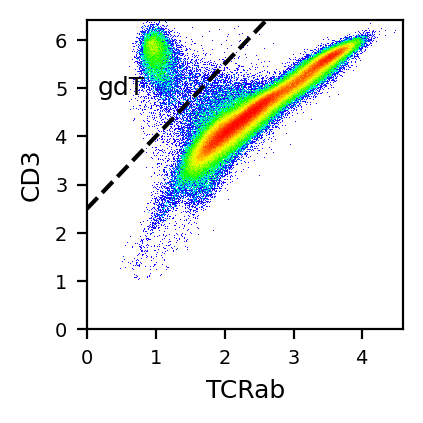

In [25]:
g1 = 'AB_TCRab'
g2 = 'AB_CD3'
g3 = 'AB_TCRab'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_prot=='Unclassified', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)

b= 2.5
m = 1.5
ind = (y > (x*m)+b)
# labels_prot.loc[ind.index[ind]] = 'gdT'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([0.05, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)
xspan = np.linspace(0, 4, 2)
yspan = xspan*m + b
ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.plot(xspan, yspan, linestyle='--', color='k')
ax.set_xlim([0, xlim[1]])
ax.set_ylim([0, ylim[1]])
ax.text(0.5, 5, 'gdT', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_GDT.png'))

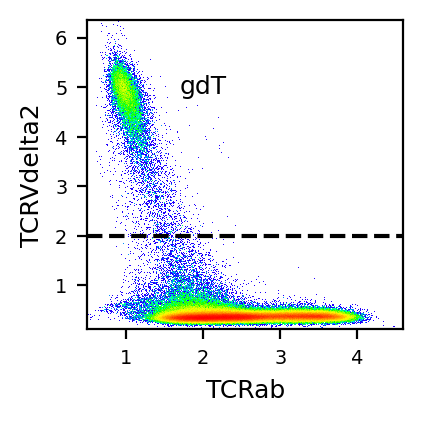

In [36]:
g1 = 'AB_TCRab'
g2 = 'AB_TCRVdelta2'
g3 = 'AB_TCRab'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_prot=='Unclassified', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)

ythresh = 2
ind = (y > ythresh)
labels_prot.loc[ind.index[ind]] = 'gdT'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([0.05, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)
# xspan = np.linspace(0, 4, 2)
# yspan = xspan*m + b

ylim = ax.get_ylim()
xlim = ax.get_xlim()

ax.plot([xlim[0], xlim[1]], [ythresh, ythresh], linestyle='--', color='k')
ax.set_xlim([xlim[0], xlim[1]])
ax.set_ylim([ylim[0], ylim[1]])
ax.text(2, 5, 'gdT', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_GDT.png'))

In [37]:
labels_prot.value_counts()

Unclassified    322285
gdT              14454
dtype: int64

In [38]:
labels_orig.value_counts()

Unclassified    336739
dtype: int64

In [39]:
labels_orig = labels_prot.copy()
labels_prot.value_counts()

Unclassified    322285
gdT              14454
dtype: int64

In [40]:
labels_prot = labels_orig.copy()

In [41]:
sorted(markers_magic.columns)

['AB_ArmenianHamsterIgGiso',
 'AB_CD101',
 'AB_CD103',
 'AB_CD105',
 'AB_CD107a',
 'AB_CD112',
 'AB_CD119',
 'AB_CD11a',
 'AB_CD11b',
 'AB_CD11c',
 'AB_CD122',
 'AB_CD123',
 'AB_CD124',
 'AB_CD127',
 'AB_CD13',
 'AB_CD134',
 'AB_CD137',
 'AB_CD14',
 'AB_CD141',
 'AB_CD146',
 'AB_CD152',
 'AB_CD154',
 'AB_CD155',
 'AB_CD158',
 'AB_CD158b',
 'AB_CD158e1',
 'AB_CD16',
 'AB_CD161',
 'AB_CD163',
 'AB_CD169',
 'AB_CD18',
 'AB_CD183',
 'AB_CD185',
 'AB_CD19',
 'AB_CD194',
 'AB_CD195',
 'AB_CD196',
 'AB_CD1c',
 'AB_CD1d',
 'AB_CD2',
 'AB_CD20',
 'AB_CD21',
 'AB_CD22',
 'AB_CD223',
 'AB_CD224',
 'AB_CD226',
 'AB_CD23',
 'AB_CD24',
 'AB_CD244',
 'AB_CD25',
 'AB_CD26',
 'AB_CD267',
 'AB_CD268',
 'AB_CD27',
 'AB_CD270',
 'AB_CD272',
 'AB_CD274',
 'AB_CD278',
 'AB_CD279',
 'AB_CD28',
 'AB_CD29',
 'AB_CD3',
 'AB_CD303',
 'AB_CD31',
 'AB_CD314',
 'AB_CD319',
 'AB_CD32',
 'AB_CD328',
 'AB_CD33',
 'AB_CD335',
 'AB_CD35',
 'AB_CD352',
 'AB_CD36',
 'AB_CD38',
 'AB_CD39',
 'AB_CD4',
 'AB_CD40',
 'AB_CD41'

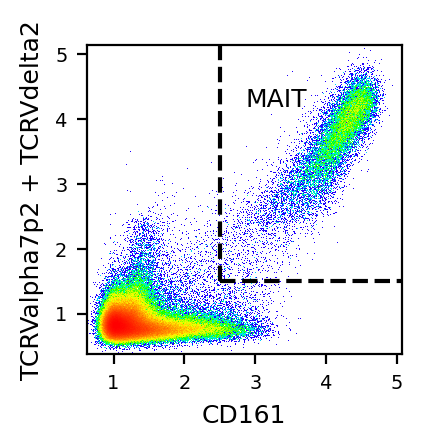

In [49]:
g1 = 'AB_CD161'
g2 = 'AB_TCRValpha7p2'
g2_2 = 'AB_TCRVdelta2'
g3 = 'AB_CD161'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_prot=='Unclassified', :].copy()

xthresh = 2.5
ythresh = 1.5
x = dat[g1]
y = dat[g2] + dat[g2_2]
z = dat[g3]
vmax = z.quantile(.995)
ind = (x>xthresh) & (y>ythresh)
labels_prot.loc[ind.index[ind]] = 'MAIT'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', '') + ' + ' + g2_2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.3, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

ylim = ax.get_ylim()
xlim = ax.get_xlim()


xspan = np.linspace(xthresh, xlim[1], 2)
yspan = np.linspace(ythresh, 13, 2)
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')

ax.set_xlim([xlim[0], xlim[1]])
ax.set_ylim([ylim[0], ylim[1]])



ax.text(3.3, 4.3, 'MAIT', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)

# plt.savefig(os.path.join(figdir, 'Gating_MAIT.png'))



In [50]:
labels_prot.value_counts()

Unclassified    303339
MAIT             18946
gdT              14454
dtype: int64

In [51]:
labels_orig = labels_prot.copy()
labels_prot.value_counts()

Unclassified    303339
MAIT             18946
gdT              14454
dtype: int64

In [ ]:
markers_magic.columns

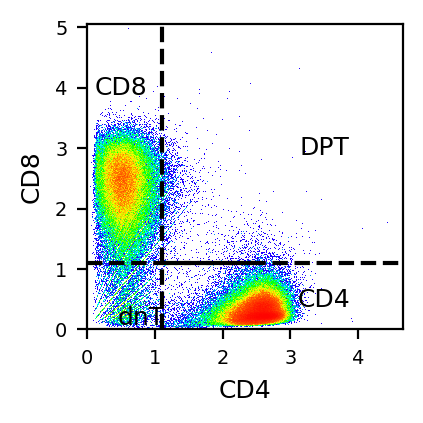

In [53]:
g1 = 'AB_CD4'
g2 = 'AB_CD8'
g3 = 'AB_CD3'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_prot=='Unclassified', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)

xthresh = 1.1
ythresh = 1.1
# ind = (x>xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'DPT'
# ind = (x>xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD4'
# ind = (x<xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8'
# ind = (x<xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'dnT'
           
fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.7, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)



ylim = ax.get_ylim()
xlim = ax.get_xlim()

xspan = np.linspace(xthresh, xlim[1], 2)
yspan= np.linspace(0, ythresh, 2)
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')

xspan = np.linspace(xlim[0], 2.5, 2)
yspan= np.linspace(ythresh, ylim[1], 2)
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')

ax.text(3.5, 3, 'DPT', fontsize=labfontsize, va='center', ha='center')
ax.text(3.5, 0.5, 'CD4', fontsize=labfontsize, va='center', ha='center')
ax.text(0.5, 4, 'CD8', fontsize=labfontsize, va='center', ha='center')
ax.text(.8, .2, 'dnT', fontsize=labfontsize, va='center', ha='center')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4andCD8.png'))

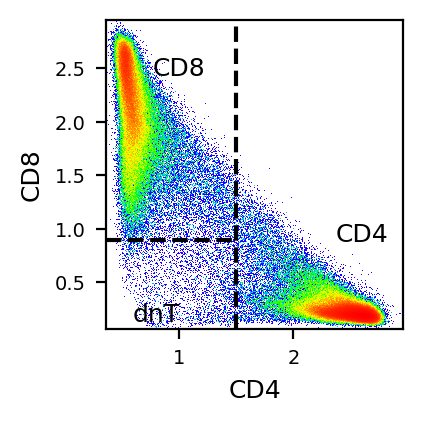

In [62]:
g1 = 'AB_CD4'
g2 = 'AB_CD8'
g3 = 'AB_CD3'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_prot=='Unclassified', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)

xthresh = 1.5
ythresh = .9
ind = (x>xthresh)
labels_prot.loc[ind.index[ind]] = 'CD4'
ind = (x<xthresh) & (y>ythresh)
labels_prot.loc[ind.index[ind]] = 'CD8'
ind = (x<xthresh) & (y<ythresh)
labels_prot.loc[ind.index[ind]] = 'dnT'
           
fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.7, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)



ylim = ax.get_ylim()
xlim = ax.get_xlim()

# xspan = np.linspace(xlim[0], 2.5, 2)
# yspan= np.linspace(ythresh, ylim[1], 2)
ax.plot([xlim[0], xthresh], [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], [ylim[0], ylim[1]], linestyle='--', color='k')

ax.text(2.6, .95, 'CD4', fontsize=labfontsize, va='center', ha='center')
ax.text(1, 2.5, 'CD8', fontsize=labfontsize, va='center', ha='center')
ax.text(.8, .2, 'dnT', fontsize=labfontsize, va='center', ha='center')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4andCD8.png'))

In [63]:
labels_orig = labels_prot.copy()
labels_prot.value_counts()

CD4     207374
CD8      92549
MAIT     18946
gdT      14454
dnT       3416
dtype: int64

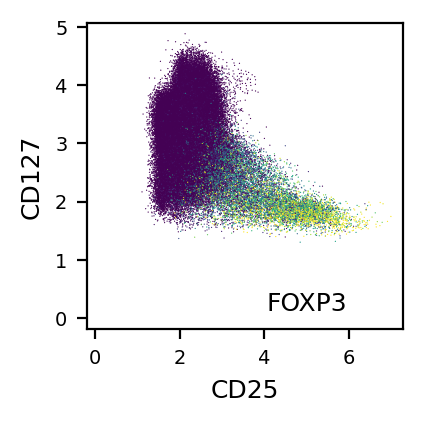

In [66]:
g1 = 'AB_CD25'
g2 = 'AB_CD127'
g3 = 'FOXP3'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_prot=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)
b=3
m = -2
xspan = np.linspace(-.2, 3, 2)
yspan = xspan*m + b

# ind = y > (x*m)+b 
# labels.loc[ind.index[ind]] = 'Treg'

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

# dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
scim = ax.scatter(x,y, edgecolor='None', s=.2, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([0.1, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)


ylim = ax.get_ylim()
xlim = ax.get_xlim()
# ax.plot(xspan, yspan, linestyle='--', color='k')
ax.set_xlim([-.2, xlim[1]])
ax.set_ylim([-.2, ylim[1]])
ax.text(5, .25, g3, fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_Treg.png'))

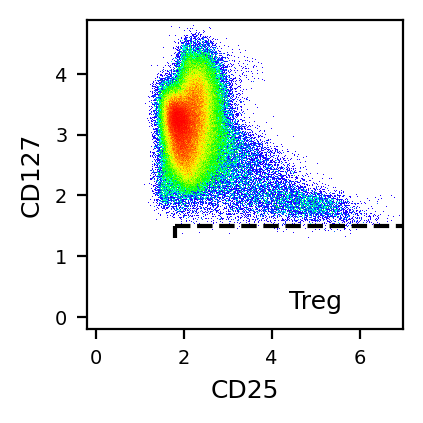

In [67]:
g1 = 'AB_CD25'
g2 = 'AB_CD127'
g3 = 'AB_CD25'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_prot=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)
# b=3
# m = -2
xthresh = 1.8
ythresh= 1.5

ind = (x>xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'Treg'

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([0.1, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)


ylim = ax.get_ylim()
xlim = ax.get_xlim()

ax.plot([xthresh, xthresh], [ylim[0], ythresh], linestyle='--', color='k')
ax.plot([xthresh, xlim[1]], [ythresh, ythresh], linestyle='--', color='k')

ax.set_xlim([-.2, xlim[1]])
ax.set_ylim([-.2, ylim[1]])
ax.text(5, .25, 'Treg', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_Treg.png'))

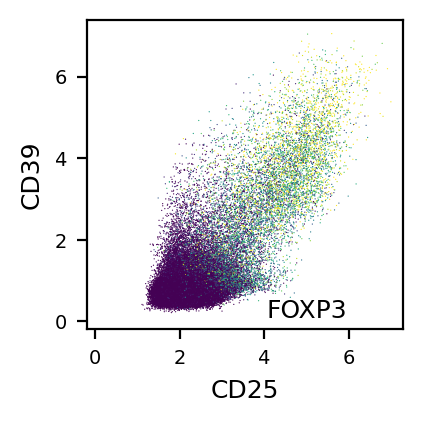

In [69]:
g1 = 'AB_CD25'
g2 = 'AB_CD39'
g3 = 'FOXP3'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_prot=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)
b=3
m = -2
xspan = np.linspace(-.2, 3, 2)
yspan = xspan*m + b

# ind = y > (x*m)+b 
# labels.loc[ind.index[ind]] = 'Treg'

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

# dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
scim = ax.scatter(x,y, edgecolor='None', s=.2, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([0.1, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)


ylim = ax.get_ylim()
xlim = ax.get_xlim()
# ax.plot(xspan, yspan, linestyle='--', color='k')
ax.set_xlim([-.2, xlim[1]])
ax.set_ylim([-.2, ylim[1]])
ax.text(5, .25, g3, fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_Treg.png'))

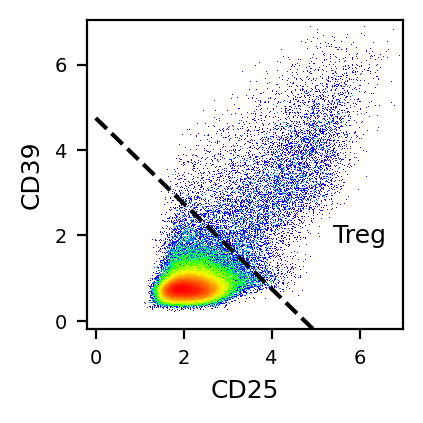

In [77]:
g1 = 'AB_CD25'
g2 = 'AB_CD39'
g3 = 'AB_CD25'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_prot=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)


b= 4.75
m = -1
xspan = np.linspace(0, 15, 2)
yspan = xspan*m + b
ind = y > m*x + b
labels_prot.loc[ind.index[ind]] = 'Treg'

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([0.1, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)


ylim = ax.get_ylim()
xlim = ax.get_xlim()

ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.plot([xthresh, xlim[1]], [ythresh, ythresh], linestyle='--', color='k')

ax.set_xlim([-.2, xlim[1]])
ax.set_ylim([-.2, ylim[1]])
ax.text(6, 2, 'Treg', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_Treg.png'))

In [78]:
labels_orig = labels_prot.copy()
labels_prot.value_counts()

CD4     198806
CD8      92549
MAIT     18946
gdT      14454
Treg      8568
dnT       3416
dtype: int64

In [79]:
labels_orig = labels_prot.copy()

In [80]:
labels_prot = labels_orig.copy()

In [81]:
labels_orig.value_counts()

CD4     198806
CD8      92549
MAIT     18946
gdT      14454
Treg      8568
dnT       3416
dtype: int64

### CD4 gating

In [ ]:
# # Gate based on protein/RNA markers
# labels_ccr7 = labels_orig.copy()
# labels_cd62l = labels_orig.copy()
# labels_sell = labels_orig.copy()
# labels_ccr7_prot = labels_orig.copy()

In [ ]:
# labels_ccr7_prot[labels_ccr7_prot.str.contains('CD4')] = 'CD4'

In [82]:
labels_prot = labels_orig.copy()

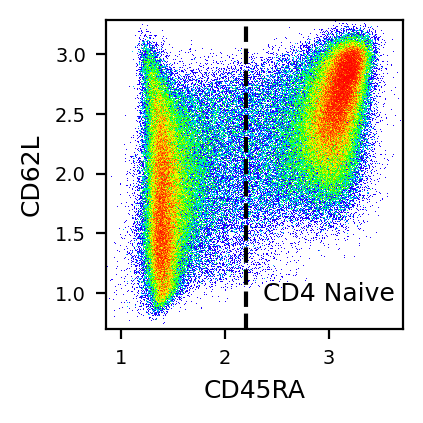

In [89]:
g1 = 'AB_CD45RA'
g2 = 'AB_CD62L'
g3 =  'AB_CD45RO'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_prot=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)


xthresh = 2.2
ythresh = 1.1
ind = (x>xthresh)
labels_prot.loc[ind.index[ind]] = 'CD4 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD4 TEMRA'




fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]#2.2
xmax = xlim[1]



# ax.plot([xthresh, xmax], [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')

# yspan= np.linspace(ythresh, ymax, 2)
# ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
ax.text(3, 1, 'CD4 Naive', fontsize=labfontsize, va='center', ha='center')
# ax.text(3, 1.65, 'CD4 TEMRA', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 5.5, 'CD4 TCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 2, 'CD4 TEM', fontsize=labfontsize, va='center', ha='center')



ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4naiveMem.png'))


In [ ]:
len(adata_ADT.var.index)

In [ ]:
labels_prot.value_counts()

In [83]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


In [ ]:
# g1 = 'AB_CD62L'
# g2 = 'AB_CD197_CCR7'
# g3 = 'CD4_CM-1'
# s=0.1
# labfontsize=9
# ticklabfontsize=7
# cbarlab_fs = 8
# dat = markers_magic.loc[labels_prot=='CD4', :].copy()
# x = dat[g1]
# y = dat[g2]
# z = tcat_filt.loc[dat.index, g3]
# y_trans = (y+1e-3).apply(np.log10)

# vmax = z.quantile(.995)

# b=0.6
# m = -.11
# ind = (y_trans > (x*m)+b)

# # labels_prot.loc[ind.index[ind]] = 'CD4 TCM'
# # labels_prot.loc[ind.index[~ind]] = 'CD4 TEM'

# fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
# gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
#                        bottom=.2, right=.95, top=.92)
# ax = fig.add_subplot(gs[0])

# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
# # dsshow(pd.DataFrame({'x':x, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
# ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.5, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

# xspan = np.linspace(0, 4, 2)
# yspan = xspan*m + b


# # xmin = -.4
# ylim = ax.get_ylim()
# xlim = ax.get_xlim()

# # xspan = np.linspace(xmin, xlim[1], 2)
# # yspan = xspan*m + b
# # ax.plot([xlim[0], xlim[1]], [ythresh, ythresh], linestyle='--', color='k')
# # ax.plot([xthresh, xthresh], [ylim[0], ylim[1]], linestyle='--', color='k')
# # ax.plot(xspan, yspan, linestyle='--', color='k')
# # ax.set_xlim([xmin, xlim[1]])
# # ax.set_ylim([ylim[0], ylim[1]])
# ax.tick_params(labelsize=ticklabfontsize)

# # ax.text(2.4, 0.65, 'CD4\nTCM', fontsize=labfontsize, va='center', ha='center')
# # ax.text(1, 0.25, 'CD4\nTEM', fontsize=labfontsize, va='center', ha='center')

# # plt.savefig(os.path.join(figdir, 'Gating_CD4EM.png'))

In [ ]:
# g1 = 'AB_CD62L'
# g2 = 'AB_CD197_CCR7'
# g3 = 'Effector_Memory'
# s=0.1
# labfontsize=9
# ticklabfontsize=7
# cbarlab_fs = 8
# dat = markers_magic.loc[labels_prot=='CD4', :].copy()
# x = dat[g1]
# y = dat[g2]
# z = tcat_filt.loc[dat.index, g3]
# y_trans = (y+1e-3).apply(np.log10)

# vmax = z.quantile(.9)

# b=1.4
# m = -.7
# ind = (y_trans > (x*m)+b)

# # labels_prot.loc[ind.index[ind]] = 'CD4 TCM'
# # labels_prot.loc[ind.index[~ind]] = 'CD4 TEM'

# fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
# gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
#                        bottom=.2, right=.95, top=.92)
# ax = fig.add_subplot(gs[0])

# scim = ax.scatter(x,y_trans, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
# # dsshow(pd.DataFrame({'x':x, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
# ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.5, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

# xspan = np.linspace(0, 4, 2)
# yspan = xspan*m + b


# # xmin = -.4
# ylim = ax.get_ylim()
# xlim = ax.get_xlim()

# # xspan = np.linspace(xmin, xlim[1], 2)
# # yspan = xspan*m + b
# ax.plot(xspan, yspan, linestyle='--', color='k')
# # ax.plot([xthresh, xthresh], [ylim[0], ylim[1]], linestyle='--', color='k')
# # ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
# ax.tick_params(labelsize=ticklabfontsize)

# # ax.text(2.4, 0.65, 'CD4\nTCM', fontsize=labfontsize, va='center', ha='center')
# # ax.text(1, 0.25, 'CD4\nTEM', fontsize=labfontsize, va='center', ha='center')

# # plt.savefig(os.path.join(figdir, 'Gating_CD4EM.png'))

In [ ]:
# g1 = 'AB_CD62L'
# g2 = 'AB_CD197_CCR7'
# g3 = 'Th17'
# s=0.1
# labfontsize=9
# ticklabfontsize=7
# cbarlab_fs = 8
# dat = markers_magic.loc[labels_prot=='CD4', :].copy()
# x = dat[g1]
# y = dat[g2]
# z = tcat_filt.loc[dat.index, g3]
# y_trans = (y+1e-3).apply(np.log10)

# vmax = z.quantile(.99)

# b=0.6
# m = -.11
# ind = (y_trans > (x*m)+b)

# # labels_prot.loc[ind.index[ind]] = 'CD4 TCM'
# # labels_prot.loc[ind.index[~ind]] = 'CD4 TEM'

# fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
# gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
#                        bottom=.2, right=.95, top=.92)
# ax = fig.add_subplot(gs[0])

# scim = ax.scatter(x,y_trans, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
# # dsshow(pd.DataFrame({'x':x, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
# ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.5, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

# xspan = np.linspace(0, 4, 2)
# yspan = xspan*m + b


# # xmin = -.4
# ylim = ax.get_ylim()
# xlim = ax.get_xlim()

# # xspan = np.linspace(xmin, xlim[1], 2)
# # yspan = xspan*m + b
# # ax.plot([xlim[0], xlim[1]], [ythresh, ythresh], linestyle='--', color='k')
# # ax.plot([xthresh, xthresh], [ylim[0], ylim[1]], linestyle='--', color='k')
# # ax.plot(xspan, yspan, linestyle='--', color='k')
# # ax.set_xlim([xmin, xlim[1]])
# # ax.set_ylim([ylim[0], ylim[1]])
# ax.tick_params(labelsize=ticklabfontsize)

# # ax.text(2.4, 0.65, 'CD4\nTCM', fontsize=labfontsize, va='center', ha='center')
# # ax.text(1, 0.25, 'CD4\nTEM', fontsize=labfontsize, va='center', ha='center')

# # plt.savefig(os.path.join(figdir, 'Gating_CD4EM.png'))

In [ ]:
g1 = 'AB_CD62L'
g2 = 'AB_CD197_CCR7'
g3 = 'AB_CD27'

s=0.1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_prot=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)
y_trans = (y+1e-3).apply(np.log10)


xthresh = 2.2
ythresh = 1.2
# ind = (x>xthresh)
# labels_prot.loc[ind.index[ind]] = 'CD4 CD45RA+'
# ind = (x<xthresh)
# labels_prot.loc[ind.index[ind]] = 'CD4 CD45RA-'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

# dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
scim = ax.scatter(x,y_trans, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.14, .85, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]#2.2
xmax = xlim[1]



# ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')

# yspan= np.linspace(ythresh, ymax, 2)
# ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
# ax.text(3, 3.2, 'CD4 CD45RA+', fontsize=labfontsize, va='center', ha='center')
# # ax.text(3, 0.6, 'CD4 CD45RA-', fontsize=labfontsize, va='center', ha='center')
# # ax.text(1.4, 3.2, 'CD4 CD45RA-', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 0.6, 'CD4 CD45RA-', fontsize=labfontsize, va='center', ha='center')
# ax.set_xlim([2, xlim[1]])
# ax.set_ylim([0.5, ylim[1]])



ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4naiveMem.png'))


In [ ]:
# g1 = 'AB_CD62L'
# g2 = 'AB_CD197_CCR7'
# g3 = 'CD4_CM-1'
# s=0.1
# labfontsize=9
# ticklabfontsize=7
# cbarlab_fs = 8


# dat = markers_magic.loc[labels_prot=='CD4', :].copy()
# x = dat[g1]
# y = dat[g2]

# ind = set(dat.index).intersection(cmem_labels.index)
# z = pd.Series('', index = dat.index)
# z[ind] = cmem_labels.loc[ind, 'state']

# # Unique category labels
# color_labels = z.unique()

# # List of RGB triplets
# rgb_values = sns.color_palette()

# # Map label to RGB
# color_map = dict(zip(color_labels, rgb_values))


# y_trans = (y+1e-3).apply(np.log10)

# # vmax = z.quantile(.995)

# b=.75
# m = -0.175
# # ind = (y_trans > (x*m)+b)

# # labels_prot.loc[ind.index[ind]] = 'CD4 TCM'
# # labels_prot.loc[ind.index[~ind]] = 'CD4 TEM'

# fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
# gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
#                        bottom=.2, right=.95, top=.92)
# ax = fig.add_subplot(gs[0])

# scim = ax.scatter(x,y_trans, edgecolor='None', s=s, 
#                   c=z.map(color_map), vmin=0, vmax=vmax)
# # dsshow(pd.DataFrame({'x':x, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
# ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# # cbar_ax = ax.inset_axes([.5, .85, 0.15, 0.04], transform=ax.transAxes, )
# # fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# # cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
# # cbar_ax.set_xticks([0, vmax])
# # cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)


# ylim = ax.get_ylim()
# xlim = ax.get_xlim()

# xspan = np.linspace(0, 4, 2)
# yspan = xspan*m + b


# # xmin = -.4

# ax.plot(xspan, yspan, linestyle='--', color='k')
# # ax.plot([xthresh, xthresh], [ylim[0], ylim[1]], linestyle='--', color='k')
# # ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.set_xlim([xlim[0], xlim[1]])
# ax.set_ylim([ylim[0], ylim[1]])
# ax.tick_params(labelsize=ticklabfontsize)

# handles_list = []
# for k,v in color_map.items():
#     handles_list.append(mpatches.Patch(color=v, label=k))
# ax.legend(handles=handles_list, loc = 'lower right', fontsize = '3')

# # ax.text(2.4, 0.65, 'CD4\nTCM', fontsize=labfontsize, va='center', ha='center')
# # ax.text(1, 0.25, 'CD4\nTEM', fontsize=labfontsize, va='center', ha='center')

# # plt.savefig(os.path.join(figdir, 'Gating_CD4EM.png'))

Text(1, -0.2, 'CD4\nTEM')

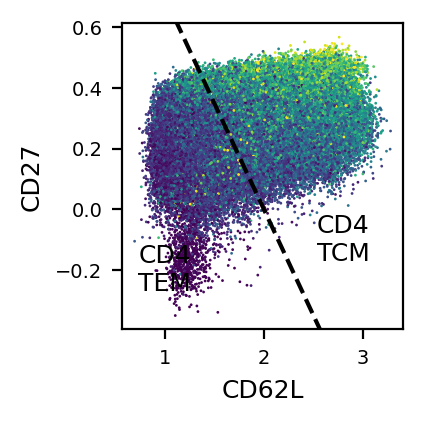

In [99]:
g1 = 'AB_CD62L'
g2 = 'AB_CD27'
g3 = 'CCR7'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_prot=='CD4', :].copy()
x = dat[g1]
y = dat[g2]
z = dat[g3]
y_trans = (y+1e-3).apply(np.log10)

vmax = z.quantile(.995)

b=1.4
m = -.7
ind = (y_trans > (x*m)+b)

# labels_prot.loc[ind.index[ind]] = 'CD4 TCM'
# labels_prot.loc[ind.index[~ind]] = 'CD4 TEM'

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

scim = ax.scatter(x,y_trans, edgecolor='None', s=s, 
                  c=z, vmin=0, vmax=vmax)

# dsshow(pd.DataFrame({'x':x, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)

# xspan = np.linspace(0, 4, 2)
# yspan = xspan*m + b


# xmin = -.4
ylim = ax.get_ylim()
xlim = ax.get_xlim()

# xspan = np.linspace(xmin, xlim[1], 2)
# yspan = xspan*m + b
# ax.plot([xlim[0], xlim[1]], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ylim[0], ylim[1]], linestyle='--', color='k')
ax.plot(xspan, yspan, linestyle='--', color='k')
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.tick_params(labelsize=ticklabfontsize)

ax.text(2.8, -.1, 'CD4\nTCM', fontsize=labfontsize, va='center', ha='center')
ax.text(1, -.2, 'CD4\nTEM', fontsize=labfontsize, va='center', ha='center')

# plt.savefig(os.path.join(figdir, 'Gating_CD4EM.png'))

Text(1, -0.2, 'CD4\nTEM')

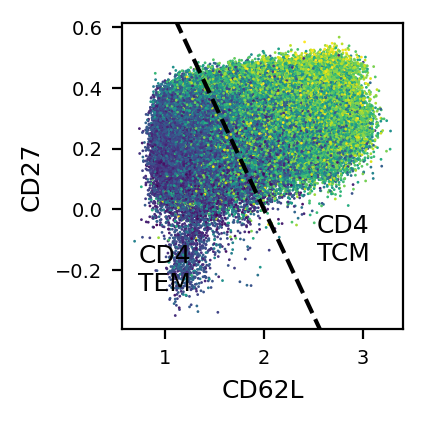

In [98]:
g1 = 'AB_CD62L'
g2 = 'AB_CD27'
g3 = 'SELL'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_prot=='CD4', :].copy()
x = dat[g1]
y = dat[g2]
z = dat[g3]
y_trans = (y+1e-3).apply(np.log10)

vmax = z.quantile(.995)

b=1.4
m = -.7
ind = (y_trans > (x*m)+b)

# labels_prot.loc[ind.index[ind]] = 'CD4 TCM'
# labels_prot.loc[ind.index[~ind]] = 'CD4 TEM'

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

scim = ax.scatter(x,y_trans, edgecolor='None', s=s, 
                  c=z, vmin=0, vmax=vmax)

# dsshow(pd.DataFrame({'x':x, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)

# xspan = np.linspace(0, 4, 2)
# yspan = xspan*m + b


# xmin = -.4
ylim = ax.get_ylim()
xlim = ax.get_xlim()

# xspan = np.linspace(xmin, xlim[1], 2)
# yspan = xspan*m + b
# ax.plot([xlim[0], xlim[1]], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ylim[0], ylim[1]], linestyle='--', color='k')
ax.plot(xspan, yspan, linestyle='--', color='k')
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.tick_params(labelsize=ticklabfontsize)

ax.text(2.8, -.1, 'CD4\nTCM', fontsize=labfontsize, va='center', ha='center')
ax.text(1, -.2, 'CD4\nTEM', fontsize=labfontsize, va='center', ha='center')

# plt.savefig(os.path.join(figdir, 'Gating_CD4EM.png'))

Text(1, -0.2, 'CD4\nTEM')

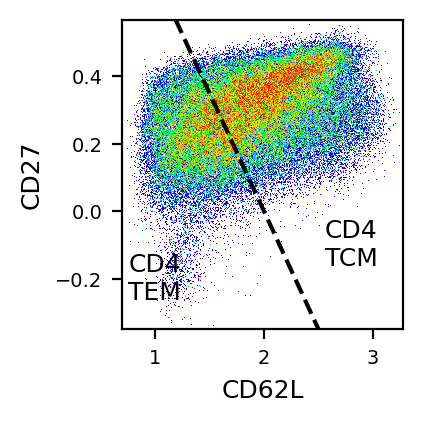

In [100]:
g1 = 'AB_CD62L'
g2 = 'AB_CD27'
g3 = 'AB_CD27'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_prot=='CD4', :].copy()
x = dat[g1]
y = dat[g2]
z = dat[g3]
y_trans = (y+1e-3).apply(np.log10)

vmax = z.quantile(.995)

b=1.4
m = -.7
ind = (y_trans > (x*m)+b)

labels_prot.loc[ind.index[ind]] = 'CD4 TCM'
labels_prot.loc[ind.index[~ind]] = 'CD4 TEM'

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)

xspan = np.linspace(0, 4, 2)
yspan = xspan*m + b


# xmin = -.4
ylim = ax.get_ylim()
xlim = ax.get_xlim()

# xspan = np.linspace(xmin, xlim[1], 2)
# yspan = xspan*m + b
# ax.plot([xlim[0], xlim[1]], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ylim[0], ylim[1]], linestyle='--', color='k')
ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xlim[1]])
# ax.set_ylim([ylim[0], ylim[1]])
ax.tick_params(labelsize=ticklabfontsize)

ax.text(2.8, -.1, 'CD4\nTCM', fontsize=labfontsize, va='center', ha='center')
ax.text(1, -.2, 'CD4\nTEM', fontsize=labfontsize, va='center', ha='center')

# plt.savefig(os.path.join(figdir, 'Gating_CD4EM.png'))

In [ ]:
labels_prot.value_counts()

In [102]:
labels_prot.value_counts()

CD4 Naive    104484
CD8           92549
CD4 TCM       61119
CD4 TEM       33203
MAIT          18946
gdT           14454
Treg           8568
dnT            3416
dtype: int64

In [103]:
labels_orig = labels_prot.copy()
labels_prot.value_counts()

CD4 Naive    104484
CD8           92549
CD4 TCM       61119
CD4 TEM       33203
MAIT          18946
gdT           14454
Treg           8568
dnT            3416
dtype: int64

In [104]:
labels_orig = labels_prot.copy()

In [105]:
labels_prot = labels_orig.copy()
labels_prot.value_counts()

CD4 Naive    104484
CD8           92549
CD4 TCM       61119
CD4 TEM       33203
MAIT          18946
gdT           14454
Treg           8568
dnT            3416
dtype: int64

In [ ]:
markers_magic.columns

In [ ]:
labels_prot.value_counts()

### CD8 gating

In [ ]:
# labels_ccr7_prot[labels_ccr7_prot.str.contains('CD8')] = 'CD8'

# labels_cd62l[labels_cd62l.str.contains('CD8')] = 'CD8'

# labels_sell[labels_sell.str.contains('CD8')] = 'CD8'

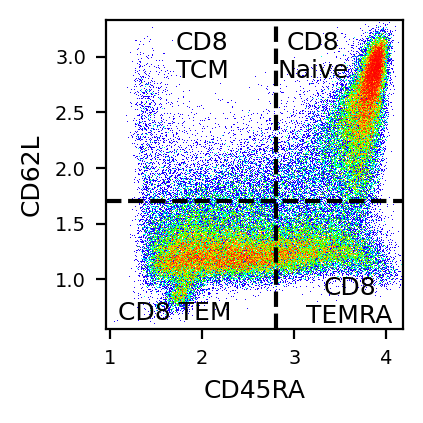

In [130]:
g1 = 'AB_CD45RA'
g2 = 'AB_CD62L'
g3 = 'AB_CD45RO'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_prot=='CD8', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)


xthresh=2.8
ythresh=1.7
ind = (x>xthresh) & (y>ythresh)
labels_prot.loc[ind.index[ind]] = 'CD8 Naive'
ind = (x>xthresh) & (y<ythresh)
labels_prot.loc[ind.index[ind]] = 'CD8 TEMRA'
ind = (x<xthresh) & (y>ythresh)
labels_prot.loc[ind.index[ind]] = 'CD8 TCM'
ind = (x<xthresh) & (y<ythresh)
labels_prot.loc[ind.index[ind]] = 'CD8 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]
xmax = xlim[1]

xspan = np.linspace(xthresh, xmax, 2)
yspan= np.linspace(ymin, ymax, 2)
ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')
# ax.set_xlim(xlim)
ax.text(3.2, 3, 'CD8\nNaive', fontsize=labfontsize, va='center', ha='center')
ax.text(3.6, .8, 'CD8\nTEMRA', fontsize=labfontsize, va='center', ha='center')
ax.text(2, 3, 'CD8\nTCM', fontsize=labfontsize, va='center', ha='center')
ax.text(1.7, 0.7, 'CD8 TEM', fontsize=labfontsize, va='center', ha='center')

# ax.set_xlim([0, xmax])
# ax.set_ylim([ymin, ymax])

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD8NaiveMem.png'))

In [135]:
labels_prot.isin(['CD8 TCM', 'CD8 TEM'])

Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1    False
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1    False
Batch1_COVFLU_CITE_multi5P02_GATGCTACAGCTTAAC-1    False
Batch1_COVFLU_CITE_multi5P03_AGGGTGACATTAGGCT-1    False
Batch1_COVFLU_CITE_multi5P10_GAACCTACAACGCACC-1    False
                                                   ...  
Batch3_COVFLU_CITE_multi5P16_TTCGAAGGTCTCTTTA-1    False
Batch3_COVFLU_CITE_multi5P09_CTCGTACGTAGGACAC-1    False
Batch3_COVFLU_CITE_multi5P09_ACGGCCACAAGAAGAG-1    False
Batch3_COVFLU_CITE_multi5P07_GAGTCCGCACACAGAG-1    False
Batch3_COVFLU_CITE_multi5P09_AAGGCAGTCGCGTTTC-1    False
Length: 336739, dtype: bool

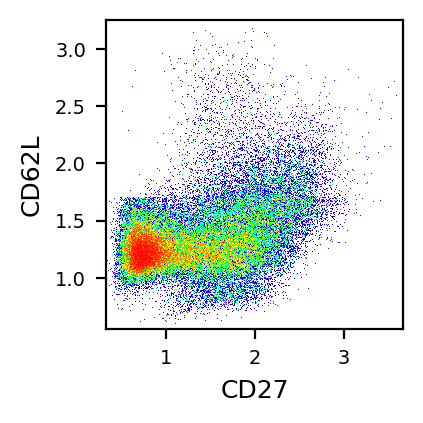

In [142]:
g1 = 'AB_CD27'
g2 = 'AB_CD62L'
g3 = 'AB_CD45RA'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_prot.isin(['CD8 TCM', 'CD8 TEM', 'CD8 TEMRA']), :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)


xthresh=2.8
ythresh=1.7
# ind = (x>xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TEMRA'
# ind = (x<xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TCM'
# ind = (x<xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]
xmax = xlim[1]

xspan = np.linspace(xthresh, xmax, 2)
yspan= np.linspace(ymin, ymax, 2)
# ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')
# # ax.set_xlim(xlim)
# ax.text(3.2, 3, 'CD8\nNaive', fontsize=labfontsize, va='center', ha='center')
# ax.text(3.6, .8, 'CD8\nTEMRA', fontsize=labfontsize, va='center', ha='center')
# ax.text(2, 3, 'CD8\nTCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.7, 0.7, 'CD8 TEM', fontsize=labfontsize, va='center', ha='center')

# ax.set_xlim([0, xmax])
# ax.set_ylim([ymin, ymax])

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD8NaiveMem.png'))

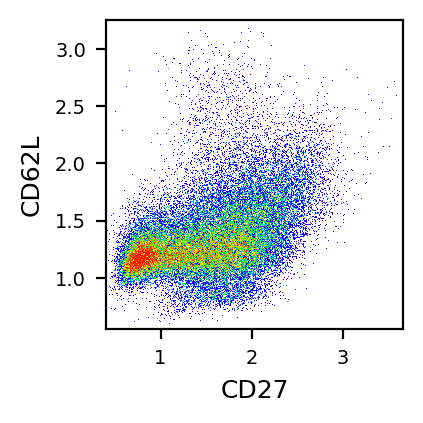

In [136]:
g1 = 'AB_CD27'
g2 = 'AB_CD62L'
g3 = 'AB_CD45RA'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_prot.isin(['CD8 TCM', 'CD8 TEM']), :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)


xthresh=2.8
ythresh=1.7
# ind = (x>xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TEMRA'
# ind = (x<xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TCM'
# ind = (x<xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]
xmax = xlim[1]

xspan = np.linspace(xthresh, xmax, 2)
yspan= np.linspace(ymin, ymax, 2)
# ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')
# # ax.set_xlim(xlim)
# ax.text(3.2, 3, 'CD8\nNaive', fontsize=labfontsize, va='center', ha='center')
# ax.text(3.6, .8, 'CD8\nTEMRA', fontsize=labfontsize, va='center', ha='center')
# ax.text(2, 3, 'CD8\nTCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.7, 0.7, 'CD8 TEM', fontsize=labfontsize, va='center', ha='center')

# ax.set_xlim([0, xmax])
# ax.set_ylim([ymin, ymax])

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD8NaiveMem.png'))

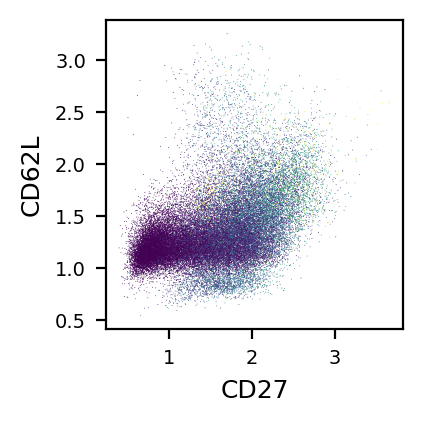

In [140]:
g1 = 'AB_CD27'
g2 = 'AB_CD62L'
g3 = 'CCR7'

s=.1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_prot.isin(['CD8 TCM', 'CD8 TEM']), :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)


xthresh=2.8
ythresh=1.7
# ind = (x>xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TEMRA'
# ind = (x<xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TCM'
# ind = (x<xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

# dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]
xmax = xlim[1]

xspan = np.linspace(xthresh, xmax, 2)
yspan= np.linspace(ymin, ymax, 2)
# ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')
# # ax.set_xlim(xlim)
# ax.text(3.2, 3, 'CD8\nNaive', fontsize=labfontsize, va='center', ha='center')
# ax.text(3.6, .8, 'CD8\nTEMRA', fontsize=labfontsize, va='center', ha='center')
# ax.text(2, 3, 'CD8\nTCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.7, 0.7, 'CD8 TEM', fontsize=labfontsize, va='center', ha='center')

# ax.set_xlim([0, xmax])
# ax.set_ylim([ymin, ymax])

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD8NaiveMem.png'))

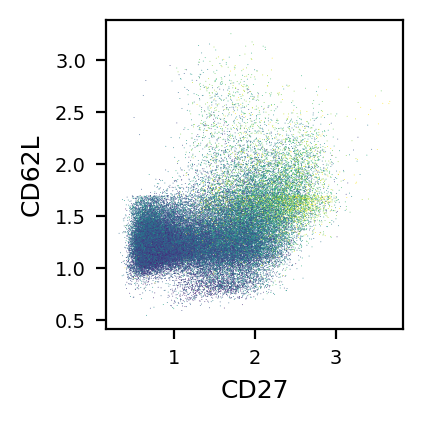

In [143]:
g1 = 'AB_CD27'
g2 = 'AB_CD62L'
g3 = 'SELL'

s=.1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_prot.isin(['CD8 TCM', 'CD8 TEM', 'CD8 TEMRA']), :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)


xthresh=2.8
ythresh=1.7
# ind = (x>xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TEMRA'
# ind = (x<xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TCM'
# ind = (x<xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

# dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]
xmax = xlim[1]

xspan = np.linspace(xthresh, xmax, 2)
yspan= np.linspace(ymin, ymax, 2)
# ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')
# # ax.set_xlim(xlim)
# ax.text(3.2, 3, 'CD8\nNaive', fontsize=labfontsize, va='center', ha='center')
# ax.text(3.6, .8, 'CD8\nTEMRA', fontsize=labfontsize, va='center', ha='center')
# ax.text(2, 3, 'CD8\nTCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.7, 0.7, 'CD8 TEM', fontsize=labfontsize, va='center', ha='center')

# ax.set_xlim([0, xmax])
# ax.set_ylim([ymin, ymax])

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD8NaiveMem.png'))

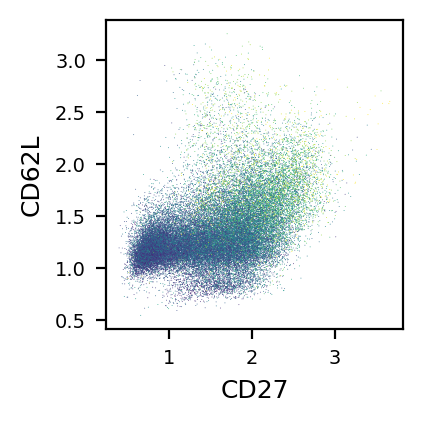

In [141]:
g1 = 'AB_CD27'
g2 = 'AB_CD62L'
g3 = 'SELL'

s=.1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_prot.isin(['CD8 TCM', 'CD8 TEM']), :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)


xthresh=2.8
ythresh=1.7
# ind = (x>xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TEMRA'
# ind = (x<xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TCM'
# ind = (x<xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

# dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]
xmax = xlim[1]

xspan = np.linspace(xthresh, xmax, 2)
yspan= np.linspace(ymin, ymax, 2)
# ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')
# # ax.set_xlim(xlim)
# ax.text(3.2, 3, 'CD8\nNaive', fontsize=labfontsize, va='center', ha='center')
# ax.text(3.6, .8, 'CD8\nTEMRA', fontsize=labfontsize, va='center', ha='center')
# ax.text(2, 3, 'CD8\nTCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.7, 0.7, 'CD8 TEM', fontsize=labfontsize, va='center', ha='center')

# ax.set_xlim([0, xmax])
# ax.set_ylim([ymin, ymax])

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD8NaiveMem.png'))

In [ ]:
# g1 = 'AB_CD45RA'
# g2 = 'AB_CD62L'
# g3 = 'AB_CD45RO'

# s=0.1
# labfontsize=9
# ticklabfontsize=7
# cbarlab_fs = 8
# dat = markers_magic.loc[labels_prot=='CD8', :].copy()
# ind = set(dat.index).intersection(cmem_labels.index)

# x = dat[g1]
# y = dat[g2]
# z = pd.Series('', index = dat.index)
# z[ind] = cmem_labels.loc[ind, 'state']

# # Unique category labels
# color_labels = z.unique()

# # List of RGB triplets
# rgb_values = sns.color_palette()

# # Map label to RGB
# color_map = dict(zip(color_labels, rgb_values))


# xthresh=2.7
# ythresh=1.35
# ind = (x>xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 Naive'
# # ind = (x>xthresh) & (y<ythresh)
# # labels_prot.loc[ind.index[ind]] = 'CD8 TEMRA'
# # ind = (x<xthresh) & (y>ythresh)
# # labels_prot.loc[ind.index[ind]] = 'CD8 TCM'
# # ind = (x<xthresh) & (y<ythresh)
# # labels_prot.loc[ind.index[ind]] = 'CD8 TEM'



# fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
# gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
#                        bottom=.2, right=.95, top=.92)
# ax = fig.add_subplot(gs[0])

# # dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z.map(color_map))
# ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
# ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# # cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# # fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# # cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# # cbar_ax.set_xticks([0, vmax])
# # cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

# xlim = ax.get_xlim()
# ylim = ax.get_ylim()

# ymin = ylim[0]
# ymax = ylim[1]
# xmin = xlim[0]
# xmax = xlim[1]

# xspan = np.linspace(xthresh, xmax, 2)
# yspan= np.linspace(ymin, ymax, 2)
# ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')
# # ax.set_xlim(xlim)
# ax.text(3.6, 2.8, 'CD8\nNaive', fontsize=labfontsize, va='center', ha='center')
# # ax.text(3.6, 0.7, 'CD8\nTEMRA', fontsize=labfontsize, va='center', ha='center')
# # ax.text(1.7, 2.8, 'CD8\nTCM', fontsize=labfontsize, va='center', ha='center')
# # ax.text(1.7, 0.6, 'CD8 TEM', fontsize=labfontsize, va='center', ha='center')

# handles_list = []
# for k,v in color_map.items():
#     if k not in ['' , 'DN', 'prolif', 'innate']:
#         handles_list.append(mpatches.Patch(color=v, label=k))
# ax.legend(handles=handles_list, loc = 'upper left', fontsize = '3')

# # ax.set_xlim([0, xmax])
# # ax.set_ylim([ymin, ymax])

# ax.tick_params(labelsize=ticklabfontsize)
# # plt.savefig(os.path.join(figdir, 'Gating_CD8NaiveMem.png'))

In [ ]:
# g1 = 'AB_CD45RA'
# g2 = 'AB_CD62L'
# g3 = 'AB_CD45RO'

# s=0.1
# labfontsize=9
# ticklabfontsize=7
# cbarlab_fs = 8
# dat = markers_magic.loc[labels_prot=='CD8', :].copy()
# ind = set(dat.index).intersection(cmem_labels.index)

# x = dat[g1]
# y = dat[g2]
# z = pd.Series('', index = dat.index)
# z[ind] = cmem_labels.loc[ind, 'state']

# # Unique category labels
# color_labels = z.unique()

# # List of RGB triplets
# rgb_values = sns.color_palette()

# # Map label to RGB
# color_map = dict(zip(color_labels, rgb_values))


# xthresh=2.7
# ythresh=1.35
# # ind = (x>xthresh) & (y>ythresh)
# # labels_prot.loc[ind.index[ind]] = 'CD8 Naive'
# # ind = (x>xthresh) & (y<ythresh)
# # labels_prot.loc[ind.index[ind]] = 'CD8 TEMRA'
# # ind = (x<xthresh) & (y>ythresh)
# # labels_prot.loc[ind.index[ind]] = 'CD8 TCM'
# # ind = (x<xthresh) & (y<ythresh)
# # labels_prot.loc[ind.index[ind]] = 'CD8 TEM'



# fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
# gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
#                        bottom=.2, right=.95, top=.92)
# ax = fig.add_subplot(gs[0])

# # dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z.map(color_map))
# ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
# ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# # cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# # fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# # cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# # cbar_ax.set_xticks([0, vmax])
# # cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

# xlim = ax.get_xlim()
# ylim = ax.get_ylim()

# ymin = ylim[0]
# ymax = ylim[1]
# xmin = xlim[0]
# xmax = xlim[1]

# xspan = np.linspace(xthresh, xmax, 2)
# yspan= np.linspace(ymin, ymax, 2)
# ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')
# # ax.set_xlim(xlim)
# # ax.text(3.6, 2.8, 'CD8\nNaive', fontsize=labfontsize, va='center', ha='center')
# # ax.text(3.6, 0.7, 'CD8\nTEMRA', fontsize=labfontsize, va='center', ha='center')
# # ax.text(1.7, 2.8, 'CD8\nTCM', fontsize=labfontsize, va='center', ha='center')
# # ax.text(1.7, 0.6, 'CD8 TEM', fontsize=labfontsize, va='center', ha='center')

# handles_list = []
# for k,v in color_map.items():
#     if k not in ['' , 'DN', 'prolif', 'innate']:
#         handles_list.append(mpatches.Patch(color=v, label=k))
# ax.legend(handles=handles_list, loc = 'upper left', fontsize = '3')

# # ax.set_xlim([0, xmax])
# # ax.set_ylim([ymin, ymax])

# ax.tick_params(labelsize=ticklabfontsize)
# # plt.savefig(os.path.join(figdir, 'Gating_CD8NaiveMem.png'))

In [ ]:
markers_magic.columns

In [ ]:
# g1 = 'AB_CD62L'
# g2 = 'AB_CD197_CCR7'
# # g3 = 'AB_CD45RO'

# s=0.1
# labfontsize=9
# ticklabfontsize=7
# cbarlab_fs = 8
# dat = markers_magic.loc[labels_prot=='CD8', :].copy()
# ind = set(dat.index).intersection(cmem_labels.index)

# x = dat[g1]
# y = dat[g2]
# y_trans = (y+1e-3).apply(np.log10)
# z = pd.Series('', index = dat.index)
# z[ind] = cmem_labels.loc[ind, 'state']

# # Unique category labels
# color_labels = z.unique()

# # List of RGB triplets
# rgb_values = sns.color_palette()

# # Map label to RGB
# color_map = dict(zip(color_labels, rgb_values))


# xthresh=2.7
# ythresh=1.35
# # ind = (x>xthresh) & (y>ythresh)
# # labels_prot.loc[ind.index[ind]] = 'CD8 Naive'
# # ind = (x>xthresh) & (y<ythresh)
# # labels_prot.loc[ind.index[ind]] = 'CD8 TEMRA'
# # ind = (x<xthresh) & (y>ythresh)
# # labels_prot.loc[ind.index[ind]] = 'CD8 TCM'
# # ind = (x<xthresh) & (y<ythresh)
# # labels_prot.loc[ind.index[ind]] = 'CD8 TEM'



# fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
# gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
#                        bottom=.2, right=.95, top=.92)
# ax = fig.add_subplot(gs[0])

# # dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y_trans, edgecolor='None', s=s, c=z.map(color_map))
# ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
# ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# # cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# # fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# # cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# # cbar_ax.set_xticks([0, vmax])
# # cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

# xlim = ax.get_xlim()
# ylim = ax.get_ylim()

# ymin = ylim[0]
# ymax = ylim[1]
# xmin = xlim[0]
# xmax = xlim[1]

# xspan = np.linspace(xthresh, xmax, 2)
# yspan= np.linspace(ymin, ymax, 2)
# # ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
# # ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')
# # ax.set_xlim(xlim)
# # ax.text(3.6, 2.8, 'CD8\nNaive', fontsize=labfontsize, va='center', ha='center')
# # ax.text(3.6, 0.7, 'CD8\nTEMRA', fontsize=labfontsize, va='center', ha='center')
# # ax.text(1.7, 2.8, 'CD8\nTCM', fontsize=labfontsize, va='center', ha='center')
# # ax.text(1.7, 0.6, 'CD8 TEM', fontsize=labfontsize, va='center', ha='center')

# handles_list = []
# for k,v in color_map.items():
#     if k not in ['' , 'DN', 'prolif', 'innate']:
#         handles_list.append(mpatches.Patch(color=v, label=k))
# ax.legend(handles=handles_list, loc = 'lower right', fontsize = '3')

# # ax.set_xlim([0, xmax])
# # ax.set_ylim([ymin, ymax])

# ax.tick_params(labelsize=ticklabfontsize)
# # plt.savefig(os.path.join(figdir, 'Gating_CD8NaiveMem.png'))

In [ ]:
# g1 = 'AB_CD62L'
# g2 = 'AB_CD27'
# # g3 = 'AB_CD45RO'

# s=0.1
# labfontsize=9
# ticklabfontsize=7
# cbarlab_fs = 8
# dat = markers_magic.loc[labels_prot=='CD8', :].copy()
# ind = set(dat.index).intersection(cmem_labels.index)

# x = dat[g1]
# y = dat[g2]
# y_trans = (y+1e-3).apply(np.log10)
# z = pd.Series('', index = dat.index)
# z[ind] = cmem_labels.loc[ind, 'state']

# # Unique category labels
# color_labels = z.unique()

# # List of RGB triplets
# rgb_values = sns.color_palette()

# # Map label to RGB
# color_map = dict(zip(color_labels, rgb_values))


# xthresh=2.7
# ythresh=-0.2
# # ind = (x>xthresh) & (y>ythresh)
# # labels_prot.loc[ind.index[ind]] = 'CD8 Naive'
# # ind = (x>xthresh) & (y<ythresh)
# # labels_prot.loc[ind.index[ind]] = 'CD8 TEMRA'
# ind = (y_trans>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TCM'
# ind = (y_trans<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TEM'


# fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
# gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
#                        bottom=.2, right=.95, top=.92)
# ax = fig.add_subplot(gs[0])

# # dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y_trans, edgecolor='None', s=s, c=z.map(color_map))
# ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
# ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# # cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# # fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# # cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# # cbar_ax.set_xticks([0, vmax])
# # cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

# xlim = ax.get_xlim()
# ylim = ax.get_ylim()

# ymin = ylim[0]
# ymax = ylim[1]
# xmin = xlim[0]
# xmax = xlim[1]

# xspan = np.linspace(xmin, xmax, 2)
# yspan= np.linspace(ymin, ymax, 2)
# ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
# # ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')
# # ax.set_xlim(xlim)
# # ax.text(3.6, 2.8, 'CD8\nNaive', fontsize=labfontsize, va='center', ha='center')
# # ax.text(3.6, 0.7, 'CD8\nTEMRA', fontsize=labfontsize, va='center', ha='center')
# ax.text(2.2, 0.4, 'CD8 TCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.7, -1.2, 'CD8 TEM', fontsize=labfontsize, va='center', ha='center')

# handles_list = []
# for k,v in color_map.items():
#     if k not in ['' , 'DN', 'prolif', 'innate']:
#         handles_list.append(mpatches.Patch(color=v, label=k))
# ax.legend(handles=handles_list, loc = 'lower right', fontsize = '3')

# # ax.set_xlim([0, xmax])
# # ax.set_ylim([ymin, ymax])

# ax.tick_params(labelsize=ticklabfontsize)
# # plt.savefig(os.path.join(figdir, 'Gating_CD8NaiveMem.png'))

In [131]:
labels_orig.value_counts()

CD4 Naive    104484
CD8           92549
CD4 TCM       61119
CD4 TEM       33203
MAIT          18946
gdT           14454
Treg           8568
dnT            3416
dtype: int64

In [ ]:
labels_orig = labels_prot.copy()
labels_prot.value_counts()

In [ ]:
labels_prot = labels_orig.copy()
labels_prot.value_counts()

In [159]:
outfn = '/data/srlab1/mcurtis/GSK/tcell_proliferation/TCellAnnotator/data/Sparks2023/Manual_Gating_MagicProtein_20230513.tsv'


In [160]:
labels_prot.to_csv(outfn, sep='\t')

In [158]:
labels_prot

CD4 Naive    104484
CD4 TCM       61119
CD8 TEM       36716
CD4 TEM       33203
CD8 Naive     32573
MAIT          18946
CD8 TEMRA     17509
gdT           14454
Treg           8568
CD8 TCM        5751
dnT            3416
dtype: int64

In [ ]:
labels_prot.value_counts()

CD4 Naive    104484
CD4 TCM       61119
CD8 TEM       36716
CD4 TEM       33203
CD8 Naive     32573
MAIT          18946
CD8 TEMRA     17509
gdT           14454
Treg           8568
CD8 TCM        5751
dnT            3416
dtype: int64

## Lineage marker gating - proteins only, non-smoothed

In [ ]:
# labels_prot_copy = labels_prot.copy()

In [ ]:
# labels = labels_copy.copy()

In [150]:
labels_raw = pd.Series(['Unclassified']*markers.shape[0], index=markers.index)
labels_raw.value_counts()

Unclassified    336739
dtype: int64

In [151]:
labels_orig = labels_raw.copy()

In [152]:
sorted(markers.columns)

['AB_ArmenianHamsterIgGiso',
 'AB_CD101',
 'AB_CD103',
 'AB_CD105',
 'AB_CD107a',
 'AB_CD112',
 'AB_CD119',
 'AB_CD11a',
 'AB_CD11b',
 'AB_CD11c',
 'AB_CD122',
 'AB_CD123',
 'AB_CD124',
 'AB_CD127',
 'AB_CD13',
 'AB_CD134',
 'AB_CD137',
 'AB_CD14',
 'AB_CD141',
 'AB_CD146',
 'AB_CD152',
 'AB_CD154',
 'AB_CD155',
 'AB_CD158',
 'AB_CD158b',
 'AB_CD158e1',
 'AB_CD16',
 'AB_CD161',
 'AB_CD163',
 'AB_CD169',
 'AB_CD18',
 'AB_CD183',
 'AB_CD185',
 'AB_CD19',
 'AB_CD194',
 'AB_CD195',
 'AB_CD196',
 'AB_CD1c',
 'AB_CD1d',
 'AB_CD2',
 'AB_CD20',
 'AB_CD21',
 'AB_CD22',
 'AB_CD223',
 'AB_CD224',
 'AB_CD226',
 'AB_CD23',
 'AB_CD24',
 'AB_CD244',
 'AB_CD25',
 'AB_CD26',
 'AB_CD267',
 'AB_CD268',
 'AB_CD27',
 'AB_CD270',
 'AB_CD272',
 'AB_CD274',
 'AB_CD278',
 'AB_CD279',
 'AB_CD28',
 'AB_CD29',
 'AB_CD3',
 'AB_CD303',
 'AB_CD31',
 'AB_CD314',
 'AB_CD319',
 'AB_CD32',
 'AB_CD328',
 'AB_CD33',
 'AB_CD335',
 'AB_CD35',
 'AB_CD352',
 'AB_CD36',
 'AB_CD38',
 'AB_CD39',
 'AB_CD4',
 'AB_CD40',
 'AB_CD41'

In [ ]:
# g1 = 'AB_TCRab'
# g2 = 'AB_CD3'
# g3 = 'AB_TCRab'
# s=1
# labfontsize=9
# ticklabfontsize=7
# cbarlab_fs = 8
# dat = markers.loc[labels_raw=='Unclassified', :].copy()


# x = dat[g1]
# y = dat[g2]
# z = dat[g3]
# vmax = z.quantile(.995)

# b=4
# m = -2
# ind = (y > (x*m)+b)
# # labels.loc[ind.index[ind]] = 'gdT'


# fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
# gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
#                        bottom=.2, right=.95, top=.92)
# ax = fig.add_subplot(gs[0])


# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
# ax.set_xlabel(g1 + ' RNA', fontsize=labfontsize)
# ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)
# cbar_ax = ax.inset_axes([0.05, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)
# xspan = np.linspace(0, 4, 2)
# yspan = xspan*m + b
# ylim = ax.get_ylim()
# xlim = ax.get_xlim()
# ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.set_xlim([0, xlim[1]])
# ax.set_ylim([0, ylim[1]])
# ax.text(7, .5, 'gdT', fontsize=labfontsize, va='center', ha='center')
# ax.tick_params(labelsize=ticklabfontsize)
# # plt.savefig(os.path.join(figdir, 'Gating_GDT.png'))

In [ ]:
markers_magic.columns

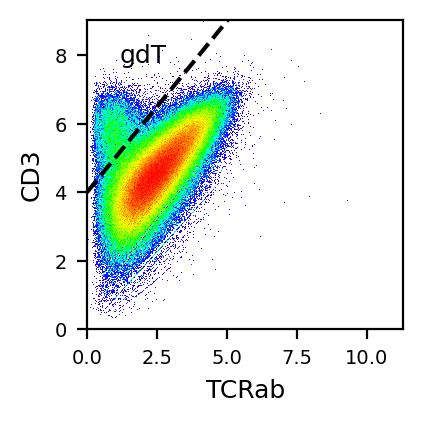

In [167]:
g1 = 'AB_TCRab'
g2 = 'AB_CD3'
g3 = 'AB_TCRab'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='Unclassified', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)

b=4
m = 1
ind = (y > (x*m)+b)
labels_raw.loc[ind.index[ind]] = 'gdT'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([0.05, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)
ylim = ax.get_ylim()
xlim = ax.get_xlim()

xspan = np.linspace(xlim[0], xlim[1], 2)
yspan = xspan*m + b
ax.plot(xspan, yspan, linestyle='--', color='k')
ax.set_xlim([0, xlim[1]])
ax.set_ylim([0, ylim[1]])
ax.text(2, 8, 'gdT', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_GDT.png'))

In [172]:
cluster_col = 'cell.type'

In [174]:
adata.obs[cluster_col].value_counts()

CD4_Naive            110879
CD4_CM                57898
CD8_EM                33099
CD8_Naive             31710
CD4_EM                23936
MAIT                  18509
CD8_TEMRA             16101
gdT-Vd2               14904
CD8_CM                10732
CD4_Treg               8162
CD4_platelet_bind      5952
CD8_TRM                2743
CD4_Tfh                1302
CD8_proliferating       812
Name: cell.type, dtype: int64

In [168]:
labels_raw.value_counts()

Unclassified    320936
gdT              15803
dtype: int64

In [175]:
labels_orig.value_counts()

Unclassified    336739
dtype: int64

In [176]:
labels_orig = labels_raw.copy()
labels_raw.value_counts()

Unclassified    320936
gdT              15803
dtype: int64

In [177]:
labels_raw = labels_orig.copy()

In [181]:
[v for v in sorted(markers.columns) if 'TCR' in v]

['AB_TCRValpha7p2', 'AB_TCRVdelta2', 'AB_TCRab']

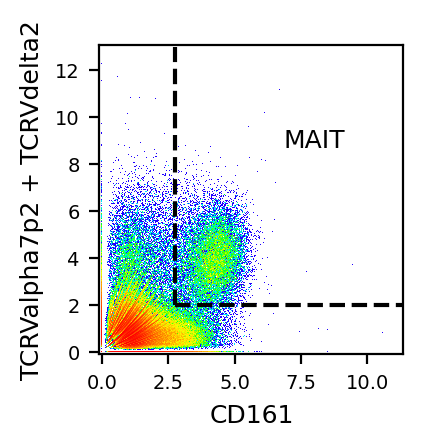

In [184]:
g1 = 'AB_CD161'
g2 = 'AB_TCRValpha7p2'
g2_2 = 'AB_TCRVdelta2'
g3 = 'AB_CD161'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='Unclassified', :].copy()

xthresh = 2.75
ythresh = 2
x = dat[g1]
y = dat[g2] + dat[g2_2]
z = dat[g3]
vmax = z.quantile(.995)
ind = (x>xthresh) & (y>ythresh)
labels_raw.loc[ind.index[ind]] = 'MAIT'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', '') + ' + ' + g2_2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.3, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

ylim = ax.get_ylim()
xlim = ax.get_xlim()


xspan = np.linspace(xthresh, xlim[1], 2)
yspan = np.linspace(ythresh, 13, 2)
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')

ax.set_xlim([-.1, xlim[1]])
ax.set_ylim([-.1, ylim[1]])



ax.text(8, 9, 'MAIT', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)

# plt.savefig(os.path.join(figdir, 'Gating_MAIT.png'))



In [185]:
labels_orig = labels_raw.copy()
labels_raw.value_counts()

Unclassified    302864
MAIT             18072
gdT              15803
dtype: int64

In [191]:
labels_raw = labels_orig.copy()


In [ ]:
# g1 = 'AB_CD4'
# g2 = 'AB_CD8'
# g3 = 'CD8_Naive'

# s=0.1
# labfontsize=9
# ticklabfontsize=7
# cbarlab_fs = 8
# dat = markers.loc[labels_raw=='Unclassified', :].copy()


# x = dat[g1]
# y = dat[g2]
# z = tcat_filt.loc[dat.index, g3]
# vmax = z.quantile(.995)

# xthresh = 1.5
# ythresh = 1.25
# # ind = (x>xthresh)
# # labels_prot.loc[ind.index[ind]] = 'CD4'
# # ind = (x<xthresh) & (y>ythresh)
# # labels_prot.loc[ind.index[ind]] = 'CD8'
# # ind = (x<xthresh) & (y<ythresh)
# # labels_prot.loc[ind.index[ind]] = 'dnT'
           
# fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
# gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
#                        bottom=.2, right=.95, top=.92)
# ax = fig.add_subplot(gs[0])

# # dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
# ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
# ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.7, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)



# ylim = ax.get_ylim()
# xlim = ax.get_xlim()

# xspan = np.linspace(xthresh, xlim[1], 2)
# yspan= np.linspace(0, ythresh, 2)
# ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')

# xspan = np.linspace(xlim[0], 2.5, 2)
# yspan= np.linspace(ythresh, ylim[1], 2)
# ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')

# ax.text(2.6, .95, 'CD4', fontsize=labfontsize, va='center', ha='center')
# ax.text(1, 2.5, 'CD8', fontsize=labfontsize, va='center', ha='center')
# ax.text(.8, .2, 'dnT', fontsize=labfontsize, va='center', ha='center')

# ax.set_xlim(xlim)
# ax.set_ylim(ylim)

# ax.tick_params(labelsize=ticklabfontsize)
# # plt.savefig(os.path.join(figdir, 'Gating_CD4andCD8.png'))

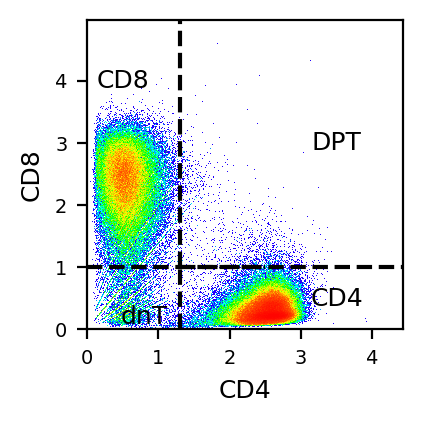

In [192]:
g1 = 'AB_CD4'
g2 = 'AB_CD8'
g3 = 'AB_CD3'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='Unclassified', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)

xthresh = 1.3
ythresh = 1
ind = (x>xthresh) & (y>ythresh)
labels_raw.loc[ind.index[ind]] = 'DPT'
ind = (x>xthresh) & (y<ythresh)
labels_raw.loc[ind.index[ind]] = 'CD4'
ind = (x<xthresh) & (y>ythresh)
labels_raw.loc[ind.index[ind]] = 'CD8'
ind = (x<xthresh) & (y<ythresh)
labels_raw.loc[ind.index[ind]] = 'dnT'
           
fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.7, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)



ylim = ax.get_ylim()
xlim = ax.get_xlim()

xspan = np.linspace(xthresh, xlim[1], 2)
yspan= np.linspace(0, ythresh, 2)
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')

xspan = np.linspace(xlim[0], 2.5, 2)
yspan= np.linspace(ythresh, ylim[1], 2)
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')

ax.text(3.5, 3, 'DPT', fontsize=labfontsize, va='center', ha='center')
ax.text(3.5, 0.5, 'CD4', fontsize=labfontsize, va='center', ha='center')
ax.text(0.5, 4, 'CD8', fontsize=labfontsize, va='center', ha='center')
ax.text(.8, .2, 'dnT', fontsize=labfontsize, va='center', ha='center')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4andCD8.png'))

In [193]:
labels_orig = labels_raw.copy()
labels_raw.value_counts()

CD4     203725
CD8      87485
MAIT     18072
gdT      15803
dnT      10105
DPT       1549
dtype: int64

In [194]:
labels_raw = labels_orig.copy()
labels_raw.value_counts()

CD4     203725
CD8      87485
MAIT     18072
gdT      15803
dnT      10105
DPT       1549
dtype: int64

In [195]:
sorted(adata_ADT.var.index)

['AB_ArmenianHamsterIgGiso',
 'AB_CD101',
 'AB_CD103',
 'AB_CD105',
 'AB_CD107a',
 'AB_CD112',
 'AB_CD119',
 'AB_CD11a',
 'AB_CD11b',
 'AB_CD11c',
 'AB_CD122',
 'AB_CD123',
 'AB_CD124',
 'AB_CD127',
 'AB_CD13',
 'AB_CD134',
 'AB_CD137',
 'AB_CD14',
 'AB_CD141',
 'AB_CD146',
 'AB_CD152',
 'AB_CD154',
 'AB_CD155',
 'AB_CD158',
 'AB_CD158b',
 'AB_CD158e1',
 'AB_CD16',
 'AB_CD161',
 'AB_CD163',
 'AB_CD169',
 'AB_CD18',
 'AB_CD183',
 'AB_CD185',
 'AB_CD19',
 'AB_CD194',
 'AB_CD195',
 'AB_CD196',
 'AB_CD1c',
 'AB_CD1d',
 'AB_CD2',
 'AB_CD20',
 'AB_CD21',
 'AB_CD22',
 'AB_CD223',
 'AB_CD224',
 'AB_CD226',
 'AB_CD23',
 'AB_CD24',
 'AB_CD244',
 'AB_CD25',
 'AB_CD26',
 'AB_CD267',
 'AB_CD268',
 'AB_CD27',
 'AB_CD270',
 'AB_CD272',
 'AB_CD274',
 'AB_CD278',
 'AB_CD279',
 'AB_CD28',
 'AB_CD29',
 'AB_CD3',
 'AB_CD303',
 'AB_CD31',
 'AB_CD314',
 'AB_CD319',
 'AB_CD32',
 'AB_CD328',
 'AB_CD33',
 'AB_CD335',
 'AB_CD35',
 'AB_CD352',
 'AB_CD36',
 'AB_CD38',
 'AB_CD39',
 'AB_CD4',
 'AB_CD40',
 'AB_CD41'

LAG3, AB_CD39

In [196]:
sorted(markers.columns)

['AB_ArmenianHamsterIgGiso',
 'AB_CD101',
 'AB_CD103',
 'AB_CD105',
 'AB_CD107a',
 'AB_CD112',
 'AB_CD119',
 'AB_CD11a',
 'AB_CD11b',
 'AB_CD11c',
 'AB_CD122',
 'AB_CD123',
 'AB_CD124',
 'AB_CD127',
 'AB_CD13',
 'AB_CD134',
 'AB_CD137',
 'AB_CD14',
 'AB_CD141',
 'AB_CD146',
 'AB_CD152',
 'AB_CD154',
 'AB_CD155',
 'AB_CD158',
 'AB_CD158b',
 'AB_CD158e1',
 'AB_CD16',
 'AB_CD161',
 'AB_CD163',
 'AB_CD169',
 'AB_CD18',
 'AB_CD183',
 'AB_CD185',
 'AB_CD19',
 'AB_CD194',
 'AB_CD195',
 'AB_CD196',
 'AB_CD1c',
 'AB_CD1d',
 'AB_CD2',
 'AB_CD20',
 'AB_CD21',
 'AB_CD22',
 'AB_CD223',
 'AB_CD224',
 'AB_CD226',
 'AB_CD23',
 'AB_CD24',
 'AB_CD244',
 'AB_CD25',
 'AB_CD26',
 'AB_CD267',
 'AB_CD268',
 'AB_CD27',
 'AB_CD270',
 'AB_CD272',
 'AB_CD274',
 'AB_CD278',
 'AB_CD279',
 'AB_CD28',
 'AB_CD29',
 'AB_CD3',
 'AB_CD303',
 'AB_CD31',
 'AB_CD314',
 'AB_CD319',
 'AB_CD32',
 'AB_CD328',
 'AB_CD33',
 'AB_CD335',
 'AB_CD35',
 'AB_CD352',
 'AB_CD36',
 'AB_CD38',
 'AB_CD39',
 'AB_CD4',
 'AB_CD40',
 'AB_CD41'

In [199]:
adata

AnnData object with n_obs × n_vars = 336739 × 28540
    obs: 'alt.subject.id', 'visit', 'covid.diagnosis.start.date.to.sample.drawn', 'group', 'sex', 'age', 'race', 'ethnicity', 'flu.vax.count.10yr', 'vaccine', 'vaccine.side.effects', 'long.covid.symptoms', 'Batch', 'nCount_RNA', 'nCount_HTO', 'nCount_CITE', 'nCount_RNA_largest.gene', 'nCount_SCT', 'nFeature_RNA', 'nFeature_HTO', 'nFeature_CITE', 'nFeature_SCT', 'percent.mt', 'percent.largest.gene', 'coarse.cell.type', 'cell.type', 'HTO1', 'HTO2', 'HTO3'
    var: 'gene_ids', 'feature_types'

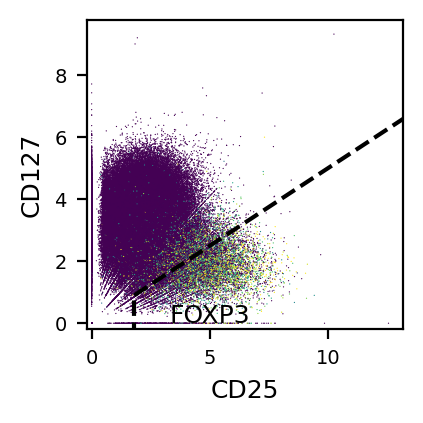

In [200]:
g1 = 'AB_CD25'
g2 = 'AB_CD127'
g3 = 'FOXP3'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = markers.loc[dat.index, g3]
vmax = z.quantile(.995)

xthresh = 1.8
ythresh = 0.9

# b= -0.25
m = 0.5
xspan = np.linspace(xthresh, 20, 2)
yspan = (xspan-xthresh)*m + ythresh

# ind = y > (x*m)+b 
# labels.loc[ind.index[ind]] = 'Treg'

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

# dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
scim = ax.scatter(x,y, edgecolor='None', s=.2, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([0.1, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)



ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.plot([xthresh, xspan[1]], [yspan[0], yspan[1]], linestyle='--', color='k')
ax.plot([xthresh, xthresh], [ylim[0], ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xlim[1]], [ythresh, ythresh], linestyle='--', color='k')
ax.set_xlim([-.2, xlim[1]])
ax.set_ylim([-.2, ylim[1]])
ax.text(5, .25, g3, fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_Treg.png'))

In [202]:
adata_ADT.obs[cluster_col].value_counts()

CD4_Naive            110879
CD4_CM                57898
CD8_EM                33099
CD8_Naive             31710
CD4_EM                23936
MAIT                  18509
CD8_TEMRA             16101
gdT-Vd2               14904
CD8_CM                10732
CD4_Treg               8162
CD4_platelet_bind      5952
CD8_TRM                2743
CD4_Tfh                1302
CD8_proliferating       812
Name: cell.type, dtype: int64

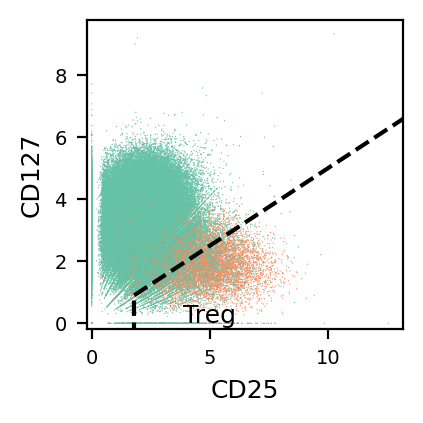

In [203]:
g1 = 'AB_CD25'
g2 = 'AB_CD127'
g3 = 'FOXP3'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = adata_ADT.obs.loc[dat.index, cluster_col]=='CD4_Treg'
# vmax = z.quantile(.995)

# Unique category labels
color_labels = z.unique()

# List of RGB triplets
rgb_values = sns.color_palette("Set2", 2)

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

xthresh = 1.8
ythresh = 0.9

# b= -0.25
m = 0.5
xspan = np.linspace(xthresh, 20, 2)
yspan = (xspan-xthresh)*m + ythresh

# ind = y > (x*m)+b 
# labels.loc[ind.index[ind]] = 'Treg'

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

# dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
scim = ax.scatter(x,y, edgecolor='None', s=.2, c=z.map(color_map), vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([0.1, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)



ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.plot([xthresh, xspan[1]], [yspan[0], yspan[1]], linestyle='--', color='k')
ax.plot([xthresh, xthresh], [ylim[0], ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xlim[1]], [ythresh, ythresh], linestyle='--', color='k')
ax.set_xlim([-.2, xlim[1]])
ax.set_ylim([-.2, ylim[1]])
ax.text(5, .25, 'Treg', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_Treg.png'))

In [ ]:
# g1 = 'AB_CD25'
# g2 = 'AB_CD127_IL_7Ra'
# g3 = 'AB_CD25'
# s=1
# labfontsize=9
# ticklabfontsize=7
# cbarlab_fs = 8
# dat = markers.loc[labels_raw=='CD4', :].copy()


# x = dat[g1]
# y = dat[g2]
# z = dat[g3]
# vmax = z.quantile(.995)

# xthresh = 1.2
# ythresh = 0.8

# # b= -0.25
# m = 0.5
# xspan = np.linspace(xthresh, 20, 2)
# yspan = (xspan-xthresh)*m + ythresh

# # ind = (x>xthresh) & (y > ((x-xthresh)*m) + ythresh)
# # labels_raw.loc[ind.index[ind]] = 'Treg'

# fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
# gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
#                        bottom=.2, right=.95, top=.92)
# ax = fig.add_subplot(gs[0])

# dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# # scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
# ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
# ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# # cbar_ax = ax.inset_axes([0.1, .85, 0.15, 0.04], transform=ax.transAxes, )
# # fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# # cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# # cbar_ax.set_xticks([0, vmax])
# # cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)


# ylim = ax.get_ylim()
# xlim = ax.get_xlim()

# ax.plot([xthresh, xspan[1]], [yspan[0], yspan[1]], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ylim[0], ythresh], linestyle='--', color='k')
# # ax.plot([xthresh, xlim[1]], [ythresh, ythresh], linestyle='--', color='k')

# ax.set_xlim([-.2, xlim[1]])
# ax.set_ylim([-.2, ylim[1]])
# ax.text(10, .25, 'Treg', fontsize=labfontsize, va='center', ha='center')
# ax.tick_params(labelsize=ticklabfontsize)
# # plt.savefig(os.path.join(figdir, 'Gating_Treg.png'))

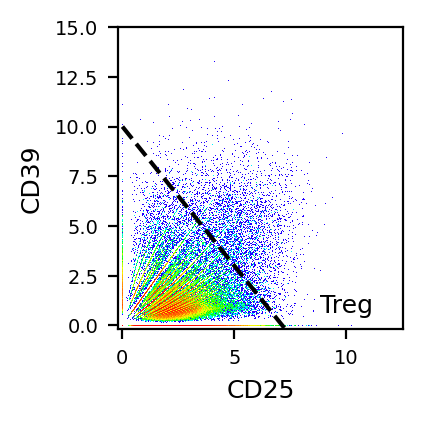

In [209]:
g1 = 'AB_CD25'
g2 = 'AB_CD39'
g3 = 'AB_CD25'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)

b= 10
m = -1.4
xspan = np.linspace(0, 15, 2)
yspan = xspan*m + b

ind = y > m*x + b
labels_raw.loc[ind.index[ind]] = 'Treg'

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([0.1, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)


ylim = ax.get_ylim()
xlim = ax.get_xlim()

ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ylim[0], ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xlim[1]], [ythresh, ythresh], linestyle='--', color='k')

ax.set_xlim([-.2, xlim[1]])
ax.set_ylim([-.2, ylim[1]])
ax.text(10, 1, 'Treg', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_Treg.png'))

In [ ]:
labels_raw[adata.obs.index]=='Treg'

In [ ]:
adata.obs.groupby([cluster_col, labels_raw[adata.obs.index]=='Treg']).size()

In [ ]:
adata.obs.groupby([cluster_col, labels_prot[adata.obs.index]=='Treg']).size()

In [ ]:
adata.obs.groupby([cluster_col, labels_raw[adata.obs.index]=='Treg']).size()

In [211]:
labels_orig = labels_raw.copy()
labels_raw.value_counts()

CD4     199830
CD8      87485
MAIT     18072
gdT      15803
dnT      10105
Treg      3895
DPT       1549
dtype: int64

In [212]:
labels_orig = labels_raw.copy()

In [213]:
labels_raw = labels_orig.copy()

In [214]:
labels_orig.value_counts()

CD4     199830
CD8      87485
MAIT     18072
gdT      15803
dnT      10105
Treg      3895
DPT       1549
dtype: int64

### CD4 gating

In [215]:
labels_raw = labels_orig.copy()

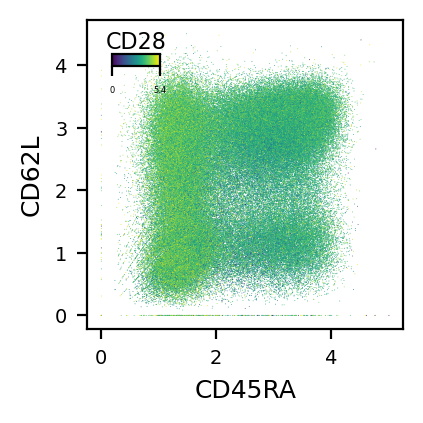

In [216]:
g1 = 'AB_CD45RA'
g2 = 'AB_CD62L'
g3 =  'AB_CD28'

s=0.1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)


xthresh = 2.2
ythresh = 3.2
# ind = (x>xthresh) & (y>ythresh)
# labels_raw.loc[ind.index[ind]] = 'CD4 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels_raw.loc[ind.index[ind]] = 'CD4 TEMRA'

# ind = (x<xthresh) & (y>ythresh)
# labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TCM'
# ind = (x<xthresh) & (y<ythresh)
# labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

# dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]#2.2
xmax = xlim[1]



# ax.plot([xthresh, xmax], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')

# yspan= np.linspace(ythresh, ymax, 2)
# ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
# ax.text(3, 5.5, 'CD4 Naive', fontsize=labfontsize, va='center', ha='center')
# ax.text(3, 2, 'CD4 TEMRA', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 5.5, 'CD4 TCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 2, 'CD4 TEM', fontsize=labfontsize, va='center', ha='center')



ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4naiveMem.png'))


In [218]:
sorted(markers.columns)

['AB_ArmenianHamsterIgGiso',
 'AB_CD101',
 'AB_CD103',
 'AB_CD105',
 'AB_CD107a',
 'AB_CD112',
 'AB_CD119',
 'AB_CD11a',
 'AB_CD11b',
 'AB_CD11c',
 'AB_CD122',
 'AB_CD123',
 'AB_CD124',
 'AB_CD127',
 'AB_CD13',
 'AB_CD134',
 'AB_CD137',
 'AB_CD14',
 'AB_CD141',
 'AB_CD146',
 'AB_CD152',
 'AB_CD154',
 'AB_CD155',
 'AB_CD158',
 'AB_CD158b',
 'AB_CD158e1',
 'AB_CD16',
 'AB_CD161',
 'AB_CD163',
 'AB_CD169',
 'AB_CD18',
 'AB_CD183',
 'AB_CD185',
 'AB_CD19',
 'AB_CD194',
 'AB_CD195',
 'AB_CD196',
 'AB_CD1c',
 'AB_CD1d',
 'AB_CD2',
 'AB_CD20',
 'AB_CD21',
 'AB_CD22',
 'AB_CD223',
 'AB_CD224',
 'AB_CD226',
 'AB_CD23',
 'AB_CD24',
 'AB_CD244',
 'AB_CD25',
 'AB_CD26',
 'AB_CD267',
 'AB_CD268',
 'AB_CD27',
 'AB_CD270',
 'AB_CD272',
 'AB_CD274',
 'AB_CD278',
 'AB_CD279',
 'AB_CD28',
 'AB_CD29',
 'AB_CD3',
 'AB_CD303',
 'AB_CD31',
 'AB_CD314',
 'AB_CD319',
 'AB_CD32',
 'AB_CD328',
 'AB_CD33',
 'AB_CD335',
 'AB_CD35',
 'AB_CD352',
 'AB_CD36',
 'AB_CD38',
 'AB_CD39',
 'AB_CD4',
 'AB_CD40',
 'AB_CD41'

In [ ]:
# g1 = 'AB_CD45RA'
# g2 = 'AB_CD197_CCR7'
# g3 =  'AB_CD28'

# s=0.1
# labfontsize=9
# ticklabfontsize=7
# cbarlab_fs = 8
# dat = markers.loc[labels_raw=='CD4', :].copy()


# x = dat[g1]
# y = dat[g2]
# z = dat[g3]
# vmax = z.quantile(.995)


# xthresh = 2.2
# ythresh = 3.2
# # ind = (x>xthresh) & (y>ythresh)
# # labels_raw.loc[ind.index[ind]] = 'CD4 Naive'
# # ind = (x>xthresh) & (y<ythresh)
# # labels_raw.loc[ind.index[ind]] = 'CD4 TEMRA'

# # ind = (x<xthresh) & (y>ythresh)
# # labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TCM'
# # ind = (x<xthresh) & (y<ythresh)
# # labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TEM'



# fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
# gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
#                        bottom=.2, right=.95, top=.92)
# ax = fig.add_subplot(gs[0])

# # dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
# ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
# ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

# xlim = ax.get_xlim()
# ylim = ax.get_ylim()

# ymin = ylim[0]
# ymax = ylim[1]
# xmin = xlim[0]#2.2
# xmax = xlim[1]



# # ax.plot([xthresh, xmax], [ythresh, ythresh], linestyle='--', color='k')
# # ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')

# # yspan= np.linspace(ythresh, ymax, 2)
# # ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# # ax.set_xlim([xmin, xmax])
# # ax.set_ylim([ymin, ymax])
# # ax.text(3, 5.5, 'CD4 Naive', fontsize=labfontsize, va='center', ha='center')
# # ax.text(3, 2, 'CD4 TEMRA', fontsize=labfontsize, va='center', ha='center')
# # ax.text(1.4, 5.5, 'CD4 TCM', fontsize=labfontsize, va='center', ha='center')
# # ax.text(1.4, 2, 'CD4 TEM', fontsize=labfontsize, va='center', ha='center')



# ax.tick_params(labelsize=ticklabfontsize)
# # plt.savefig(os.path.join(figdir, 'Gating_CD4naiveMem.png'))


In [ ]:
# g1 = 'AB_CD45RA'
# g2 = 'AB_CD197_CCR7'
# g3 =  'AB_CD27'

# s=0.1
# labfontsize=9
# ticklabfontsize=7
# cbarlab_fs = 8
# dat = markers.loc[labels_raw=='CD4', :].copy()


# x = dat[g1]
# y = dat[g2]
# z = dat[g3]
# vmax = z.quantile(.995)


# xthresh = 2.2
# ythresh = 3.2
# # ind = (x>xthresh) & (y>ythresh)
# # labels_raw.loc[ind.index[ind]] = 'CD4 Naive'
# # ind = (x>xthresh) & (y<ythresh)
# # labels_raw.loc[ind.index[ind]] = 'CD4 TEMRA'

# # ind = (x<xthresh) & (y>ythresh)
# # labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TCM'
# # ind = (x<xthresh) & (y<ythresh)
# # labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TEM'



# fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
# gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
#                        bottom=.2, right=.95, top=.92)
# ax = fig.add_subplot(gs[0])

# # dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
# ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
# ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

# xlim = ax.get_xlim()
# ylim = ax.get_ylim()

# ymin = ylim[0]
# ymax = ylim[1]
# xmin = xlim[0]#2.2
# xmax = xlim[1]



# # ax.plot([xthresh, xmax], [ythresh, ythresh], linestyle='--', color='k')
# # ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')

# # yspan= np.linspace(ythresh, ymax, 2)
# # ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# # ax.set_xlim([xmin, xmax])
# # ax.set_ylim([ymin, ymax])
# # ax.text(3, 5.5, 'CD4 Naive', fontsize=labfontsize, va='center', ha='center')
# # ax.text(3, 2, 'CD4 TEMRA', fontsize=labfontsize, va='center', ha='center')
# # ax.text(1.4, 5.5, 'CD4 TCM', fontsize=labfontsize, va='center', ha='center')
# # ax.text(1.4, 2, 'CD4 TEM', fontsize=labfontsize, va='center', ha='center')



# ax.tick_params(labelsize=ticklabfontsize)
# # plt.savefig(os.path.join(figdir, 'Gating_CD4naiveMem.png'))


In [ ]:
sorted(markers_magic.columns)

In [ ]:
sorted(adata_ADT.var.index)

In [ ]:
g1 = 'AB_CD45RA'
g2 = 'AB_CD28'
g3 =  'AB_CD45RO'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)

xthresh = 2.2
ythresh = 3.2
# ind = (x>xthresh) & (y>ythresh)
# labels_raw.loc[ind.index[ind]] = 'CD4 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels_raw.loc[ind.index[ind]] = 'CD4 TEMRA'

# ind = (x<xthresh) & (y>ythresh)
# labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TCM'
# ind = (x<xthresh) & (y<ythresh)
# labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]#2.2
xmax = xlim[1]



# ax.plot([xthresh, xmax], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')

# yspan= np.linspace(ythresh, ymax, 2)
# ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
# ax.text(3, 5.5, 'CD4 Naive', fontsize=labfontsize, va='center', ha='center')
# ax.text(3, 2, 'CD4 TEMRA', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 5.5, 'CD4 TCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 2, 'CD4 TEM', fontsize=labfontsize, va='center', ha='center')



ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4naiveMem.png'))


In [ ]:
g1 = 'AB_CD45RA'
g2 = 'AB_CD62L'
g3 =  'AB_CD45RO'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)

xthresh = 2.2
ythresh = 3.2
# ind = (x>xthresh) & (y>ythresh)
# labels_raw.loc[ind.index[ind]] = 'CD4 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels_raw.loc[ind.index[ind]] = 'CD4 TEMRA'

# ind = (x<xthresh) & (y>ythresh)
# labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TCM'
# ind = (x<xthresh) & (y<ythresh)
# labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]#2.2
xmax = xlim[1]



# ax.plot([xthresh, xmax], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')

# yspan= np.linspace(ythresh, ymax, 2)
# ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
# ax.text(3, 5.5, 'CD4 Naive', fontsize=labfontsize, va='center', ha='center')
# ax.text(3, 2, 'CD4 TEMRA', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 5.5, 'CD4 TCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 2, 'CD4 TEM', fontsize=labfontsize, va='center', ha='center')



ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4naiveMem.png'))


In [ ]:
g1 = 'AB_CD45RA'
g2 = 'AB_CD197_CCR7'
g3 =  'AB_CD45RO'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)

xthresh = 2.2
ythresh = 3.2
# ind = (x>xthresh) & (y>ythresh)
# labels_raw.loc[ind.index[ind]] = 'CD4 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels_raw.loc[ind.index[ind]] = 'CD4 TEMRA'

# ind = (x<xthresh) & (y>ythresh)
# labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TCM'
# ind = (x<xthresh) & (y<ythresh)
# labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]#2.2
xmax = xlim[1]



# ax.plot([xthresh, xmax], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')

# yspan= np.linspace(ythresh, ymax, 2)
# ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
# ax.text(3, 5.5, 'CD4 Naive', fontsize=labfontsize, va='center', ha='center')
# ax.text(3, 2, 'CD4 TEMRA', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 5.5, 'CD4 TCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 2, 'CD4 TEM', fontsize=labfontsize, va='center', ha='center')



ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4naiveMem.png'))


In [ ]:
g1 = 'AB_CD45RA'
g2 = 'AB_CD197_CCR7'
g3 =  'AB_CD45RO'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)

xthresh = 2.2
ythresh = 3.2
# ind = (x>xthresh) & (y>ythresh)
# labels_raw.loc[ind.index[ind]] = 'CD4 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels_raw.loc[ind.index[ind]] = 'CD4 TEMRA'

# ind = (x<xthresh) & (y>ythresh)
# labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TCM'
# ind = (x<xthresh) & (y<ythresh)
# labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TEM'

y_trans = (y+1e-3).apply(np.log10)


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]#2.2
xmax = xlim[1]



# ax.plot([xthresh, xmax], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')

# yspan= np.linspace(ythresh, ymax, 2)
# ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
# ax.text(3, 5.5, 'CD4 Naive', fontsize=labfontsize, va='center', ha='center')
# ax.text(3, 2, 'CD4 TEMRA', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 5.5, 'CD4 TCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 2, 'CD4 TEM', fontsize=labfontsize, va='center', ha='center')



ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4naiveMem.png'))


In [ ]:
g1 = 'AB_CD45RA'
g2 = 'AB_CD197_CCR7'
g3 =  'CD4_Naive'

s=0.1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = tcat_filt.loc[dat.index, g3]
vmax = z.quantile(.995)


xthresh = 2.2
ythresh = 1.6
# ind = (x>xthresh) & (y>ythresh)
# labels_raw.loc[ind.index[ind]] = 'CD4 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels_raw.loc[ind.index[ind]] = 'CD4 TEMRA'

# ind = (x<xthresh) & (y>ythresh)
# labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TCM'
# ind = (x<xthresh) & (y<ythresh)
# labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

# dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]#2.2
xmax = xlim[1]



# ax.plot([xthresh, xmax], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')

# yspan= np.linspace(ythresh, ymax, 2)
# ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
# ax.text(4, 4.4, 'CD4 Naive', fontsize=labfontsize, va='center', ha='center')
# ax.text(4, 0.4, 'CD4 TEMRA', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 5.5, 'CD4 TCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 2, 'CD4 TEM', fontsize=labfontsize, va='center', ha='center')



ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4naiveMem.png'))


In [ ]:
g1 = 'AB_CD45RA'
g2 = 'AB_CD62L'
g3 = 'AB_CD45RO'

s=0.1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[labels_prot=='CD8', :].copy()
ind = set(dat.index).intersection(cmem_labels.index)

x = dat[g1]
y = dat[g2]
z = pd.Series('', index = dat.index)
z[ind] = cmem_labels.loc[ind, 'state']

# Unique category labels
color_labels = z.unique()

# List of RGB triplets
rgb_values = sns.color_palette()

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))


xthresh=2.7
ythresh=1.35
ind = (x>xthresh) & (y>ythresh)
labels_prot.loc[ind.index[ind]] = 'CD8 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TEMRA'
# ind = (x<xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TCM'
# ind = (x<xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

# dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
scim = ax.scatter(x,y, edgecolor='None', s=s, c=z.map(color_map))
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]
xmax = xlim[1]

xspan = np.linspace(xthresh, xmax, 2)
yspan= np.linspace(ymin, ymax, 2)
ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')
# ax.set_xlim(xlim)
ax.text(3.6, 2.8, 'CD8\nNaive', fontsize=labfontsize, va='center', ha='center')
# ax.text(3.6, 0.7, 'CD8\nTEMRA', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.7, 2.8, 'CD8\nTCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.7, 0.6, 'CD8 TEM', fontsize=labfontsize, va='center', ha='center')

handles_list = []
for k,v in color_map.items():
    if k not in ['' , 'DN', 'prolif', 'innate']:
        handles_list.append(mpatches.Patch(color=v, label=k))
ax.legend(handles=handles_list, loc = 'upper left', fontsize = '3')

# ax.set_xlim([0, xmax])
# ax.set_ylim([ymin, ymax])

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD8NaiveMem.png'))

In [ ]:
g1 = 'AB_CD45RA'
g2 = 'AB_CD62L'
g3 =  'CD4_Naive'

s=0.1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='CD4', :].copy()
ind = set(dat.index).intersection(cmem_labels.index)

x = dat[g1]
y = dat[g2]
z = pd.Series('', index = dat.index)
z[ind] = cmem_labels.loc[ind, 'state']


xthresh = 2.2
ythresh = 1.6
# ind = (x>xthresh) & (y>ythresh)
# labels_raw.loc[ind.index[ind]] = 'CD4 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels_raw.loc[ind.index[ind]] = 'CD4 TEMRA'

# ind = (x<xthresh) & (y>ythresh)
# labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TCM'
# ind = (x<xthresh) & (y<ythresh)
# labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

# dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
scim = ax.scatter(x,y, edgecolor='None', s=s, c=z.map(color_map))
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]#2.2
xmax = xlim[1]

handles_list = []
for k,v in color_map.items():
    if k not in ['' , 'DN', 'prolif', 'innate']:
        handles_list.append(mpatches.Patch(color=v, label=k))
ax.legend(handles=handles_list, loc = 'upper right', fontsize = '3')



# ax.plot([xthresh, xmax], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')

# yspan= np.linspace(ythresh, ymax, 2)
# ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
# ax.text(4, 4.4, 'CD4 Naive', fontsize=labfontsize, va='center', ha='center')
# ax.text(4, 0.4, 'CD4 TEMRA', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 5.5, 'CD4 TCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 2, 'CD4 TEM', fontsize=labfontsize, va='center', ha='center')



ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4naiveMem.png'))


In [ ]:
g1 = 'AB_CD45RA'
g2 = 'AB_CD62L'
g3 =  'CD4_Naive'

s=0.1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = tcat_filt.loc[dat.index, g3]
vmax = z.quantile(.995)


xthresh = 2.2
ythresh = 1.6
# ind = (x>xthresh) & (y>ythresh)
# labels_raw.loc[ind.index[ind]] = 'CD4 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels_raw.loc[ind.index[ind]] = 'CD4 TEMRA'

# ind = (x<xthresh) & (y>ythresh)
# labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TCM'
# ind = (x<xthresh) & (y<ythresh)
# labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

# dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]#2.2
xmax = xlim[1]



# ax.plot([xthresh, xmax], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')

# yspan= np.linspace(ythresh, ymax, 2)
# ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
# ax.text(4, 4.4, 'CD4 Naive', fontsize=labfontsize, va='center', ha='center')
# ax.text(4, 0.4, 'CD4 TEMRA', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 5.5, 'CD4 TCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 2, 'CD4 TEM', fontsize=labfontsize, va='center', ha='center')



ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4naiveMem.png'))


In [ ]:
g1 = 'AB_CD45RA'
g2 = 'AB_CD62L'
g3 =  'AB_CD45RO'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)


xthresh = 2.2
ythresh = 1.6
ind = (x>xthresh) 
labels_raw.loc[ind.index[ind]] = 'CD4 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels_raw.loc[ind.index[ind]] = 'CD4 TEMRA'

# ind = (x<xthresh) & (y>ythresh)
# labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TCM'
# ind = (x<xthresh) & (y<ythresh)
# labels_ccr7_prot.loc[ind.index[ind]] = 'CD4 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]#2.2
xmax = xlim[1]



# ax.plot([xthresh, xmax], [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')

# yspan= np.linspace(ythresh, ymax, 2)
# ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
ax.text(4, 4.4, 'CD4 Naive', fontsize=labfontsize, va='center', ha='center')
# ax.text(4, 0.4, 'CD4 TEMRA', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 5.5, 'CD4 TCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 2, 'CD4 TEM', fontsize=labfontsize, va='center', ha='center')



ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4naiveMem.png'))


In [ ]:
labels_raw.value_counts()

In [ ]:
g1 = 'AB_CD62L'
g2 = 'AB_CD27'
g3 = 'CD4_CM-1'
s=0.1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='CD4', :].copy()
ind = set(dat.index).intersection(cmem_labels.index)
x = dat[g1]
y = dat[g2]
y_trans = (y+1e-3).apply(np.log10)

z = pd.Series('', index = dat.index)
z[ind] = cmem_labels.loc[ind, 'state']

b=0.6
m = -.11
ind = (y_trans > (x*m)+b)

# labels_prot.loc[ind.index[ind]] = 'CD4 TCM'
# labels_prot.loc[ind.index[~ind]] = 'CD4 TEM'

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

scim = ax.scatter(x,y, edgecolor='None', s=s, c=z.map(color_map))
# dsshow(pd.DataFrame({'x':x, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.5, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xspan = np.linspace(0, 4, 2)
yspan = xspan*m + b


# xmin = -.4
ylim = ax.get_ylim()
xlim = ax.get_xlim()

handles_list = []
for k,v in color_map.items():
    if k not in ['' , 'DN', 'prolif', 'innate']:
        handles_list.append(mpatches.Patch(color=v, label=k))
ax.legend(handles=handles_list, loc = 'upper right', fontsize = '3')


# xspan = np.linspace(xmin, xlim[1], 2)
# yspan = xspan*m + b
# ax.plot([xlim[0], xlim[1]], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ylim[0], ylim[1]], linestyle='--', color='k')
# ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xlim[1]])
# ax.set_ylim([ylim[0], ylim[1]])
ax.tick_params(labelsize=ticklabfontsize)

# ax.text(2.4, 0.65, 'CD4\nTCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1, 0.25, 'CD4\nTEM', fontsize=labfontsize, va='center', ha='center')

# plt.savefig(os.path.join(figdir, 'Gating_CD4EM.png'))

In [ ]:
g1 = 'AB_CD62L'
g2 = 'AB_CD197_CCR7'
g3 = 'CD4_CM-1'
s=0.1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='CD4', :].copy()
ind = set(dat.index).intersection(cmem_labels.index)
x = dat[g1]
y = dat[g2]
y_trans = (y+1e-3).apply(np.log10)

z = pd.Series('', index = dat.index)
z[ind] = cmem_labels.loc[ind, 'state']

b=0.6
m = -.11
ind = (y_trans > (x*m)+b)

# labels_prot.loc[ind.index[ind]] = 'CD4 TCM'
# labels_prot.loc[ind.index[~ind]] = 'CD4 TEM'

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

scim = ax.scatter(x,y, edgecolor='None', s=s, c=z.map(color_map))
# dsshow(pd.DataFrame({'x':x, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.5, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xspan = np.linspace(0, 4, 2)
yspan = xspan*m + b


# xmin = -.4
ylim = ax.get_ylim()
xlim = ax.get_xlim()

handles_list = []
for k,v in color_map.items():
    if k not in ['' , 'DN', 'prolif', 'innate']:
        handles_list.append(mpatches.Patch(color=v, label=k))
ax.legend(handles=handles_list, loc = 'upper right', fontsize = '3')


# xspan = np.linspace(xmin, xlim[1], 2)
# yspan = xspan*m + b
# ax.plot([xlim[0], xlim[1]], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ylim[0], ylim[1]], linestyle='--', color='k')
# ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xlim[1]])
# ax.set_ylim([ylim[0], ylim[1]])
ax.tick_params(labelsize=ticklabfontsize)

# ax.text(2.4, 0.65, 'CD4\nTCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1, 0.25, 'CD4\nTEM', fontsize=labfontsize, va='center', ha='center')

# plt.savefig(os.path.join(figdir, 'Gating_CD4EM.png'))

In [ ]:
g1 = 'AB_CD62L'
g2 = 'AB_CD197_CCR7'
g3 = 'CD4_CM-1'
s=0.1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='CD4', :].copy()
x = dat[g1]
y = dat[g2]
z = tcat_filt.loc[dat.index, g3]
y_trans = (y+1e-3).apply(np.log10)

vmax = z.quantile(.995)

b=0.6
m = -.11
ind = (y_trans > (x*m)+b)

# labels_prot.loc[ind.index[ind]] = 'CD4 TCM'
# labels_prot.loc[ind.index[~ind]] = 'CD4 TEM'

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
# dsshow(pd.DataFrame({'x':x, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.5, .85, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xspan = np.linspace(0, 4, 2)
yspan = xspan*m + b


# xmin = -.4
ylim = ax.get_ylim()
xlim = ax.get_xlim()

# xspan = np.linspace(xmin, xlim[1], 2)
# yspan = xspan*m + b
# ax.plot([xlim[0], xlim[1]], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ylim[0], ylim[1]], linestyle='--', color='k')
# ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xlim[1]])
# ax.set_ylim([ylim[0], ylim[1]])
ax.tick_params(labelsize=ticklabfontsize)

# ax.text(2.4, 0.65, 'CD4\nTCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1, 0.25, 'CD4\nTEM', fontsize=labfontsize, va='center', ha='center')

# plt.savefig(os.path.join(figdir, 'Gating_CD4EM.png'))

In [ ]:
g1 = 'AB_CD62L'
g2 = 'AB_CD197_CCR7'
g3 = 'Effector_Memory'
s=0.1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='CD4', :].copy()
x = dat[g1]
y = dat[g2]
z = tcat_filt.loc[dat.index, g3]
y_trans = (y+1e-3).apply(np.log10)

vmax = z.quantile(.9)

b=0.6
m = -.11
ind = (y_trans > (x*m)+b)

# labels_prot.loc[ind.index[ind]] = 'CD4 TCM'
# labels_prot.loc[ind.index[~ind]] = 'CD4 TEM'

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
# dsshow(pd.DataFrame({'x':x, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.5, .85, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xspan = np.linspace(0, 4, 2)
yspan = xspan*m + b


# xmin = -.4
ylim = ax.get_ylim()
xlim = ax.get_xlim()

# xspan = np.linspace(xmin, xlim[1], 2)
# yspan = xspan*m + b
# ax.plot([xlim[0], xlim[1]], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ylim[0], ylim[1]], linestyle='--', color='k')
# ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xlim[1]])
# ax.set_ylim([ylim[0], ylim[1]])
ax.tick_params(labelsize=ticklabfontsize)

# ax.text(2.4, 0.65, 'CD4\nTCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1, 0.25, 'CD4\nTEM', fontsize=labfontsize, va='center', ha='center')

# plt.savefig(os.path.join(figdir, 'Gating_CD4EM.png'))

In [ ]:
g1 = 'AB_CD62L'
g2 = 'AB_CD197_CCR7'
g3 = 'Th17'
s=0.1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='CD4', :].copy()
x = dat[g1]
y = dat[g2]
z = tcat_filt.loc[dat.index, g3]
y_trans = (y+1e-3).apply(np.log10)

vmax = z.quantile(.99)

b=0.6
m = -.11
ind = (y_trans > (x*m)+b)

# labels_prot.loc[ind.index[ind]] = 'CD4 TCM'
# labels_prot.loc[ind.index[~ind]] = 'CD4 TEM'

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
# dsshow(pd.DataFrame({'x':x, 'y':y_trans}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.5, .85, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xspan = np.linspace(0, 4, 2)
yspan = xspan*m + b


# xmin = -.4
ylim = ax.get_ylim()
xlim = ax.get_xlim()

# xspan = np.linspace(xmin, xlim[1], 2)
# yspan = xspan*m + b
# ax.plot([xlim[0], xlim[1]], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ylim[0], ylim[1]], linestyle='--', color='k')
# ax.plot(xspan, yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xlim[1]])
# ax.set_ylim([ylim[0], ylim[1]])
ax.tick_params(labelsize=ticklabfontsize)

# ax.text(2.4, 0.65, 'CD4\nTCM', fontsize=labfontsize, va='center', ha='center')
# ax.text(1, 0.25, 'CD4\nTEM', fontsize=labfontsize, va='center', ha='center')

# plt.savefig(os.path.join(figdir, 'Gating_CD4EM.png'))

In [ ]:
g1 = 'AB_CD62L'
g2 = 'AB_CD197_CCR7'
g3 = 'AB_CD27'

s=0.1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='CD4', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)
# y_trans = (y+1e-3).apply(np.log10)


xthresh = 2.2
ythresh = 1.2
# ind = (x>xthresh)
# labels_prot.loc[ind.index[ind]] = 'CD4 CD45RA+'
# ind = (x<xthresh)
# labels_prot.loc[ind.index[ind]] = 'CD4 CD45RA-'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

# dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.14, .85, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g3, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]#2.2
xmax = xlim[1]



# ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')

# yspan= np.linspace(ythresh, ymax, 2)
# ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
# ax.text(3, 3.2, 'CD4 CD45RA+', fontsize=labfontsize, va='center', ha='center')
# # ax.text(3, 0.6, 'CD4 CD45RA-', fontsize=labfontsize, va='center', ha='center')
# # ax.text(1.4, 3.2, 'CD4 CD45RA-', fontsize=labfontsize, va='center', ha='center')
# ax.text(1.4, 0.6, 'CD4 CD45RA-', fontsize=labfontsize, va='center', ha='center')
# ax.set_xlim([2, xlim[1]])
# ax.set_ylim([0.5, ylim[1]])



ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4naiveMem.png'))


In [ ]:
g1 = 'AB_CD62L'
g2 = 'AB_CD197_CCR7'
g3 = 'AB_CD27'
s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='CD4', :].copy()
x = dat[g1]
y = dat[g2]
z = dat[g3]

vmax = z.quantile(.995)

xthresh = 1
# b=1.5
# m = -.85
ind = (x > xthresh)

labels_raw.loc[ind.index[ind]] = 'CD4 TCM'
labels_raw.loc[ind.index[~ind]] = 'CD4 TEM'

fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
ax.set_xlabel(g1.replace('AB_', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)

xspan = np.linspace(0, 4, 2)
yspan = xspan*m + b


# xmin = -.4
ylim = ax.get_ylim()
xlim = ax.get_xlim()

# xspan = np.linspace(xmin, xlim[1], 2)
# yspan = xspan*m + b
# ax.plot([xlim[0], xlim[1]], [ythresh, ythresh], linestyle='--', color='k')
# ax.plot([xthresh, xthresh], [ylim[0], ylim[1]], linestyle='--', color='k')
ax.plot([xthresh, xthresh], [ylim[0], ylim[1]], linestyle='--', color='k')
# ax.set_xlim([xmin, xlim[1]])
# ax.set_ylim([ylim[0], ylim[1]])
ax.tick_params(labelsize=ticklabfontsize)

ax.text(3.6, 1, 'CD4\nTCM', fontsize=labfontsize, va='center', ha='center')
ax.text(0.4, 7, 'CD4\nTEM', fontsize=labfontsize, va='center', ha='center')

# plt.savefig(os.path.join(figdir, 'Gating_CD4EM.png'))

In [ ]:
labels_raw.value_counts()

In [ ]:
labels_prot.value_counts()

In [ ]:
labels_orig = labels_raw.copy()
labels_raw.value_counts()

In [ ]:
labels_raw = labels_orig.copy()
labels_raw.value_counts()

### CD8 gating

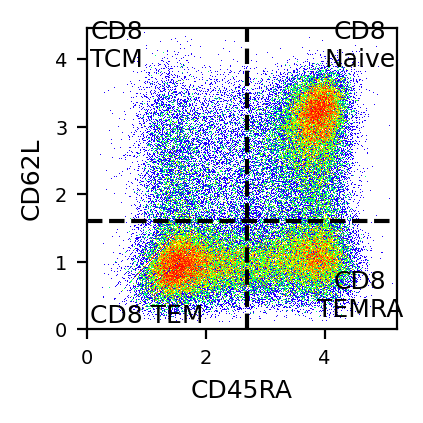

In [219]:
g1 = 'AB_CD45RA'
g2 = 'AB_CD62L'
g3 = 'AB_CD45RO'

s=1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers.loc[labels_raw=='CD8', :].copy()


x = dat[g1]
y = dat[g2]
z = dat[g3]
vmax = z.quantile(.995)


xthresh=2.7
ythresh=1.6
# ind = (x>xthresh) & (y>ythresh)
# labels_raw.loc[ind.index[ind]] = 'CD8 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels_raw.loc[ind.index[ind]] = 'CD8 TEMRA'
# ind = (x<xthresh) & (y>ythresh)
# labels_raw.loc[ind.index[ind]] = 'CD8 TCM'
# ind = (x<xthresh) & (y<ythresh)
# labels_raw.loc[ind.index[ind]] = 'CD8 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
# scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
# cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
# fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', '').replace('-1', ''), fontsize=cbarlab_fs, pad=-2)
# cbar_ax.set_xticks([0, vmax])
# cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]
xmax = xlim[1]

xspan = np.linspace(xthresh, xmax, 2)
yspan= np.linspace(ymin, ymax, 2)
ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')
# ax.set_xlim(xlim)
ax.text(4.6, 4.2, 'CD8\nNaive', fontsize=labfontsize, va='center', ha='center')
ax.text(4.6, 0.5, 'CD8\nTEMRA', fontsize=labfontsize, va='center', ha='center')
ax.text(0.5, 4.2, 'CD8\nTCM', fontsize=labfontsize, va='center', ha='center')
ax.text(1, 0.2, 'CD8 TEM', fontsize=labfontsize, va='center', ha='center')

# ax.set_xlim([0, xmax])
# ax.set_ylim([ymin, ymax])

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD8NaiveMem.png'))

In [ ]:
labels_raw.value_counts()

In [ ]:
labels_orig = labels_raw.copy()
labels_raw.value_counts()

In [ ]:
labels_raw = labels_orig.copy()
labels_raw.value_counts()

## Compare with published clustering

In [147]:
cluster_col = 'cell.type'

In [146]:
adata_RNA.obs.columns

Index(['alt.subject.id', 'visit', 'covid.diagnosis.start.date.to.sample.drawn',
       'group', 'sex', 'age', 'race', 'ethnicity', 'flu.vax.count.10yr',
       'vaccine', 'vaccine.side.effects', 'long.covid.symptoms', 'Batch',
       'nCount_RNA', 'nCount_HTO', 'nCount_CITE', 'nCount_RNA_largest.gene',
       'nCount_SCT', 'nFeature_RNA', 'nFeature_HTO', 'nFeature_CITE',
       'nFeature_SCT', 'percent.mt', 'percent.largest.gene',
       'coarse.cell.type', 'cell.type', 'HTO1', 'HTO2', 'HTO3', 'n_counts'],
      dtype='object')

labels_prot


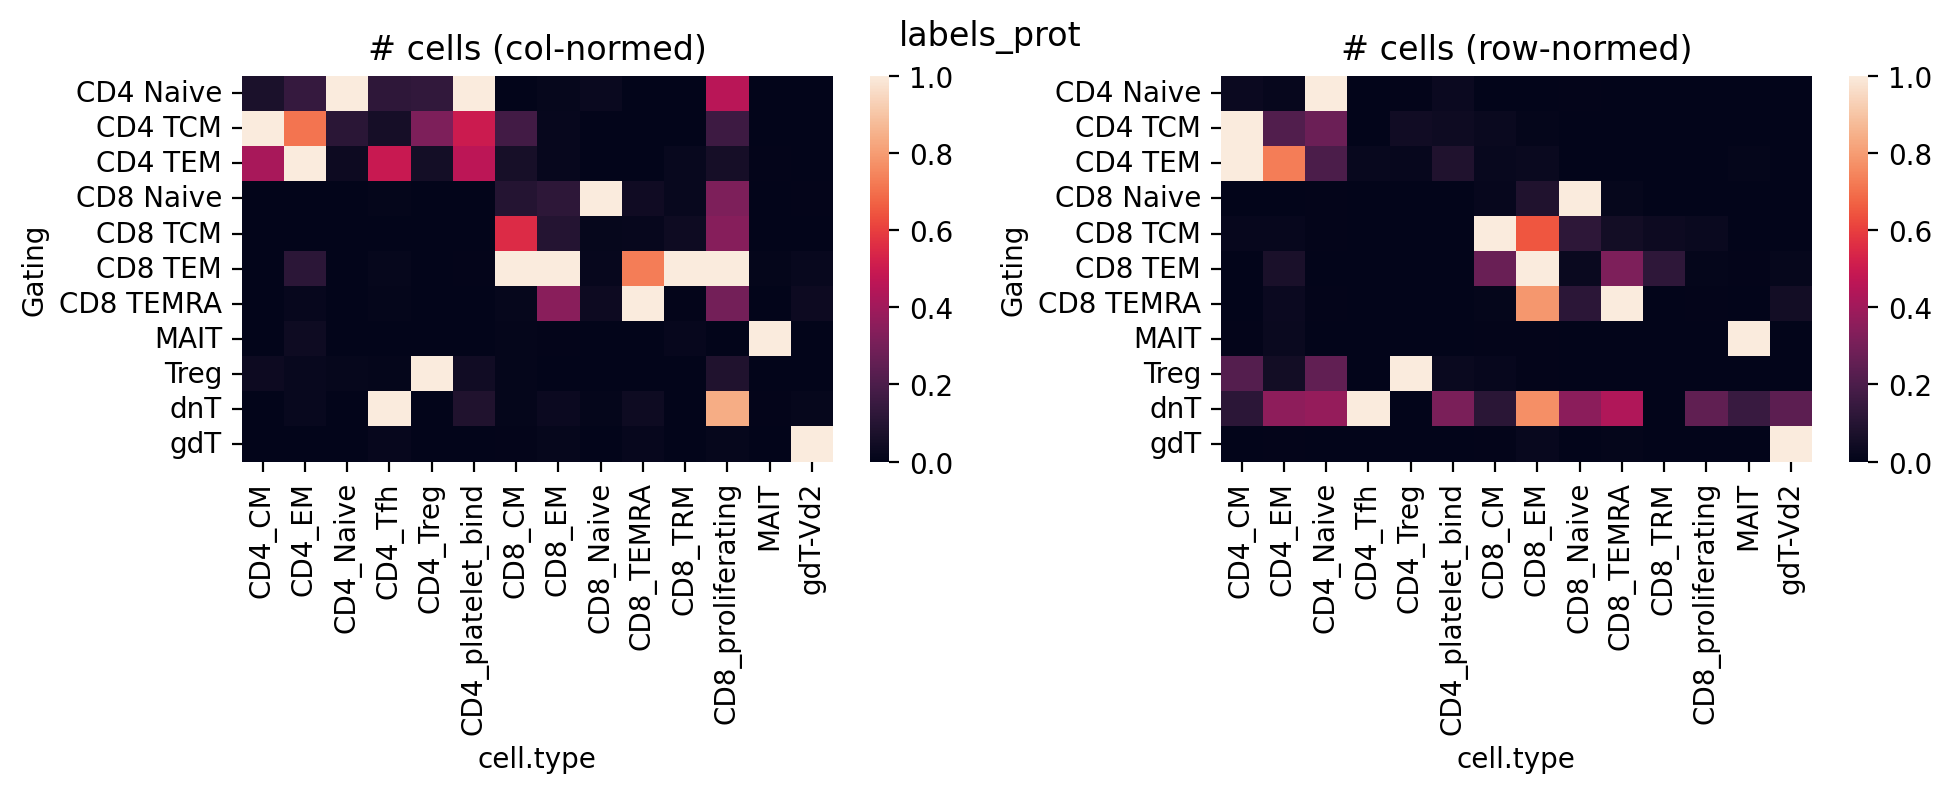

In [151]:
for (name, label) in {#'labels' : labels, 
 # 'labels_cd62l' : labels_cd62l, 
 # 'labels_sell' : labels_sell,
 # 'labels_ccr7_prot' : labels_ccr7_prot,
 'labels_prot' : labels_prot,
 # 'labels_raw' : labels_raw
}.items():
    print(name)
    
    ind = label.index
    label_clusters = pd.DataFrame({'label' : label, 
                                   cluster_col : adata_ADT[ind, :].obs[cluster_col]})
    label_clusters = pd.DataFrame(label_clusters.groupby(['label', cluster_col]).size().reset_index()).pivot(
        index = 'label', columns = cluster_col, values = 0)
    label_clusters = label_clusters.fillna(0)

    scaler = MinMaxScaler()
    col_scaled = scaler.fit_transform(label_clusters)
    row_scaled = scaler.fit_transform(label_clusters.T).T
    
    fig, ax = plt.subplots(ncols = 2, dpi = 200, figsize=(10, 4))
    sns.heatmap(col_scaled, xticklabels = label_clusters.columns, yticklabels = label_clusters.index,
               ax = ax[0])
    ax[0].set_title('# cells (col-normed)')
    ax[0].set_ylabel('Gating')
    ax[0].set_xlabel(cluster_col)

    sns.heatmap(row_scaled, xticklabels = label_clusters.columns, yticklabels = label_clusters.index,
               ax = ax[1])
    ax[1].set_title('# cells (row-normed)')
    # ax[1].set_yticklabels('')
    ax[1].set_ylabel('Gating')
    ax[1].set_xlabel(cluster_col)

    fig.tight_layout()
    plt.suptitle(name)
    plt.show()

In [ ]:
for (name, label) in {'labels' : labels, 
 'labels_cd62l' : labels_cd62l, 
 'labels_sell' : labels_sell,
 'labels_ccr7_prot' : labels_ccr7_prot,
 'labels_prot' : labels_prot,
 'labels_raw' : labels_raw}.items():
    print(name)
    ind = labels.index
    label_clusters = pd.DataFrame({'label' : label, 
                                   cluster_col : adata[ind, :].obs[cluster_col]})
    label_clusters = pd.DataFrame(label_clusters.groupby(['label', 'Annotation_minor_subset']).size().reset_index()).pivot(
        index = 'label', columns = 'Annotation_minor_subset', values = 0)
    label_clusters = label_clusters.fillna(0)



    fig, ax = plt.subplots(dpi = 200, figsize=(20, 16))
    sns.heatmap(label_clusters, xticklabels = label_clusters.columns, yticklabels = label_clusters.index,
               annot = True, ax = ax, annot_kws={"size": 8})
    ax.set_ylabel('Gating')
    ax.set_xlabel(cluster_col)
    # plt.suptitle(', '.join(label_pair))
    plt.show()

## Look at lineage marker violin plot

In [ ]:
adata_magic = sc.AnnData(X=markers_magic.values, var=pd.DataFrame(markers_magic.columns, index=markers_magic.columns, columns=['Gene']), obs=pd.DataFrame(labels, columns=['Gate']))

In [ ]:
markers_magic.columns

In [ ]:
markers_magic.columns

In [ ]:
adata_magic.obs

In [ ]:
set(genes) - set(markers_magic.columns)

In [ ]:
order = ['gdT','MAIT','Treg',
         'CD4 Naive',  'CD8 Naive',
          'CD4 TCM', 'CD8 TCM',         
         'CD4 TEM', 'CD8 TEM',
         'CD4 TEMRA', 'CD8 TEMRA', 'dnT']

genes = ['TRDC', 'TRGC1',
        'TRAC', 'TRBC1',         
         'AB_CD161', 'AB_TCR_Va7_2',
         'AB_CD4', 'AB_CD8',
        'FOXP3', 'IL2RA',
        'AB_CD45RA', 'AB_CD45RO',
        'SELL', 'CCR7', 'AB_CD27']


with rc_context({'figure.figsize': (8, 4), 'figure.dpi':200}):
    res = sc.pl.stacked_violin(adata_magic, var_names=genes, groupby='Gate',
                        categories_order=order,  swap_axes=True, return_fig=True)
    res.get_axes()['mainplot_ax'].set_xlabel('Gate')
    res.get_axes()['mainplot_ax'].set_ylabel('Marker')


In [ ]:
order = ['gdT','MAIT','Treg',
         'CD4 Naive',  'CD8 Naive',
          'CD4 TCM', 'CD8 TCM',         
         'CD4 TEM', 'CD8 TEM',
         'CD4 TEMRA', 'CD8 TEMRA', 'dnT']

genes = ['TRDC', 'TRGC1',
        'TRAC', 'TRBC1',         
         'AB_CD161', 'AB_TCR_Va7_2',
         'AB_CD4-1', 'AB_CD8',
        'FOXP3', 'IL2RA',
        'AB_CD45RA', 'AB_CD45RO',
        'SELL', 'CCR7', 'AB_CD27']


with rc_context({'figure.figsize': (8, 4), 'figure.dpi':200}):
    res = sc.pl.stacked_violin(adata_magic, var_names=genes, groupby='Gate',
                        categories_order=order,  swap_axes=True, return_fig=True)
    res.get_axes()['mainplot_ax'].set_xlabel('Gate')
    res.get_axes()['mainplot_ax'].set_ylabel('Marker')


In [ ]:
order = ['gdT','MAIT','Treg',
         'CD4 Naive',  'CD8 Naive',
          'CD4 TCM', 'CD8 TCM',         
         'CD4 TEM', 'CD8 TEM',
         'CD4 TEMRA', 'CD8 TEMRA', 'dnT']

genes = ['TRDC', 'TRGC1',
        'TRAC', 'TRBC1',         
         'AB_CD161', 'AB_TCR_Va7_2',
         'AB_CD4', 'AB_CD8',
        'FOXP3', 'IL2RA',
        'AB_CD45RA', 'AB_CD45RO',
        'SELL', 'CCR7', 'AB_CD27']


with rc_context({'figure.figsize': (8, 4), 'figure.dpi':200}):
    res = sc.pl.matrixplot(adata_magic, var_names=genes, groupby='Gate',
                        categories_order=order,  swap_axes=False, return_fig=True)
    res.get_axes()['mainplot_ax'].set_xlabel('Gate')
    res.get_axes()['mainplot_ax'].set_ylabel('Marker')


In [ ]:
polarization_label = pd.Series('Unclassified', index=label_th17.index)
polarization_label.loc[(label_th1!='Unclassified') & (label_th2!='Unclassified') & (label_th17!='Unclassified')] = 'Th1/Th2/Th17'
polarization_label.loc[(label_th1=='Unclassified') & (label_th2!='Unclassified') & (label_th17!='Unclassified')] = 'Th2/Th17'
polarization_label.loc[(label_th1!='Unclassified') & (label_th2=='Unclassified') & (label_th17!='Unclassified')] = 'Th1/Th17'
polarization_label.loc[(label_th1!='Unclassified') & (label_th2!='Unclassified') & (label_th17=='Unclassified')] = 'Th1/Th2'
polarization_label.loc[(label_th1!='Unclassified') & (label_th2=='Unclassified') & (label_th17=='Unclassified')] = 'Th1'
polarization_label.loc[(label_th1=='Unclassified') & (label_th2!='Unclassified') & (label_th17=='Unclassified')] = 'Th2'
polarization_label.loc[(label_th1=='Unclassified') & (label_th2=='Unclassified') & (label_th17!='Unclassified')] = 'Th17'
polarization_label.value_counts()

In [ ]:
polarization_label_sub = polarization_label.loc[polarization_label.isin(['Unclassified', 'Th17', 'Th2/Th17', 'Th1', 'Th2'])]

In [ ]:
adata_magic_sub = adata_magic[polarization_label_sub.index, :]
adata_magic_sub.obs['polarization'] = polarization_label_sub.values

In [ ]:
genes = ['CXCR3', 'CCR5', 'TBX21', 'GATA3', 'CCR4', 'IL4R', 'CCR6', 'RORA', 'CCL20', 'RORC']


with rc_context({'figure.figsize': (8, 4), 'figure.dpi':200}):
    res = sc.pl.matrixplot(adata_magic_sub, var_names=genes, groupby='polarization',
                         swap_axes=False, return_fig=True, standard_scale='var') #, categories_order=order, )
    res.get_axes()['mainplot_ax'].set_xlabel('Gate')
    res.get_axes()['mainplot_ax'].set_ylabel('Marker')


## Compare with usage

Meanm, column-normed usages like plot

In [ ]:
subset_avg_usage = usage.loc[labels.index, :].groupby(labels=='Subset').mean()

In [ ]:
with rc_context({'figure.dpi':200, 'font.size':5}):
    sns.heatmap(subset_avg_usage)


In [ ]:
subset_usage = usage.loc[labels.index, :]
# subset_usage['Subset'] = labels=='Subset'
subset_usage['Gating'] = labels

In [ ]:
with rc_context({'figure.dpi':200}):
    sns.catplot(x= 'Gating', y = 'value', col = 'variable',
                kind = 'violin', col_wrap = 1, height=2, aspect=2,
                sharey=False,
                data = subset_usage.melt(id_vars = ['Gating']))
    plt.xticks(rotation=90)

In [ ]:
with rc_context({'figure.dpi':200}):
    sns.catplot(x= 'Gating', y = 'value', col = 'variable',
                kind = 'violin', col_wrap = 1, height=2, aspect=2,
                sharey=False, scale = 'width',
                data = subset_usage.melt(id_vars = ['Gating']))
    plt.xticks(rotation=90)

In [ ]:
subset_usage.sample(100).melt(id_vars = ['Subset', 'Gating'])

In [ ]:
subset_usage.sample(2000).melt(id_vars = 'Subset')

In [ ]:
with rc_context({'figure.dpi':200}):
    sns.catplot(x= 'Subset', y = 'value', col = 'variable',
                kind = 'violin', col_wrap = 1, height=2, aspect=2,
                sharey=False,
                data = subset_usage.melt(id_vars = 'Subset'))

In [ ]:
excluded_geps = usage.columns[usage.columns.str.contains('Doublet')].tolist()
gep_order = [#'CD4_Naive', 
            'Translation', 
             'CD8_Naive', 'Treg', 'gdT', 'MAIT', 'CD4_CM-2', 'Th2', 'Th17',
             'CD8_CD160high',
             'NK-like',
             '?AB_CD278/ACTG1',
             'dnT',
             'Cytotoxic', 'Cytoskeleton',
            'CellCycle_S', 'CellCycle_G2M', 'CellCycle_Histone', 'CellCycle_Histone2', 'CellCycle_Histone3',
             'HLA',
             'ISG', 'Mito', 'PoorQuality', 'IEG'

            ]
#set(usage.columns).difference(excluded_geps)


# ['CD4_Naive', 'CD8_Naive', 'Treg', 'gdT', 'MAIT',
#              'CD4_CM-1','Th2', 'Effector_Memory',  'Th17', 
#               'CD8_CD160high', 
#              '?KLRC2/GNLY',
#              '?NK-Like',  '?BCL2/CDK6', 
#          '?AB_CD278/ACTG1',
#         '?ANXA1/MYADM', 
#        '?SOX4/MME',  'dnT/IL10+CD38+', 
#         'Cytotoxic', 'Cytoskeleton',
#         'CellCycle_S', 'CellCycle_G2M', 'CellCycle_Histone',
#         'Translation', 'HLA', '?MTRNR2L12', '?TXNIP/H3F3B',  
#           'ISG', 'Mito', 'PoorQuality', 'IEG', 'IEG2'
#        ]


# lineages = ['CD4_Naive', 'CD8_Naive', 'Treg', 'gdT', 'MAIT',
#              'CD4_CM-1','Th2', 'Effector_Memory',  'Th17', 
#               'CD8_CD160high', 
#              '?KLRC2/GNLY',
#              '?NK-Like']

# non_lineages = [  '?BCL2/CDK6', 
#          '?AB_CD278/ACTG1',
#         '?ANXA1/MYADM', 
#        '?SOX4/MME',  'dnT/IL10+CD38+', 
#         'Cytotoxic', 'Cytoskeleton',
#         'CellCycle_S', 'CellCycle_G2M', 'CellCycle_Histone',
#         'Translation', 'HLA', '?MTRNR2L12', '?TXNIP/H3F3B',  
#           'ISG', 'Mito', 'PoorQuality', 'IEG', 'IEG2'
#        ]


gate_order = ['CD4 Naive',  'CD8 Naive', 'Treg', 'gdT','MAIT',
          'CD4 TCM', 'CD4 TEM', 'CD4 TEMRA', 
         'CD8 TCM', 'CD8 TEM',
         'CD8 TEMRA', 'dnT']


excluded = []

#dat = hao_usage_norm.groupby(label).mean()
dat = usage.groupby(labels).mean()
#dat = dat.div(dat.std(axis=0), axis=1)
#dat['CellCycle_Histone'] = 0

#dat_norm = dat.subtract(dat.min(axis=0), axis=1)
#dat_norm = dat_norm.div(dat_norm.max(axis=0), axis=1)
#dat_norm = dat.div(dat.sum(axis=0), axis=1)

(fig,ax) = plt.subplots(1,1, figsize=(6,5), dpi=200)
sns.heatmap(dat.loc[gate_order, gep_order], ax=ax, xticklabels=True)
_ = ax.set_xticklabels(gep_order, fontsize=8)
ax.set_title('Median usage by manually\ngated subsets')
ax.set_ylabel('Gated subset')
ax.set_xlabel('Gene expression program')

In [ ]:
dat = usage.groupby(labels).mean()
dat_norm = dat.subtract(dat.min(axis=0), axis=1)
dat_norm = dat_norm.div(dat_norm.max(axis=0), axis=1)


In [ ]:

(fig,ax) = plt.subplots(1,1, figsize=(6,5), dpi=200)
sns.heatmap(dat_norm.loc[gate_order, gep_order], ax=ax, xticklabels=True)
_ = ax.set_xticklabels(gep_order, fontsize=8)
ax.set_title('Mean, col-normed usage by manually\ngated subsets')
ax.set_ylabel('Gated subset')
ax.set_xlabel('Gene expression program')

### labels

In [ ]:
dataset = 'Covid (COMBAT)'
clus_df.loc[[metaprg for metaprg in clus_df.index if 
 dataset in clus_df.loc[metaprg, ].str.split(':').str[0].tolist()], :]

In [ ]:
%pprint
sorted(pd.DataFrame([(metaprg, ''.join([subprg for subprg in clus_df.loc[(metaprg), ].dropna() 
                                                if dataset in subprg]).replace(dataset + ':', '')) 
              for metaprg in clus_df.index], columns = ['meta_prg', 'dataset_prg'])['dataset_prg'].tolist(),
       reverse=True)

In [ ]:
(name, label) = ('labels', labels)

# Subset to just Hao programs for comparison, rename columns to match Hao
dat = usage.copy()
dat = dat.groupby(label).mean()
dat = dat.div(dat.std(axis=0), axis=1)


lineages = ['Translation', 'CD8_Naive', 'Treg', 'gdT', 'MAIT',
             '?AB_CD278/ACTG1','Th2', #'Effector_Memory',  
              'CD8_CD160high', 
             # '?KLRC2/GNLY',
             'NK-like']

non_lineages = [  #'?BCL2/CDK6', 
         # '?AB_CD278/ACTG1',
                'Th17', 
        '?CCR10/LMNA', 
       # '?SOX4/MME',  
                'dnT', 
        'Cytotoxic', 'Cytoskeleton',
        'CellCycle_S', 'CellCycle_G2M', 'CellCycle_Histone',
        'Metallothionein',
        # 'Translation', 
                'HLA', #'?MTRNR2L12', '?TXNIP/H3F3B',  
          'ISG', 'Mito', 'PoorQuality', 'IEG', 'HeatShock'
       ]

excluded_geps = ['Doublet_RBC', 'Doublet_Platelet', 'Doublet_Plasmablast', 'Doublet_Myeloid']

gate_order = ['CD4 Naive',  'CD8 Naive', 'Treg', 'gdT','MAIT',
          'CD4 TCM', 'CD4 TEM', 'CD4 TEMRA', 
         'CD8 TCM', 'CD8 TEM',
         'CD8 TEMRA', 
              'dnT']

rename_map = {'?AB_CD278/ACTG1':'CD4 CM', 
              # 'Effector_Memory':'CD4 EM', 
              'CD8_CD160high':'CD8 EM',
              # '?KLRC2/GNLY':'KIR Effector', 
              'NK-Like':'NK-Like Effector', 
             #  '?BCL2/CDK6':'Pro-survival',
             # '?AB_CD278/ACTG1':'ICOS+ Act.', 
              'dnT':'IL10+ Act.'
             }

fig_width = 6
fig_height = 4
wspace = .1
left_space = 1
left_frac = left_space / fig_width
top_space = .5
top_frac = 1-(top_space / fig_height)
bottom_space = 1.3
bottom_frac = bottom_space / fig_height

nlineages = len(lineages)
nnonlineages = len(non_lineages)
ntotal = nlineages + nnonlineages
lineage_width = (fig_width - wspace - left_space) * (nlineages / ntotal)
nonlineage_width = (fig_width - wspace - left_space) * (nnonlineages / ntotal)

fig = plt.figure(figsize=(fig_width,fig_height), dpi=200)
gs = GridSpec(1, 2, figure=fig, wspace=wspace, left=left_frac, bottom=bottom_frac, top=top_frac,
              width_ratios=[lineage_width, nonlineage_width])
ax1 = fig.add_subplot(gs[0], xticks=[], yticks=[])
ax2 = fig.add_subplot(gs[1], xticks=[], yticks=[])
ax = fig.add_subplot(gs[:], xticks=[], yticks=[], frameon=False)


#dat['CellCycle_Histone'] = 0
sns.heatmap(dat.loc[gate_order, lineages].rename(rename_map, axis=1),
            ax=ax1, xticklabels=True, cbar=False, cmap='rocket')
ax1.set_xlabel('')


sns.heatmap(dat.loc[gate_order, non_lineages].rename(rename_map, axis=1),
            ax=ax2, xticklabels=True, yticklabels=False, cbar=False, cmap='rocket')
ax2.set_xlabel('')

ax1.set_ylabel('Manually gated subsets')
ax.set_xlabel('GEP', labelpad=100)
ax.set_title('Smoothed RNA + Protein Markers')

# plt.savefig('test.png')

In [ ]:
usage.columns

In [ ]:
(name, label) = ('labels', labels)

# Subset to just Hao programs for comparison, rename columns to match Hao
dat = usage.copy()
dat = dat.groupby(label).mean()
dat = dat.div(dat.std(axis=0), axis=1)


lineages = ['Translation', 'CD8_Naive', 'Treg', 'gdT', 'MAIT',
             '?AB_CD278/ACTG1', 'CD4_CM-2','Th2', #'Effector_Memory',  
              'CD8_CD160high', 
             # '?KLRC2/GNLY',
             'NK-like']

non_lineages = [  #'?BCL2/CDK6', 
         # '?AB_CD278/ACTG1',
                'Th17', 
        '?CCR10/LMNA', 'AB_CD86/TIMD4',
       # '?SOX4/MME',  
                'dnT', 
        'Cytotoxic', 'Cytoskeleton',
        'CellCycle_S', 'CellCycle_G2M', 'CellCycle_Histone',
        'Metallothionein',
        # 'Translation', 
                'HLA', #'?MTRNR2L12', '?TXNIP/H3F3B',  
          'ISG', 'Mito', 'PoorQuality', 'IEG', 'HeatShock'
       ]

excluded_geps = ['Doublet_RBC', 'Doublet_Platelet', 'Doublet_Plasmablast', 'Doublet_Myeloid']

gate_order = ['CD4 Naive',  'CD8 Naive', 'Treg', 'gdT','MAIT',
          'CD4 TCM', 'CD4 TEM', 'CD4 TEMRA', 
         'CD8 TCM', 'CD8 TEM',
         'CD8 TEMRA', 
              'dnT']

rename_map = {'?AB_CD278/ACTG1':'CD4 CM', 
              # 'Effector_Memory':'CD4 EM', 
              'CD8_CD160high':'CD8 EM',
              # '?KLRC2/GNLY':'KIR Effector', 
              'NK-Like':'NK-Like Effector', 
             #  '?BCL2/CDK6':'Pro-survival',
             # '?AB_CD278/ACTG1':'ICOS+ Act.', 
              'dnT':'IL10+ Act.'
             }

fig_width = 6
fig_height = 4
wspace = .1
left_space = 1
left_frac = left_space / fig_width
top_space = .5
top_frac = 1-(top_space / fig_height)
bottom_space = 1.3
bottom_frac = bottom_space / fig_height

nlineages = len(lineages)
nnonlineages = len(non_lineages)
ntotal = nlineages + nnonlineages
lineage_width = (fig_width - wspace - left_space) * (nlineages / ntotal)
nonlineage_width = (fig_width - wspace - left_space) * (nnonlineages / ntotal)

fig = plt.figure(figsize=(fig_width,fig_height), dpi=200)
gs = GridSpec(1, 2, figure=fig, wspace=wspace, left=left_frac, bottom=bottom_frac, top=top_frac,
              width_ratios=[lineage_width, nonlineage_width])
ax1 = fig.add_subplot(gs[0], xticks=[], yticks=[])
ax2 = fig.add_subplot(gs[1], xticks=[], yticks=[])
ax = fig.add_subplot(gs[:], xticks=[], yticks=[], frameon=False)


#dat['CellCycle_Histone'] = 0
sns.heatmap(dat.loc[gate_order, lineages].rename(rename_map, axis=1),
            ax=ax1, xticklabels=True, cbar=False, cmap='rocket')
ax1.set_xlabel('')


sns.heatmap(dat.loc[gate_order, non_lineages].rename(rename_map, axis=1),
            ax=ax2, xticklabels=True, yticklabels=False, cbar=False, cmap='rocket')
ax2.set_xlabel('')

ax1.set_ylabel('Manually gated subsets')
ax.set_xlabel('GEP', labelpad=100)
ax.set_title('Smoothed RNA + Protein Markers')

# plt.savefig('test.png')

In [ ]:
list(set(usage.columns).difference(lineages + excluded_geps))

In [ ]:
non_lineages + excluded_geps

In [ ]:
fig_width

In [ ]:
(name, label) = ('labels', labels)

# Subset to just Hao programs for comparison, rename columns to match Hao
dat = usage.copy()
dat = dat.groupby(label).mean()
dat = dat.div(dat.std(axis=0), axis=1)


lineages = ['Translation', 'CD8_Naive', 'Treg', 'gdT', 'MAIT',
             '?AB_CD278/ACTG1','Th2', #'Effector_Memory',  
              'CD8_CD160high', 
             # '?KLRC2/GNLY',
             'NK-like']


excluded_geps = ['Doublet_RBC', 'Doublet_Platelet', 'Doublet_Plasmablast', 'Doublet_Myeloid']
non_lineages = list(set(usage.columns).difference(lineages + excluded_geps))

gate_order = ['CD4 Naive',  'CD8 Naive', 'Treg', 'gdT','MAIT',
          'CD4 TCM', 'CD4 TEM', 'CD4 TEMRA', 
         'CD8 TCM', 'CD8 TEM',
         'CD8 TEMRA', 
              'dnT']

rename_map = {'?AB_CD278/ACTG1':'CD4 CM', 
              # 'Effector_Memory':'CD4 EM', 
              'CD8_CD160high':'CD8 EM',
              # '?KLRC2/GNLY':'KIR Effector', 
              'NK-Like':'NK-Like Effector', 
             #  '?BCL2/CDK6':'Pro-survival',
             # '?AB_CD278/ACTG1':'ICOS+ Act.', 
              'dnT':'IL10+ Act.'
             }

fig_width = 6
fig_height = 4
wspace = .1
left_space = 1
left_frac = left_space / fig_width
top_space = .5
top_frac = 1-(top_space / fig_height)
bottom_space = 1.3
bottom_frac = bottom_space / fig_height

nlineages = len(lineages)
nnonlineages = len(non_lineages)
ntotal = nlineages + nnonlineages
lineage_width = (fig_width - wspace - left_space) * (nlineages / ntotal)
nonlineage_width = (fig_width - wspace - left_space) * (nnonlineages / ntotal)

fig = plt.figure(figsize=(fig_width,fig_height), dpi=200)
gs = GridSpec(1, 2, figure=fig, wspace=wspace, left=left_frac, bottom=bottom_frac, top=top_frac,
              width_ratios=[lineage_width, nonlineage_width])
ax1 = fig.add_subplot(gs[0], xticks=[], yticks=[])
ax2 = fig.add_subplot(gs[1], xticks=[], yticks=[])
ax = fig.add_subplot(gs[:], xticks=[], yticks=[], frameon=False)


#dat['CellCycle_Histone'] = 0
sns.heatmap(dat.loc[gate_order, lineages].rename(rename_map, axis=1),
            ax=ax1, xticklabels=True, cbar=False, cmap='rocket')
ax1.set_xlabel('')


sns.heatmap(dat.loc[gate_order, non_lineages].rename(rename_map, axis=1),
            ax=ax2, xticklabels=True, yticklabels=False, cbar=False, cmap='rocket')
ax2.set_xlabel('')

ax1.set_ylabel('Manually gated subsets')
ax.set_xlabel('GEP', labelpad=100)
ax.set_title('Smoothed RNA + Protein Markers')

# plt.savefig('test.png')

In [ ]:
fig = plt.figure(figsize=(20,fig_height), dpi=200)
sns.heatmap(dat)

### labels_prot

In [ ]:
dataset = 'Covid (COMBAT)'
clus_df.loc[[metaprg for metaprg in clus_df.index if 
 dataset in clus_df.loc[metaprg, ].str.split(':').str[0].tolist()], :]

In [ ]:
%pprint
sorted(pd.DataFrame([(metaprg, ''.join([subprg for subprg in clus_df.loc[(metaprg), ].dropna() 
                                                if dataset in subprg]).replace(dataset + ':', '')) 
              for metaprg in clus_df.index], columns = ['meta_prg', 'dataset_prg'])['dataset_prg'].tolist(),
       reverse=True)

In [ ]:
(name, label) = ('labels_prot', labels_prot)

# Subset to just Hao programs for comparison, rename columns to match Hao
dat = usage.copy()
dat = dat.groupby(label).mean()
dat = dat.div(dat.std(axis=0), axis=1)


lineages = ['Translation', 'CD8_Naive', 'Treg', 'gdT', 'MAIT',
             '?AB_CD278/ACTG1','Th2', #'Effector_Memory',  
              'CD8_CD160high', 
             # '?KLRC2/GNLY',
             'NK-like']

non_lineages = [  #'?BCL2/CDK6', 
         # '?AB_CD278/ACTG1',
                'Th17', 
        '?CCR10/LMNA', 
       # '?SOX4/MME',  
                'dnT', 
        'Cytotoxic', 'Cytoskeleton',
        'CellCycle_S', 'CellCycle_G2M', 'CellCycle_Histone',
        'Metallothionein',
        # 'Translation', 
                'HLA', #'?MTRNR2L12', '?TXNIP/H3F3B',  
          'ISG', 'Mito', 'PoorQuality', 'IEG', 'HeatShock'
       ]

excluded_geps = ['Doublet_RBC', 'Doublet_Platelet', 'Doublet_Plasmablast', 'Doublet_Myeloid']

gate_order = ['CD4 Naive',  'CD8 Naive', 'Treg', 'gdT','MAIT',
          'CD4 TCM', 'CD4 TEM', 'CD4 TEMRA', 
         'CD8 TCM', 'CD8 TEM',
         'CD8 TEMRA', 
              'dnT']

rename_map = {'?AB_CD278/ACTG1':'CD4 CM', 
              # 'Effector_Memory':'CD4 EM', 
              'CD8_CD160high':'CD8 EM',
              # '?KLRC2/GNLY':'KIR Effector', 
              'NK-Like':'NK-Like Effector', 
             #  '?BCL2/CDK6':'Pro-survival',
             # '?AB_CD278/ACTG1':'ICOS+ Act.', 
              'dnT':'IL10+ Act.'
             }

fig_width = 6
fig_height = 4
wspace = .1
left_space = 1
left_frac = left_space / fig_width
top_space = .5
top_frac = 1-(top_space / fig_height)
bottom_space = 1.3
bottom_frac = bottom_space / fig_height

nlineages = len(lineages)
nnonlineages = len(non_lineages)
ntotal = nlineages + nnonlineages
lineage_width = (fig_width - wspace - left_space) * (nlineages / ntotal)
nonlineage_width = (fig_width - wspace - left_space) * (nnonlineages / ntotal)

fig = plt.figure(figsize=(fig_width,fig_height), dpi=200)
gs = GridSpec(1, 2, figure=fig, wspace=wspace, left=left_frac, bottom=bottom_frac, top=top_frac,
              width_ratios=[lineage_width, nonlineage_width])
ax1 = fig.add_subplot(gs[0], xticks=[], yticks=[])
ax2 = fig.add_subplot(gs[1], xticks=[], yticks=[])
ax = fig.add_subplot(gs[:], xticks=[], yticks=[], frameon=False)


#dat['CellCycle_Histone'] = 0
sns.heatmap(dat.loc[gate_order, lineages].rename(rename_map, axis=1),
            ax=ax1, xticklabels=True, cbar=False, cmap='rocket')
ax1.set_xlabel('')


sns.heatmap(dat.loc[gate_order, non_lineages].rename(rename_map, axis=1),
            ax=ax2, xticklabels=True, yticklabels=False, cbar=False, cmap='rocket')
ax2.set_xlabel('')

ax1.set_ylabel('Manually gated subsets')
ax.set_xlabel('GEP', labelpad=100)
ax.set_title(name)

# plt.savefig('test.png')

In [ ]:
(name, label) = ('labels_prot', labels_prot)

# Subset to just Hao programs for comparison, rename columns to match Hao
dat = usage.copy()
dat = dat.groupby(label).mean()
dat = dat.div(dat.std(axis=0), axis=1)


lineages = ['Translation', 'CD8_Naive', 'Treg', 'gdT', 'MAIT',
             '?AB_CD278/ACTG1','Th2', #'Effector_Memory',  
              'CD8_CD160high', 
             # '?KLRC2/GNLY',
             'NK-like']

non_lineages = [  #'?BCL2/CDK6', 
         # '?AB_CD278/ACTG1',
                'Th17', 
        '?CCR10/LMNA', 
       # '?SOX4/MME',  
                'dnT', 
        'Cytotoxic', 'Cytoskeleton',
        'CellCycle_S', 'CellCycle_G2M', 'CellCycle_Histone',
        'Metallothionein',
        # 'Translation', 
                'HLA', #'?MTRNR2L12', '?TXNIP/H3F3B',  
          'ISG', 'Mito', 'PoorQuality', 'IEG', 'HeatShock'
       ]

excluded_geps = ['Doublet_RBC', 'Doublet_Platelet', 'Doublet_Plasmablast', 'Doublet_Myeloid']

gate_order = ['CD4 Naive',  'CD8 Naive', 'Treg', 'gdT','MAIT',
          'CD4 TCM', 'CD4 TEM', 'CD4 TEMRA', 
         'CD8 TCM', 'CD8 TEM',
         # 'CD8 TEMRA', 
              'dnT', 'DPT']

rename_map = {'?AB_CD278/ACTG1':'CD4 CM', 
              # 'Effector_Memory':'CD4 EM', 
              'CD8_CD160high':'CD8 EM',
              # '?KLRC2/GNLY':'KIR Effector', 
              'NK-Like':'NK-Like Effector', 
             #  '?BCL2/CDK6':'Pro-survival',
             # '?AB_CD278/ACTG1':'ICOS+ Act.', 
              'dnT':'IL10+ Act.'
             }

fig_width = 6
fig_height = 4
wspace = .1
left_space = 1
left_frac = left_space / fig_width
top_space = .5
top_frac = 1-(top_space / fig_height)
bottom_space = 1.3
bottom_frac = bottom_space / fig_height

nlineages = len(lineages)
nnonlineages = len(non_lineages)
ntotal = nlineages + nnonlineages
lineage_width = (fig_width - wspace - left_space) * (nlineages / ntotal)
nonlineage_width = (fig_width - wspace - left_space) * (nnonlineages / ntotal)

fig = plt.figure(figsize=(fig_width,fig_height), dpi=200)
gs = GridSpec(1, 2, figure=fig, wspace=wspace, left=left_frac, bottom=bottom_frac, top=top_frac,
              width_ratios=[lineage_width, nonlineage_width])
ax1 = fig.add_subplot(gs[0], xticks=[], yticks=[])
ax2 = fig.add_subplot(gs[1], xticks=[], yticks=[])
ax = fig.add_subplot(gs[:], xticks=[], yticks=[], frameon=False)


#dat['CellCycle_Histone'] = 0
sns.heatmap(dat.loc[gate_order, lineages].rename(rename_map, axis=1),
            ax=ax1, xticklabels=True, cbar=False, cmap='rocket')
ax1.set_xlabel('')


sns.heatmap(dat.loc[gate_order, non_lineages].rename(rename_map, axis=1),
            ax=ax2, xticklabels=True, yticklabels=False, cbar=False, cmap='rocket')
ax2.set_xlabel('')

ax1.set_ylabel('Manually gated subsets')
ax.set_xlabel('GEP', labelpad=100)
ax.set_title(name)

# plt.savefig('test.png')

In [ ]:
dat

In [ ]:
cbar_ax = ax.inset_axes([0.1, .85, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
# cbar_ax.set_title(g3.replace('AB_', ''), fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)


In [ ]:
vmax = 

In [ ]:
(name, label) = ('labels_prot', labels_prot)

# Subset to just Hao programs for comparison, rename columns to match Hao
dat = tcat_filt.copy()
dat = dat.groupby(label).mean()
dat = dat.div(dat.std(axis=0), axis=1)

gep_order = ['CD4_Naive', 'CD8_Naive', 'Treg', 'gdT', 'MAIT',
             'CD4_CM-1','Th2', 'Effector_Memory',  'Th17', 
              'CD8_CD160high', 
             '?KLRC2/GNLY',
             '?NK-Like',  '?BCL2/CDK6', 
         '?AB_CD278/ACTG1',
        '?ANXA1/MYADM', 
       '?SOX4/MME',  'dnT/IL10+CD38+', 
        'Cytotoxic', 'Cytoskeleton',
        'CellCycle_S', 'CellCycle_G2M', 'CellCycle_Histone',
        'Translation', 'HLA', '?MTRNR2L12', '?TXNIP/H3F3B',  
          'ISG', 'Mito', 'PoorQuality', 'IEG', 'IEG2'
       ]


lineages = ['CD4_Naive', 'CD8_Naive', 'Treg', 'gdT', 'MAIT',
             'CD4_CM-1','Th2', 'Effector_Memory',  'Th17', 
              'CD8_CD160high', 
             '?KLRC2/GNLY',
             '?NK-Like']

non_lineages = [  '?BCL2/CDK6', 
         '?AB_CD278/ACTG1',
        '?ANXA1/MYADM', 
       '?SOX4/MME',  'dnT/IL10+CD38+', 
        'Cytotoxic', 'Cytoskeleton',
        'CellCycle_S', 'CellCycle_G2M', 'CellCycle_Histone',
        'Translation', 'HLA', #'?MTRNR2L12', '?TXNIP/H3F3B',  
          'ISG', 'Mito', 'PoorQuality', 'IEG', 'IEG2'
       ]

excluded_geps = ['Doublet_Myeloid','Doublet_Plasmablast', 'Doublet_Platelet',  'Doublet_RBC',
                '?MTRNR2L12', '?TXNIP/H3F3B']

gate_order = ['CD4 Naive',  'CD8 Naive', 'Treg', 'gdT','MAIT',
          'CD4 TCM', 'CD4 TEM', 'CD4 TEMRA', 
         'CD8 TCM', 'CD8 TEM',
         'CD8 TEMRA', 'dnT']

rename_map = {'CD4_CM-1':'CD4 CM', 'Effector_Memory':'CD4 EM', 'CD8_CD160high':'CD8 EM',
              '?KLRC2/GNLY':'KIR Effector', '?NK-Like':'NK-Like Effector', '?BCL2/CDK6':'Pro-survival',
             '?AB_CD278/ACTG1':'ICOS+ Act.', 'dnT/IL10+CD38+':'IL10+ Act.'}

fig_width = 6
fig_height = 4
wspace = .1
left_space = 1
left_frac = left_space / fig_width
top_space = .5
top_frac = 1-(top_space / fig_height)
bottom_space = 1.3
bottom_frac = bottom_space / fig_height

nlineages = len(lineages)
nnonlineages = len(non_lineages)
ntotal = nlineages + nnonlineages
lineage_width = (fig_width - wspace - left_space) * (nlineages / ntotal)
nonlineage_width = (fig_width - wspace - left_space) * (nnonlineages / ntotal)

fig = plt.figure(figsize=(fig_width,fig_height), dpi=200)
gs = GridSpec(1, 2, figure=fig, wspace=wspace, left=left_frac, bottom=bottom_frac, top=top_frac,
              width_ratios=[lineage_width, nonlineage_width])
ax1 = fig.add_subplot(gs[0], xticks=[], yticks=[])
ax2 = fig.add_subplot(gs[1], xticks=[], yticks=[])
ax = fig.add_subplot(gs[:], xticks=[], yticks=[], frameon=False)


#dat['CellCycle_Histone'] = 0
sns.heatmap(dat.loc[gate_order, lineages].rename(rename_map, axis=1),
            ax=ax1, xticklabels=True, cbar=False, cmap='rocket')
ax1.set_xlabel('')


sns.heatmap(dat.loc[gate_order, non_lineages].rename(rename_map, axis=1),
            ax=ax2, xticklabels=True, yticklabels=False, cbar=False, cmap='rocket')
ax2.set_xlabel('')

ax1.set_ylabel('Manually gated subsets')
ax.set_xlabel('GEP', labelpad=100)
ax.set_title(name)

# plt.savefig('test.png')

In [ ]:
gep_order = ['CD4_Naive', 'CD8_Naive', 'Treg', 'gdT', 'MAIT',
             'CD4_CM-1','Th2', 'Effector_Memory',  'Th17', 
              'CD8_CD160high', 
             '?KLRC2/GNLY',
             '?NK-Like',  '?BCL2/CDK6', 
         '?AB_CD278/ACTG1',
        '?ANXA1/MYADM', 
       '?SOX4/MME',  'dnT/IL10+CD38+', 
        'Cytotoxic', 'Cytoskeleton',
        'CellCycle_S', 'CellCycle_G2M', 'CellCycle_Histone',
        'Translation', 'HLA', '?MTRNR2L12', '?TXNIP/H3F3B',  
          'ISG', 'Mito', 'PoorQuality', 'IEG', 'IEG2'
       ]


lineages = ['CD4_Naive', 'CD8_Naive', 'Treg', 'gdT', 'MAIT',
             'CD4_CM-1','Th2', 'Effector_Memory',  'Th17', 
              'CD8_CD160high', 
             '?KLRC2/GNLY',
             '?NK-Like']

non_lineages = [  '?BCL2/CDK6', 
         '?AB_CD278/ACTG1',
        '?ANXA1/MYADM', 
       '?SOX4/MME',  'dnT/IL10+CD38+', 
        'Cytotoxic', 'Cytoskeleton',
        'CellCycle_S', 'CellCycle_G2M', 'CellCycle_Histone',
        'Translation', 'HLA', '?MTRNR2L12', '?TXNIP/H3F3B',  
          'ISG', 'Mito', 'PoorQuality', 'IEG', 'IEG2'
       ]

excluded_geps = ['Doublet_Myeloid','Doublet_Plasmablast', 'Doublet_Platelet',  'Doublet_RBC']

gate_order = ['CD4 Naive',  'CD8 Naive', 'Treg', 'gdT','MAIT',
          'CD4 TCM', 'CD4 TEM', 'CD4 TEMRA', 
         'CD8 TCM', 'CD8 TEM',
         'CD8 TEMRA', 'dnT']

rename_map = {'CD4_CM-1':'CD4 CM', 'Effector_Memory':'CD4 EM', 'CD8_CD160high':'CD8 EM',
              '?KLRC2/GNLY':'KIR Effector', '?NK-Like':'NK-Like Effector', '?BCL2/CDK6':'Pro-survival',
             '?AB_CD278/ACTG1':'ICOS+ Act.', 'dnT/IL10+CD38+':'IL10+ Act.'}

fig_width = 6
fig_height = 4
wspace = .1
left_space = 1
left_frac = left_space / fig_width
top_space = .5
top_frac = 1-(top_space / fig_height)
bottom_space = 1.3
bottom_frac = bottom_space / fig_height

nlineages = len(lineages)
nnonlineages = len(non_lineages)
ntotal = nlineages + nnonlineages
lineage_width = (fig_width - wspace - left_space) * (nlineages / ntotal)
nonlineage_width = (fig_width - wspace - left_space) * (nnonlineages / ntotal)

fig = plt.figure(figsize=(fig_width,fig_height), dpi=200)
gs = GridSpec(1, 2, figure=fig, wspace=wspace, left=left_frac, bottom=bottom_frac, top=top_frac,
              width_ratios=[lineage_width, nonlineage_width])
ax1 = fig.add_subplot(gs[0], xticks=[], yticks=[])
ax2 = fig.add_subplot(gs[1], xticks=[], yticks=[])
ax = fig.add_subplot(gs[:], xticks=[], yticks=[], frameon=False)


dat = usage.groupby(labels).mean()
dat = dat.div(dat.std(axis=0), axis=1)
#dat['CellCycle_Histone'] = 0
sns.heatmap(dat.loc[gate_order, lineages].rename(rename_map, axis=1),
            ax=ax1, xticklabels=True, cbar=False, cmap='rocket')


sns.heatmap(dat.loc[gate_order, non_lineages].rename(rename_map, axis=1),
            ax=ax2, xticklabels=True, yticklabels=False, cbar=False, cmap='rocket')

ax1.set_ylabel('Manually gated subsets')
ax.set_xlabel('GEP', labelpad=100)
plt.savefig('test.png')

In [ ]:
fig_width = 6
fig_height = 4
wspace = .1
left_space = .5
left_frac = left_space / fig_width
nlineages = len(lineages)
nnonlineages = len(non_lineages)
ntotal = nlineages + nnonlineages
lineage_width = (fig_width - wspace - left_space) * (nlineages / ntotal)
nonlineage_width = (fig_width - wspace - left_space) * (nnonlineages / ntotal)

fig = plt.figure(figsize=(fig_width,fig_height), dpi=200)
gs = GridSpec(1, 2, figure=fig, wspace=wspace, left=left_frac, width_ratios=[lineage_width, nonlineage_width])
ax1 = fig.add_subplot(gs[0], xticks=[], yticks=[])
ax2 = fig.add_subplot(gs[1], xticks=[], yticks=[])

dat = usage.groupby(labels).mean()
sns.heatmap(dat.loc[gate_order, lineages].rename(rename_map, axis=1),
            ax=ax1, xticklabels=True, cbar=False, cmap='rocket')


sns.heatmap(dat.loc[gate_order, non_lineages].rename(rename_map, axis=1),
            ax=ax2, xticklabels=True, yticklabels=False, cbar=False, cmap='rocket')

In [ ]:
gep_order = ['CD4_Naive', 'CD8_Naive', 'Treg', 'gdT', 'MAIT',
             'CD4_CM-1','Th2', 'Effector_Memory',  'Th17', 
              'CD8_CD160high', 
             '?KLRC2/GNLY',
             '?NK-Like',  '?BCL2/CDK6', 
         '?AB_CD278/ACTG1',
        '?ANXA1/MYADM', 
       '?SOX4/MME',  'dnT/IL10+CD38+', 
        'Cytotoxic', 'Cytoskeleton',
        'CellCycle_S', 'CellCycle_G2M', 'CellCycle_Histone',
        'Translation', 'HLA', '?MTRNR2L12', '?TXNIP/H3F3B',  
          'ISG', 'Mito', 'PoorQuality', 'IEG', 'IEG2'
       ]


lineages = ['CD4_Naive', 'CD8_Naive', 'Treg', 'gdT', 'MAIT',
             'CD4_CM-1','Th2', 'Effector_Memory',  'Th17', 
              'CD8_CD160high', 
             '?KLRC2/GNLY',
             '?NK-Like']

non_lineages = [  '?BCL2/CDK6', 
         '?AB_CD278/ACTG1',
        '?ANXA1/MYADM', 
       '?SOX4/MME',  'dnT/IL10+CD38+', 
        'Cytotoxic', 'Cytoskeleton',
        'CellCycle_S', 'CellCycle_G2M', 'CellCycle_Histone',
        'Translation', 'HLA', '?MTRNR2L12', '?TXNIP/H3F3B',  
          'ISG', 'Mito', 'PoorQuality', 'IEG', 'IEG2'
       ]

excluded_geps = ['Doublet_Myeloid','Doublet_Plasmablast', 'Doublet_Platelet',  'Doublet_RBC']


#dat = hao_usage_norm.groupby(label).mean()
dat = usage.loc[polarization_label_sub.index,:].groupby(polarization_label_sub).mean()
dat = dat.loc[:, gep_order].rename(rename_map, axis=1)
#dat_norm = dat.subtract(dat.min(axis=0), axis=1)
#dat_norm = dat_norm.div(dat_norm.max(axis=0), axis=1)
#dat_norm = dat.div(dat.sum(axis=0), axis=1)

(fig,ax) = plt.subplots(1,1, figsize=(6,5), dpi=200)
sns.heatmap(dat, ax=ax, xticklabels=True)
_ = ax.set_xticklabels(dat.columns, fontsize=8)
ax.set_title('Median usage by manually\ngated subsets')
ax.set_ylabel('Gated subset')
ax.set_xlabel('Gene expression program')

In [ ]:
g = 'CD4_CM-1'
ind = labels.index[labels.isin(['CD4 TCM', 'CD4 TEM'])]
(fig,axes) = plt.subplots(1,2, figsize=(7,3), dpi=200)
vmax = usage.loc[ind, g].quantile(.999)
cim = axes[0].scatter(markers_magic.loc[ind, 'SELL'], markers_magic.loc[ind, 'CCR7'],
                      s=1, edgecolor='None', c=usage.loc[ind, g], vmax=vmax)

b=1.5
m = -1.1

xmin = -.4
ylim = axes[0].get_ylim()
xlim = axes[0].get_xlim()
xspan = np.linspace(xmin, xlim[1], 2)
yspan = xspan*m + b
axes[0].plot(xspan, yspan, color='k')
axes[0].set_xlim(xlim)
axes[0].set_ylim(ylim)
axes[0].set_title(g)

cbar_ax = axes[0].inset_axes([0.05, .85, 0.15, 0.04], transform=axes[0].transAxes, )
fig.colorbar(cim, ax=axes[0], cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

g = 'Effector_Memory'
vmax = usage.loc[ind, g].quantile(.999)
cim = axes[1].scatter(markers_magic.loc[ind, 'SELL'], markers_magic.loc[ind, 'CCR7'], s=1, edgecolor='None', c=usage.loc[ind, g], vmax=vmax)

axes[1].plot(xspan, yspan, color='k')
axes[1].set_xlim(xlim)
axes[1].set_ylim(ylim)
axes[1].set_title(g)

cbar_ax = axes[1].inset_axes([0.15, .85, 0.15, 0.04], transform=axes[1].transAxes, )
fig.colorbar(cim, ax=axes[1], cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

In [ ]:
g = 'Th17'
ind = labels.index[labels.isin(['CD4 TCM', 'CD4 TEM'])]
(fig,axes) = plt.subplots(1,2, figsize=(7,3), dpi=200)
vmax = usage.loc[ind, g].quantile(.999)
cim = axes[0].scatter(markers_magic.loc[ind, 'SELL'], markers_magic.loc[ind, 'CCR7'],
                      s=1, edgecolor='None', c=usage.loc[ind, g], vmax=vmax)

b=1.5
m = -1.1

xmin = -.4
ylim = axes[0].get_ylim()
xlim = axes[0].get_xlim()
xspan = np.linspace(xmin, xlim[1], 2)
yspan = xspan*m + b
axes[0].plot(xspan, yspan, color='k')
axes[0].set_xlim(xlim)
axes[0].set_ylim(ylim)
axes[0].set_title(g)

cbar_ax = axes[0].inset_axes([0.05, .85, 0.15, 0.04], transform=axes[0].transAxes, )
fig.colorbar(cim, ax=axes[0], cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

g = 'Cytotoxic'
vmax = usage.loc[ind, g].quantile(.999)
cim = axes[1].scatter(markers_magic.loc[ind, 'SELL'], markers_magic.loc[ind, 'CCR7'], s=1, edgecolor='None', c=usage.loc[ind, g], vmax=vmax)

axes[1].plot(xspan, yspan, color='k')
axes[1].set_xlim(xlim)
axes[1].set_ylim(ylim)
axes[1].set_title(g)

cbar_ax = axes[1].inset_axes([0.15, .85, 0.15, 0.04], transform=axes[1].transAxes, )
fig.colorbar(cim, ax=axes[1], cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

In [ ]:
g = 'Th2'
ind = labels.index[labels.isin(['CD4 TCM', 'CD4 TEM'])]
(fig,axes) = plt.subplots(1,2, figsize=(7,3), dpi=200)
vmax = usage.loc[ind, g].quantile(.999)
cim = axes[0].scatter(markers_magic.loc[ind, 'SELL'], markers_magic.loc[ind, 'CCR7'],
                      s=1, edgecolor='None', c=usage.loc[ind, g], vmax=vmax)

b=1.5
m = -1.1

xmin = -.4
ylim = axes[0].get_ylim()
xlim = axes[0].get_xlim()
xspan = np.linspace(xmin, xlim[1], 2)
yspan = xspan*m + b
axes[0].plot(xspan, yspan, color='k')
axes[0].set_xlim(xlim)
axes[0].set_ylim(ylim)
axes[0].set_title(g)

cbar_ax = axes[0].inset_axes([0.05, .85, 0.15, 0.04], transform=axes[0].transAxes, )
fig.colorbar(cim, ax=axes[0], cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

g = '?AB_CD278/ACTG1'
vmax = usage.loc[ind, g].quantile(.999)
cim = axes[1].scatter(markers_magic.loc[ind, 'SELL'], markers_magic.loc[ind, 'CCR7'], s=1, edgecolor='None', c=usage.loc[ind, g], vmax=vmax)

axes[1].plot(xspan, yspan, color='k')
axes[1].set_xlim(xlim)
axes[1].set_ylim(ylim)
axes[1].set_title(g)

cbar_ax = axes[1].inset_axes([0.15, .85, 0.15, 0.04], transform=axes[1].transAxes, )
fig.colorbar(cim, ax=axes[1], cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(g, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

In [ ]:
g = 'Th17'
ind = labels.index[labels.isin(['CD4 TCM', 'CD4 TEM'])]
(fig,axes) = plt.subplots(1,2, figsize=(7,3), dpi=200)
vmax = usage.loc[ind, g].quantile(.999)
cim = axes[0].scatter(markers_magic.loc[ind, 'SELL'], markers_magic.loc[ind, 'CCR7'], s=1, edgecolor='None', c=usage.loc[ind, g], vmax=vmax)

b=1.5
m = -1.1

xmin = -.4
ylim = axes[0].get_ylim()
xlim = axes[0].get_xlim()
xspan = np.linspace(xmin, xlim[1], 2)
yspan = xspan*m + b
axes[0].plot(xspan, yspan, color='k')
axes[0].set_xlim(xlim)
axes[0].set_ylim(ylim)




g = 'Cytotoxic'
vmax = usage.loc[ind, g].quantile(.999)
cim = axes[1].scatter(markers_magic.loc[ind, 'SELL'], markers_magic.loc[ind, 'CCR7'], s=1, edgecolor='None', c=usage.loc[ind, g], vmax=vmax)

axes[1].plot(xspan, yspan, color='k')
axes[1].set_xlim(xlim)
axes[1].set_ylim(ylim)

In [ ]:
g1 = 'GATA3'
g2 = 'CCR4'
g3 = 'IL4R'
s=2
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8


fig = plt.figure(constrained_layout=False, figsize=(3., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.9, top=.92)
ax = fig.add_subplot(gs[0])


dat = markers_magic.loc[labels.isin(['CD4 TCM', 'CD4 TEM', 'CD4 TEMRA', 'CD8 TCM', 'CD8 TEM', 'CD8 TEMRA', 'CD4 Naive', 'CD8 Naive']), :]
x = dat[g1]
y = dat[g2]
z = dat[g3]

b=2.5
m = -(2.5/2)
ind = y > (x*m)+b 
label_th2.loc[ind] = 'Th2'

xspan = np.linspace(0, 3, 2)
yspan = xspan*m + b

dat['label'] = labels.loc[dat.index]
for (k,g) in dat.groupby('label'):
    ax.scatter(g[g1],g[g2], edgecolor='None', s=s, label=k)
    

ax.set_xlabel(g1 + ' RNA', fontsize=labfontsize)
ax.set_ylabel(g2 + ' RNA', fontsize=labfontsize)

ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.plot(xspan, yspan, linestyle='--', color='k')
ax.set_xlim([0, xlim[1]])
ax.set_ylim([0, ylim[1]])
ax.text(4, 2.5, 'Th2', fontsize=labfontsize, va='center', ha='center')
ax.tick_params(labelsize=ticklabfontsize)
ax.legend(bbox_to_anchor=(1,1), fontsize=6, markerscale=3)

In [ ]:
dat['label'] = labels.loc[dat.index]

In [ ]:
markers_magic['CCR7']>((markers_magic['SELL']*m) + b)

In [ ]:
ind = labels.isin(['CD4 TCM', 'CD4 TEM']) & (markers_magic.loc[:, 'CCR7']<.02)
sns.clustermap(usage.loc[ind,:], vmax=.5)

In [ ]:
ind = labels.isin(['CD4 TCM', 'CD4 TEM']) & (markers_magic.loc[:, 'CCR7']>.02) & (markers_magic['CCR7']<((markers_magic['SELL']*m) + b))
sns.clustermap(usage.loc[ind,:], vmax=0.5)

In [ ]:
ind = labels.isin(['CD4 TCM', 'CD4 TEM']) & (markers_magic['CCR7']>((markers_magic['SELL']*m) + b))
sns.clustermap(usage.loc[ind,:], vmax=0.5)

In [ ]:
ind = labels.isin(['CD4 Naive'])
sns.clustermap(usage.loc[ind,:], vmax=0.5)

In [ ]:
g = 'Cytotoxic'
ind = labels.index[labels.isin(['CD4 TCM', 'CD4 TEM'])]
(fig,axes) = plt.subplots(1,2, figsize=(7,3), dpi=200)
vmax = usage.loc[ind, g].quantile(.999)
cim = axes[0].scatter(markers_magic.loc[ind, 'SELL'], (markers_magic.loc[ind, 'CCR7']+1e-3).apply(np.log10), s=1, edgecolor='None', c=usage.loc[ind, g], vmax=vmax)

g = 'Effector_Memory'
vmax = usage.loc[ind, g].quantile(.999)
cim = axes[1].scatter(markers_magic.loc[ind, 'SELL'], (markers_magic.loc[ind, 'CCR7']+1e-3).apply(np.log10), s=1, edgecolor='None', c=usage.loc[ind, g], vmax=vmax)


In [ ]:
usage.loc[ind,:].corrwith((markers_magic.loc[ind, 'CCR7']+1e-3).apply(np.log10)).sort_values()

In [ ]:
Blues = plt.get_cmap('Blues')
Blues(0)

In [ ]:
ind = labels.index[labels=='dnT']
sns.clustermap(markers_magic.loc[ind, :], yticklabels=False, xticklabels=True, row_colors=[Blues(x) for x in usage.loc[ind, 'dnT/IL10+CD38+']])

In [ ]:
ind = labels.index[labels=='dnT']
sns.clustermap(usage.loc[ind, :], yticklabels=False, xticklabels=True, row_colors=[Blues(x) for x in usage.loc[ind, 'dnT/IL10+CD38+']])

In [ ]:
usage.loc[ind, 'dnT/IL10+CD38+']

In [ ]:
adata = sc.read('../../Data/HaoEtAl_PBMC/haoetal_pbmc_multimodal.merged.T.ADT_70.20221022.RNA_and_ADT.VarNorm.HVG.HarmonyGeneCorrect.h5ad')

In [ ]:
adata.obs['Gate'] = labels.loc[adata.obs.index]

In [ ]:
sc.tl.rank_genes_groups(adata,groupby='Gate')

In [ ]:
sc.pl.matrixplot(adata, var_names=['AB_CD3-1', 'AB_CD4-1', 'AB_CD8', 'AB_CD11b-1', 'AB_CD62P', 'AB_CD31', 'TRDC', 'CD84'], groupby='Gate',
                         swap_axes=True)

In [ ]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)

In [ ]:
'AB_CD11b-1', 'AB_CD31', 'AB_CD62P', 'AB_CD93', 'AB_CD314'

In [ ]:
label.to_csv('../../Data/HaoEtAl_PBMC/Manual_Gating_LogScale_20230211.tsv', sep='\t')

In [ ]:
import os
os.path.abspath('../../Data/HaoEtAl_PBMC/Manual_Gating_LogScale_20230211.tsv')

In [ ]:
g = 'CD4_CM-1'
ind = label.index[label.isin(['CD4 TCM', 'CD4 TEM'])]
(fig,axes) = plt.subplots(1,2, figsize=(7,3), dpi=200)
vmax = usage.loc[ind, g].quantile(.999)
cim = axes[0].scatter(markers_magic.loc[ind, 'SELL'], markers_magic.loc[ind, 'CCR7'], s=1, edgecolor='None', c=usage.loc[ind, g], vmax=vmax)

g = 'Effector_Memory'
vmax = usage.loc[ind, g].quantile(.999)
cim = axes[1].scatter(markers_magic.loc[ind, 'SELL'], markers_magic.loc[ind, 'CCR7'], s=1, edgecolor='None', c=usage.loc[ind, g], vmax=vmax)


In [ ]:
g = 'CD4_CM-1'
ind = label.index[label.isin(['CD8 TCM', 'CD8 TEM'])]
(fig,axes) = plt.subplots(1,2, figsize=(7,3), dpi=200)
vmax = usage.loc[ind, g].quantile(.999)
cim = axes[0].scatter(markers_magic.loc[ind, 'SELL'], markers_magic.loc[ind, 'CCR7'], s=1, edgecolor='None', c=usage.loc[ind, g], vmax=vmax)

g = 'Effector_Memory'
vmax = usage.loc[ind, g].quantile(.999)
cim = axes[1].scatter(markers_magic.loc[ind, 'SELL'], markers_magic.loc[ind, 'CCR7'], s=1, edgecolor='None', c=usage.loc[ind, g], vmax=vmax)


In [ ]:
g = 'CD4_CM-1'
ind = label.index[label.isin(['CD8 TCM', 'CD8 TEM'])]
(fig,axes) = plt.subplots(1,2, figsize=(7,3), dpi=200)
vmax = usage.loc[ind, g].quantile(.999)
cim = axes[0].scatter(markers_magic.loc[ind, 'AB_CD27'], markers_magic.loc[ind, 'CCR7'], s=1, edgecolor='None', c=usage.loc[ind, g], vmax=vmax)

g = 'Effector_Memory'
vmax = usage.loc[ind, g].quantile(.999)
cim = axes[1].scatter(markers_magic.loc[ind, 'AB_CD27'], markers_magic.loc[ind, 'CCR7'], s=1, edgecolor='None', c=usage.loc[ind, g], vmax=vmax)

In [ ]:
markers_magic.loc[ind, 'AB_CD45RA'].mean(), markers_magic.loc[ind, 'AB_CD45RO'].mean()

In [ ]:
g = 'CD4_Naive'
ind = label.index[label.isin(['CD4 TCM', 'CD4 TEM'])]
(fig,axes) = plt.subplots(1,2, figsize=(7,3), dpi=200)
vmax = usage.loc[ind, g].quantile(.999)
cim = axes[0].scatter(markers_magic.loc[ind, 'SELL'], markers_magic.loc[ind, 'CCR7'], s=1, edgecolor='None', c=usage.loc[ind, g], vmax=vmax)
vmax

In [ ]:
vmax

In [ ]:
ind = label.index[label.isin(['CD4 TCM', 'CD4 TEM'])]
usage.loc[ind, :].corrwith(markers_magic.loc[ind, 'CCR7']).sort_values(ascending=False)

In [ ]:
ind = label.index[label.isin(['CD8 TCM', 'CD8 TEM'])]
usage.loc[ind, :].corrwith(markers_magic.loc[ind, 'CCR7']).sort_values(ascending=False)

In [ ]:
gep_order = [ 'gdT', 'MAIT', 'Treg', 'CD4_Naive', 'CD8_Naive',
             'Th17', 'Th2',  'CD8_CD160high', 'CD4_CM-1',
             '?KLRC2/GNLY','Effector_Memory',
             '?NK-Like', 'Cytotoxic', 'Cytoskeleton', '?BCL2/CDK6', 'IEG', 
         '?AB_CD278/ACTG1',
        '?ANXA1/MYADM', 
       '?SOX4/MME', 'ISG', 'HLA', 'dnT/IL10+CD38+', 'CellCycle_S',
        'CellCycle_G2M', 'CellCycle_Histone', 
        'Translation', 'Mito', '?MTRNR2L12', '?TXNIP/H3F3B',  'PoorQuality', 
         'IEG2','Doublet_Myeloid',
        
         'Doublet_Plasmablast',
      
        'Doublet_Platelet', 
       'Doublet_RBC'
       ]

order = ['gdT','MAIT','Treg',
         'CD4 Naive',  'CD8 Naive',
          'CD4 TCM', 'CD8 TCM',         
         'CD4 TEM', 'CD8 TEM',
         'CD4 TEMRA', 'CD8 TEMRA', 'dnT']


excluded = []

#dat = hao_usage_norm.groupby(label).mean()
dat = usage.loc[polarization_label_sub.index,:].groupby(polarization_label_sub).mean()
#dat_norm = dat.subtract(dat.min(axis=0), axis=1)
#dat_norm = dat_norm.div(dat_norm.max(axis=0), axis=1)
#dat_norm = dat.div(dat.sum(axis=0), axis=1)

(fig,ax) = plt.subplots(1,1, figsize=(6,5), dpi=200)
sns.heatmap(dat.loc[:, gep_order], ax=ax, xticklabels=True)
_ = ax.set_xticklabels(gep_order, fontsize=8)
ax.set_title('Median usage by manually\ngated subsets')
ax.set_ylabel('Gated subset')
ax.set_xlabel('Gene expression program')

In [ ]:
hao_spectra_scores = pd.read_csv("/data/srlab1/dk718/Tcell_cNMF_Comparison/Data/HaoEtAl_PBMC/T_learnHarmonyRNA_RefitBoth_20221022/T_learnHarmonyRNA_RefitBoth_20221022.gene_spectra_score.k_35.dt_0_2.labeled.txt", sep='\t', index_col=0)
hao_spectra_scores['?AB_CD278/ACTG1'].sort_values(ascending=False).head(50)

In [ ]:
hao_spectra_scores.loc['TBX21', :].sort_values(ascending=False)

In [ ]:
usage.loc[label_th1.index, :].groupby(label_th1).mean().T.sort_values(by='Th1', ascending=False)

### Compare with TCAT usage

Since TCAT programs include more traditional TCM, TEM programs, maybe can use this to benchmark.

In [ ]:
# (name, label) = ('labels_ccr7_prot', labels_ccr7_prot)

# # Subset to just Hao programs for comparison, rename columns to match Hao
# dat = tcat_filt.copy()
# dat = dat.groupby(label).mean()
# dat = dat.div(dat.std(axis=0), axis=1)

# gep_order = ['CD4_Naive', 'CD8_Naive', 'Treg', 'gdT', 'MAIT',
#              'CD4_CM-1','Th2', 'Effector_Memory',  'Th17', 
#               'CD8_CD160high', 
#              '?KLRC2/GNLY',
#              '?NK-Like',  '?BCL2/CDK6', 
#          '?AB_CD278/ACTG1',
#         '?ANXA1/MYADM', 
#        '?SOX4/MME',  'dnT/IL10+CD38+', 
#         'Cytotoxic', 'Cytoskeleton',
#         'CellCycle_S', 'CellCycle_G2M', 'CellCycle_Histone',
#         'Translation', 'HLA', '?MTRNR2L12', '?TXNIP/H3F3B',  
#           'ISG', 'Mito', 'PoorQuality', 'IEG', 'IEG2'
#        ]


# lineages = ['CD4_Naive', 'CD8_Naive', 'Treg', 'gdT', 'MAIT',
#              'CD4_CM-1','Th2', 'Effector_Memory',  'Th17', 
#               'CD8_CD160high', 
#              '?KLRC2/GNLY',
#              '?NK-Like']

# non_lineages = [  '?BCL2/CDK6', 
#          '?AB_CD278/ACTG1',
#         '?ANXA1/MYADM', 
#        '?SOX4/MME',  'dnT/IL10+CD38+', 
#         'Cytotoxic', 'Cytoskeleton',
#         'CellCycle_S', 'CellCycle_G2M', 'CellCycle_Histone',
#         'Translation', 'HLA', #'?MTRNR2L12', '?TXNIP/H3F3B',  
#           'ISG', 'Mito', 'PoorQuality', 'IEG', 'IEG2'
#        ]

# excluded_geps = ['Doublet_Myeloid','Doublet_Plasmablast', 'Doublet_Platelet',  'Doublet_RBC',
#                 '?MTRNR2L12', '?TXNIP/H3F3B']

# gate_order = ['CD4 Naive',  'CD8 Naive', 'Treg', 'gdT','MAIT',
#           'CD4 TCM', 'CD4 TEM', 'CD4 TEMRA', 
#          'CD8 TCM', 'CD8 TEM',
#          'CD8 TEMRA', 'dnT']

# rename_map = {'CD4_CM-1':'CD4 CM', 'Effector_Memory':'CD4 EM', 'CD8_CD160high':'CD8 EM',
#               '?KLRC2/GNLY':'KIR Effector', '?NK-Like':'NK-Like Effector', '?BCL2/CDK6':'Pro-survival',
#              '?AB_CD278/ACTG1':'ICOS+ Act.', 'dnT/IL10+CD38+':'IL10+ Act.'}

# fig_width = 6
# fig_height = 4
# wspace = .1
# left_space = 1
# left_frac = left_space / fig_width
# top_space = .5
# top_frac = 1-(top_space / fig_height)
# bottom_space = 1.3
# bottom_frac = bottom_space / fig_height

# nlineages = len(lineages)
# nnonlineages = len(non_lineages)
# ntotal = nlineages + nnonlineages
# lineage_width = (fig_width - wspace - left_space) * (nlineages / ntotal)
# nonlineage_width = (fig_width - wspace - left_space) * (nnonlineages / ntotal)

# fig = plt.figure(figsize=(fig_width,fig_height), dpi=200)
# gs = GridSpec(1, 2, figure=fig, wspace=wspace, left=left_frac, bottom=bottom_frac, top=top_frac,
#               width_ratios=[lineage_width, nonlineage_width])
# ax1 = fig.add_subplot(gs[0], xticks=[], yticks=[])
# ax2 = fig.add_subplot(gs[1], xticks=[], yticks=[])
# ax = fig.add_subplot(gs[:], xticks=[], yticks=[], frameon=False)


# #dat['CellCycle_Histone'] = 0
# sns.heatmap(dat.loc[gate_order, lineages].rename(rename_map, axis=1),
#             ax=ax1, xticklabels=True, cbar=False, cmap='rocket')


# sns.heatmap(dat.loc[gate_order, non_lineages].rename(rename_map, axis=1),
#             ax=ax2, xticklabels=True, yticklabels=False, cbar=False, cmap='rocket')

# ax1.set_ylabel('Manually gated subsets')
# ax.set_xlabel('GEP', labelpad=100)
# # plt.savefig('test.png')

In [ ]:
dat.max().max()

In [ ]:
g1 = 'AB_CD4'
g2 = 'AB_CD8'
prg = 'Th17'

s=0.1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[-labels_prot.str.contains('gdT|MAIT'), :].copy()


x = dat[g1]
y = dat[g2]
z = tcat_filt.loc[dat.index, prg]
vmax = z.quantile(.995)

xthresh = 1.5
ythresh = 1.25
ind = (x>xthresh)
# labels_prot.loc[ind.index[ind]] = 'CD4'
# ind = (x<xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8'
# ind = (x<xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'dnT'
           
fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

# dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.7, .85, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(prg, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)



ylim = ax.get_ylim()
xlim = ax.get_xlim()

xspan = np.linspace(xthresh, xlim[1], 2)
yspan= np.linspace(0, ythresh, 2)
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')

xspan = np.linspace(xlim[0], 2.5, 2)
yspan= np.linspace(ythresh, ylim[1], 2)
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')

ax.text(2.6, .95, 'CD4', fontsize=labfontsize, va='center', ha='center')
ax.text(1, 2.5, 'CD8', fontsize=labfontsize, va='center', ha='center')
ax.text(.8, .2, 'dnT', fontsize=labfontsize, va='center', ha='center')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4andCD8.png'))

In [ ]:
g1 = 'AB_CD4'
g2 = 'AB_CD8'
prg = 'Th2'

s=0.1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[-labels_prot.str.contains('gdT|MAIT'), :].copy()


x = dat[g1]
y = dat[g2]
z = tcat_usage.loc[dat.index, prg]
vmax = z.quantile(.995)

xthresh = 1.5
ythresh = 1.25
ind = (x>xthresh)
# labels_prot.loc[ind.index[ind]] = 'CD4'
# ind = (x<xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8'
# ind = (x<xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'dnT'
           
fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

# dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.7, .85, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(prg, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)



ylim = ax.get_ylim()
xlim = ax.get_xlim()

xspan = np.linspace(xthresh, xlim[1], 2)
yspan= np.linspace(0, ythresh, 2)
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')

xspan = np.linspace(xlim[0], 2.5, 2)
yspan= np.linspace(ythresh, ylim[1], 2)
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')

ax.text(2.6, .95, 'CD4', fontsize=labfontsize, va='center', ha='center')
ax.text(1, 2.5, 'CD8', fontsize=labfontsize, va='center', ha='center')
ax.text(.8, .2, 'dnT', fontsize=labfontsize, va='center', ha='center')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4andCD8.png'))

In [ ]:
g1 = 'AB_CD4'
g2 = 'AB_CD8'
prg = 'Th2'

s=0.1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[-labels.str.contains('gdT|MAIT|CD4'), :].copy()


x = dat[g1]
y = dat[g2]
z = tcat_usage.loc[dat.index, prg]
vmax = z.quantile(.995)

xthresh = 1.5
ythresh = 1.25
ind = (x>xthresh)
# labels_prot.loc[ind.index[ind]] = 'CD4'
# ind = (x<xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8'
# ind = (x<xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'dnT'
           
fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

# dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.7, .85, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(prg, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)



ylim = ax.get_ylim()
xlim = ax.get_xlim()

xspan = np.linspace(xthresh, xlim[1], 2)
yspan= np.linspace(0, ythresh, 2)
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')

xspan = np.linspace(xlim[0], 2.5, 2)
yspan= np.linspace(ythresh, ylim[1], 2)
ax.plot(xspan, [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')

ax.text(2.6, .95, 'CD4', fontsize=labfontsize, va='center', ha='center')
ax.text(1, 2.5, 'CD8', fontsize=labfontsize, va='center', ha='center')
ax.text(.8, .2, 'dnT', fontsize=labfontsize, va='center', ha='center')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4andCD8.png'))

In [ ]:
max(tcat_filt[prg])

In [ ]:
g1 = 'AB_CD45RA'
g2 = 'AB_CD62L'
prg = 'Th2'

s=0.1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[-labels.str.contains('gdT|MAIT|CD4'), :].copy()


x = dat[g1]
y = dat[g2]
z = tcat_usage.loc[dat.index, prg]
vmax = z.quantile(.9)


xthresh=2.7
ythresh=1.4
# ind = (x>xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TEMRA'
# ind = (x<xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TCM'
# ind = (x<xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

# dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.2, .89, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(prg, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]
xmax = xlim[1]

xspan = np.linspace(xthresh, xmax, 2)
yspan= np.linspace(ymin, ymax, 2)
ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')
# ax.set_xlim(xlim)
ax.text(3.8, 3.2, 'CD8\nNaive', fontsize=labfontsize, va='center', ha='center')
ax.text(3.6, 0.5, 'CD8\nTEMRA', fontsize=labfontsize, va='center', ha='center')
ax.text(2.3, 3.2, 'CD8\nTCM', fontsize=labfontsize, va='center', ha='center')
ax.text(1.7, 0.4, 'CD8 TEM', fontsize=labfontsize, va='center', ha='center')

# ax.set_xlim([0, xmax])
# ax.set_ylim([ymin, ymax])

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD8NaiveMem.png'))

In [ ]:
g1 = 'AB_CD45RA'
g2 = 'AB_CD62L'
prg = 'Th2'

s=0.1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[-labels_prot.str.contains('gdT|MAIT|CD8'), :].copy()


x = dat[g1]
y = dat[g2]
z = tcat_usage.loc[dat.index, prg]
vmax = z.quantile(.9)


xthresh=2.7
ythresh=1.4
# ind = (x>xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TEMRA'
# ind = (x<xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TCM'
# ind = (x<xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

# dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.2, .89, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(prg, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]
xmax = xlim[1]

xspan = np.linspace(xthresh, xmax, 2)
yspan= np.linspace(ymin, ymax, 2)
ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')
# ax.set_xlim(xlim)
ax.text(3.8, 3.2, 'CD8\nNaive', fontsize=labfontsize, va='center', ha='center')
ax.text(3.6, 0.5, 'CD8\nTEMRA', fontsize=labfontsize, va='center', ha='center')
ax.text(2.3, 3.2, 'CD8\nTCM', fontsize=labfontsize, va='center', ha='center')
ax.text(1.7, 0.4, 'CD8 TEM', fontsize=labfontsize, va='center', ha='center')

# ax.set_xlim([0, xmax])
# ax.set_ylim([ymin, ymax])

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD8NaiveMem.png'))

In [ ]:
g1 = 'AB_CD45RA'
g2 = 'AB_CD62L'
prg = 'CD8_Naive'

s=0.1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[-labels_prot.str.contains('gdT|MAIT|CD8'), :].copy()


x = dat[g1]
y = dat[g2]
z = tcat_filt.loc[dat.index, prg]
vmax = z.quantile(.9)


xthresh=2.7
ythresh=1.4
# ind = (x>xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TEMRA'
# ind = (x<xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TCM'
# ind = (x<xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD8 TEM'



fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

# dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.2, .89, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(prg, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]
xmax = xlim[1]

xspan = np.linspace(xthresh, xmax, 2)
yspan= np.linspace(ymin, ymax, 2)
ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')
# ax.set_xlim(xlim)
ax.text(3.8, 3.2, 'CD8\nNaive', fontsize=labfontsize, va='center', ha='center')
ax.text(3.6, 0.5, 'CD8\nTEMRA', fontsize=labfontsize, va='center', ha='center')
ax.text(2.3, 3.2, 'CD8\nTCM', fontsize=labfontsize, va='center', ha='center')
ax.text(1.7, 0.4, 'CD8 TEM', fontsize=labfontsize, va='center', ha='center')

# ax.set_xlim([0, xmax])
# ax.set_ylim([ymin, ymax])

ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD8NaiveMem.png'))

In [ ]:
g1 = 'AB_CD45RA'
g2 = 'AB_CD62L'
prg = 'CD4_Naive'

s=0.1
labfontsize=9
ticklabfontsize=7
cbarlab_fs = 8
dat = markers_magic.loc[-labels_prot.str.contains('gdT|MAIT|CD8'), :].copy()


x = dat[g1]
y = dat[g2]
z = tcat_filt.loc[dat.index, prg]
vmax = z.quantile(.995)


xthresh = 2.2
ythresh = 1.5
# ind = (x>xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD4 Naive'
# ind = (x>xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD4 TEMRA'
# ind = (x<xthresh) & (y>ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD4 TCM'
# ind = (x<xthresh) & (y<ythresh)
# labels_prot.loc[ind.index[ind]] = 'CD4 TEM'


fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
ax = fig.add_subplot(gs[0])

# dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
scim = ax.scatter(x,y, edgecolor='None', s=s, c=z, vmin=0, vmax=vmax)
ax.set_xlabel(g1.replace('AB_', '').replace('-1', ''), fontsize=labfontsize)
ax.set_ylabel(g2.replace('AB_', ''), fontsize=labfontsize)
cbar_ax = ax.inset_axes([.08, .85, 0.15, 0.04], transform=ax.transAxes, )
fig.colorbar(scim, ax=ax, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_title(prg, fontsize=cbarlab_fs, pad=-2)
cbar_ax.set_xticks([0, vmax])
cbar_ax.set_xticklabels([0, '%.1f' % vmax], fontsize=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ymin = ylim[0]
ymax = ylim[1]
xmin = xlim[0]#2.2
xmax = xlim[1]



ax.plot([xmin, xmax], [ythresh, ythresh], linestyle='--', color='k')
ax.plot([xthresh, xthresh], [ymin, ymax], linestyle='--', color='k')

# yspan= np.linspace(ythresh, ymax, 2)
# ax.plot([xthresh, xthresh], yspan, linestyle='--', color='k')
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
ax.text(3, 3.2, 'CD4 Naive', fontsize=labfontsize, va='center', ha='center')
ax.text(3, 0.6, 'CD4 TEMRA', fontsize=labfontsize, va='center', ha='center')
ax.text(1.4, 3.2, 'CD4 TCM', fontsize=labfontsize, va='center', ha='center')
ax.text(1.4, 0.6, 'CD4 TEM', fontsize=labfontsize, va='center', ha='center')



ax.tick_params(labelsize=ticklabfontsize)
# plt.savefig(os.path.join(figdir, 'Gating_CD4naiveMem.png'))
